# Network Intrusion Detection and Classification System

This project develops a machine learning/deep learning-based Network Intrusion Detection System (NIDS) to automatically classify network traffic as benign or malicious. Using 200,000 flow records with 83 statistical features extracted from raw packet data, including temporal patterns, packet sizes, inter-arrival times, TCP flags, and behavioral metrics, the system aims to identify and categorize various cyber threats such as DDoS attacks, port scans, brute force attempts, and botnet activities. The comprehensive feature set enables both supervised classification of known attack types and anomaly detection of novel threats. By analyzing flow-level statistics rather than individual packets, the system achieves efficient real-time threat detection suitable for production network environments. The temporal components allow for time-series analysis to capture sequential attack patterns and evolving threat behaviors. This end-to-end solution provides network administrators with automated threat intelligence and early warning capabilities to protect critical infrastructure.

## Feature Definitions

### Basic Connection Information

**Destination Port**
- The port number (0-65535) on the destination machine where the connection is directed
- Commonly targeted ports include 80 (HTTP), 443 (HTTPS), 22 (SSH), etc.
- Unusual ports may indicate suspicious activity or specific attack types

**Flow Duration**
- Total elapsed time (in microseconds) from the first to the last packet in the flow
- Indicates how long a connection remained active
- Extremely short or long durations can be indicators of certain attack patterns

### Packet Count Metrics

**Total Fwd Packets**
- Total number of packets transmitted from source to destination
- Higher values may indicate data exfiltration or upload-heavy activities
- Used to understand the communication pattern of the flow

**Total Backward Packets**
- Total number of packets transmitted from destination back to source
- Indicates response activity and bidirectional communication
- Asymmetric packet counts may signal reconnaissance or scanning activities

### Packet Size Metrics

**Total Length of Fwd Packets**
- Cumulative payload size (in bytes) of all forward direction packets
- Helps identify bulk data transfers or file uploads
- Useful for detecting data exfiltration attempts

**Total Length of Bwd Packets**
- Cumulative payload size (in bytes) of all backward direction packets
- Indicates response data volume (downloads, server responses)
- Can help identify C&C (Command and Control) communication patterns

**Fwd Packet Length Max**
- Maximum size (in bytes) of any single forward packet
- Large packets may indicate file transfers or specific protocols
- MTU (Maximum Transmission Unit) violations can be suspicious

**Fwd Packet Length Min**
- Minimum size (in bytes) of any forward packet
- Very small packets might indicate keep-alive messages or probing
- Useful for identifying packet fragmentation patterns

**Fwd Packet Length Mean**
- Average size (in bytes) of forward packets
- Provides insight into typical packet size for the flow
- Deviations from normal patterns can indicate anomalies

**Fwd Packet Length Std**
- Standard deviation of forward packet sizes
- Measures consistency of packet sizes
- High variability might indicate mixed content or suspicious behavior

**Bwd Packet Length Max**
- Maximum size of any backward packet
- Indicates largest response from the destination
- Relevant for detecting data exfiltration in reverse direction

**Bwd Packet Length Min**
- Minimum size of any backward packet
- Helps identify acknowledgment-only packets or minimal responses
- Small packets may indicate port scanning responses

**Bwd Packet Length Mean**
- Average size of backward packets
- Characterizes typical response packet size
- Protocol-specific patterns emerge from this metric

**Bwd Packet Length Std**
- Standard deviation of backward packet sizes
- Indicates variability in response packet sizes
- Consistent sizes suggest automated/scripted behavior

### Flow Rate Metrics

**Flow Bytes/s**
- Data transfer rate in bytes per second for the entire flow
- Measures bandwidth consumption
- Extremely high rates may indicate DDoS attacks or large file transfers

**Flow Packets/s**
- Packet transmission rate (packets per second) for the flow
- High packet rates with small sizes can indicate scanning or flooding attacks
- Useful for detecting volumetric attacks

**Fwd Packets/s**
- Rate of forward packet transmission
- High rates may indicate aggressive client behavior or attacks
- Useful for identifying port scans or brute force attempts

**Bwd Packets/s**
- Rate of backward packet transmission
- Indicates server response rate
- Disproportionate rates compared to forward can signal amplification attacks

### Inter-Arrival Time (IAT) Metrics

**Flow IAT Mean**
- Average time gap (in microseconds) between consecutive packets in the flow
- Indicates packet spacing and transmission regularity
- Regular intervals suggest automated traffic; irregular suggests interactive sessions

**Flow IAT Std**
- Standard deviation of inter-arrival times
- Measures timing consistency across all packets
- Low variance indicates machine-generated traffic; high variance suggests human interaction

**Flow IAT Max**
- Maximum time gap between any two consecutive packets
- Identifies the longest pause in the flow
- Very large gaps may indicate idle periods or connection issues

**Flow IAT Min**
- Minimum time gap between any two consecutive packets
- Shows the tightest packet spacing
- Very small values indicate rapid-fire packet transmission

**Fwd IAT Total**
- Total time span (in microseconds) covering all forward packets
- Different from flow duration as it excludes backward packet timing
- Useful for understanding forward transmission patterns

**Fwd IAT Mean**
- Average inter-arrival time specifically for forward packets
- Indicates how rapidly the client sends data
- Consistent timing suggests automated tools or scripts

**Fwd IAT Std**
- Standard deviation of forward packet inter-arrival times
- Measures regularity of client-side packet transmission
- Automated attacks often show low standard deviation

**Fwd IAT Max**
- Maximum time gap between consecutive forward packets
- Identifies longest pause in client transmission
- May indicate think time or deliberate timing delays

**Fwd IAT Min**
- Minimum time gap between consecutive forward packets
- Shows fastest consecutive packet transmission
- Near-zero values indicate packet bursting behavior

**Bwd IAT Total**
- Total time span covering all backward packets
- Reflects server-side response timing characteristics
- Useful for profiling server behavior patterns

**Bwd IAT Mean**
- Average inter-arrival time for backward packets
- Indicates typical server response timing
- Quick responses suggest automated systems; delays suggest processing time

**Bwd IAT Std**
- Standard deviation of backward packet inter-arrival times
- Measures consistency of server responses
- Variable timing may indicate complex server-side processing

**Bwd IAT Max**
- Maximum gap between consecutive backward packets
- Identifies longest server response delay
- May indicate processing bottlenecks or intentional delays

**Bwd IAT Min**
- Minimum gap between consecutive backward packets
- Shows fastest server response capability
- Near-instantaneous responses suggest cached or automated replies

### TCP Flag Counters

**Fwd PSH Flags**
- Count of forward packets with PSH (Push) flag set
- PSH flag requests immediate data delivery to application layer
- Frequent PSH flags indicate interactive or time-sensitive communication

**Bwd PSH Flags**
- Count of backward packets with PSH flag set
- Indicates urgency in server responses
- Pattern analysis helps identify application-layer protocols

**Fwd URG Flags**
- Count of forward packets with URG (Urgent) flag set
- URG flag marks urgent data requiring priority handling
- Rarely used in normal traffic; presence may indicate specific applications or attacks

**Bwd URG Flags**
- Count of backward packets with URG flag set
- Indicates urgent data from server to client
- Unusual usage patterns can signal protocol anomalies

**FIN Flag Count**
- Number of packets with FIN (Finish) flag set
- Indicates graceful connection termination attempts
- Multiple FINs or asymmetric FIN counts suggest connection issues

**SYN Flag Count**
- Number of packets with SYN (Synchronize) flag set
- Used during TCP three-way handshake for connection establishment
- Excessive SYNs without corresponding ACKs indicate SYN flood attacks

**RST Flag Count**
- Number of packets with RST (Reset) flag set
- Indicates abrupt connection termination or rejection
- High RST counts suggest port scanning or connection failures

**PSH Flag Count**
- Total packets (both directions) with PSH flag set
- Indicates overall data push urgency in the flow
- Helps characterize application-layer behavior

**ACK Flag Count**
- Number of packets with ACK (Acknowledgment) flag set
- Fundamental to TCP reliability mechanism
- ACK patterns reveal connection health and data transfer efficiency

**URG Flag Count**
- Total packets (both directions) with URG flag set
- Rare in modern traffic; often zero for most flows
- Non-zero values warrant investigation for protocol compliance

**CWE Flag Count**
- Packets with CWE (Congestion Window Reduced) flag set
- Part of TCP's Explicit Congestion Notification (ECN) mechanism
- Indicates network congestion awareness and response

**ECE Flag Count**
- Packets with ECE (ECN-Echo) flag set
- Signals congestion experienced in the network path
- Used in modern congestion control algorithms

### Header Information

**Fwd Header Length**
- Total size (in bytes) of all forward packet headers
- Includes IP and TCP/UDP headers
- Larger headers may indicate IP options or TCP options usage

**Bwd Header Length**
- Total size (in bytes) of all backward packet headers
- Indicates overhead in return traffic
- Useful for protocol fingerprinting

**Fwd Header Length.1**
- Duplicate feature (likely from data preprocessing or tool artifact)
- Should be identical or very similar to Fwd Header Length
- May need to be removed during feature selection

### Packet Length Statistics

**Min Packet Length**
- Minimum size (in bytes) of any packet in the flow (both directions)
- Very small values (e.g., 40-60 bytes) indicate header-only packets
- Useful for identifying ACK packets or keep-alives

**Max Packet Length**
- Maximum size of any packet in the flow (both directions)
- Typically constrained by MTU (usually 1500 bytes for Ethernet)
- Jumbo frames or fragmentation can result in unusual values

**Packet Length Mean**
- Average size of all packets across both directions
- Provides overall characteristic packet size for the flow
- Protocol-specific patterns emerge (e.g., HTTP vs DNS)

**Packet Length Std**
- Standard deviation of all packet sizes
- Indicates packet size variability
- High variability suggests mixed content types

**Packet Length Variance**
- Variance of packet sizes (square of standard deviation)
- Statistical measure of packet size dispersion
- Amplifies detection of size irregularities

### Traffic Ratios

**Down/Up Ratio**
- Ratio of downstream (backward) to upstream (forward) traffic
- Values >1 indicate download-heavy traffic (typical for web browsing)
- Values <1 suggest upload-heavy traffic (data exfiltration, uploads)

**Average Packet Size**
- Mean size of all packets in the flow
- Similar to Packet Length Mean but may use different calculation method
- Useful for protocol classification

### Segment Size Metrics

**Avg Fwd Segment Size**
- Average payload size (excluding headers) of forward packets
- Indicates typical data chunk size sent by client
- Protocol-specific patterns help in traffic classification

**Avg Bwd Segment Size**
- Average payload size of backward packets
- Shows typical response data chunk size
- Useful for identifying file downloads or streaming

### Bulk Transfer Metrics

**Fwd Avg Bytes/Bulk**
- Average bytes per bulk transfer operation in forward direction
- Bulk transfers are sequences of packets carrying significant data
- Non-zero values indicate large data transmissions

**Fwd Avg Packets/Bulk**
- Average packets per bulk transfer in forward direction
- Indicates how many packets constitute a typical bulk operation
- Helps identify file transfer patterns

**Fwd Avg Bulk Rate**
- Average transmission rate (bytes/second) during forward bulk transfers
- Measures throughput of significant data transmissions
- Useful for QoS analysis and anomaly detection

**Bwd Avg Bytes/Bulk**
- Average bytes per bulk transfer in backward direction
- Indicates typical download or response data volume
- Helps identify data exfiltration in reverse channels

**Bwd Avg Packets/Bulk**
- Average packets per bulk transfer in backward direction
- Shows packet count in server response bursts
- Protocol-specific patterns emerge

**Bwd Avg Bulk Rate**
- Average rate during backward bulk transfers
- Measures server-to-client throughput
- Can indicate bandwidth throttling or network limitations

### Subflow Metrics

**Subflow Fwd Packets**
- Number of forward packets within a subflow
- Subflows represent logical subdivisions of the main flow
- Used in analyzing connection multiplexing

**Subflow Fwd Bytes**
- Total bytes transmitted in forward subflow
- Provides granular view of data transfer patterns
- Useful for protocols with multiple concurrent streams

**Subflow Bwd Packets**
- Number of backward packets within a subflow
- Indicates response patterns at subflow level
- Helps in analyzing complex protocols

**Subflow Bwd Bytes**
- Total bytes transmitted in backward subflow
- Shows response data volume at granular level
- Useful for detecting encapsulated or tunneled traffic

### TCP Window Metrics

**Init_Win_bytes_forward**
- Initial TCP window size (in bytes) advertised in forward direction
- Indicates client's receive buffer capacity
- Unusual values may indicate OS fingerprinting or manipulation

**Init_Win_bytes_backward**
- Initial TCP window size advertised in backward direction
- Shows server's receive buffer capacity
- Combined with forward window, helps in OS fingerprinting

### Data Packet Metrics

**act_data_pkt_fwd**
- Count of forward packets actually carrying data payload
- Excludes control packets (ACKs, SYNs, etc.)
- Higher ratio to total packets indicates efficient data transfer

**min_seg_size_forward**
- Minimum TCP segment size observed in forward direction
- Segment size is the TCP payload (excluding headers)
- Very small values indicate fragmentation or specific protocols

### Activity and Idle Time Metrics

**Active Mean**
- Average duration (in microseconds) of active transmission periods
- Active periods are when packets are being exchanged
- Longer active times suggest sustained data transfer

**Active Std**
- Standard deviation of active period durations
- Indicates variability in transmission burst lengths
- Consistent activity suggests automated processes

**Active Max**
- Maximum duration of any single active period
- Identifies longest continuous transmission phase
- Can indicate large file transfers or streaming sessions

**Active Min**
- Minimum duration of any active period
- Shows shortest transmission burst
- Very brief active periods may indicate keep-alive or probing

**Idle Mean**
- Average duration of idle periods between active transmissions
- Idle time reflects pauses in communication
- Regular idle patterns suggest periodic polling or heartbeats

**Idle Std**
- Standard deviation of idle period durations
- Measures consistency of idle time patterns
- Variable idle times suggest interactive or human-driven sessions

**Idle Max**
- Maximum duration of any idle period
- Identifies longest pause in the flow
- Extended idle times may indicate connection keep-alive behavior

**Idle Min**
- Minimum duration of any idle period
- Shows shortest pause between transmissions
- Near-zero values indicate continuous data streaming

### Target Variable

**Label**
- Classification label indicating the traffic type or class
- Typical values: "BENIGN", "DDoS", "PortScan", "BruteForce", "Botnet", etc.
- This is the target variable for supervised learning models


# Setting Up the Libraries

In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import Grouper
from matplotlib import pyplot
import matplotlib.colors as mcolors
from sklearn.preprocessing import LabelEncoder
from matplotlib.dates import DateFormatter
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTETomek
import pickle
import warnings
warnings.filterwarnings('ignore')

# dataset overview

In [33]:
df = pd.read_csv('../data/dataset2_with_temporal_200k.csv')
df.head(5)

hour  minute  second  microsecond  year  Destination Port  Flow Duration  \
0    22      18      56       171886  2021             64637              0   
1    21      20      14       399989  2021                80      115297973   
2    17      13      36        98577  2021               443        1395899   
3    19      47      59       213181  2021             51500             38   
4    19      31      59       513223  2021                53            225   

   Total Fwd Packets  Total Backward Packets  Total Length of Fwd Packets  \
0                  2                       0                           37   
1                 16                      14                          435   
2                 16                      15                          601   
3                  1                       1                            6   
4                  2                       2                           80   

   Total Length of Bwd Packets  Fwd Packet Length Max  Fwd Packet Length Min  \
0                            0                     37                      0   
1                          746                    435                      0   
2                        20340                    357                      0   
3                            6                      6                      6   
4                          112                     40                     40   

   Fwd Packet Length Mean  Fwd Packet Length Std  Bwd Packet Length Max  \
0                 18.5000              26.162951                      0   
1                 27.1875             108.750000                    746   
2                 37.5625              93.449429                   4344   
3                  6.0000               0.000000                      6   
4                 40.0000               0.000000                     56   

   Bwd Packet Length Min  Bwd Packet Length Mean  Bwd Packet Length Std  \
0                      0                0.000000               0.000000   
1                      0               53.285714             199.376887   
2                      0             1356.000000            1145.415458   
3                      6                6.000000               0.000000   
4                     56               56.000000               0.000000   

   Flow Bytes/s  Flow Packets/s  Flow IAT Mean  Flow IAT Std  Flow IAT Max  \
0           inf             inf   0.000000e+00  0.000000e+00             0   
1  1.024302e+01    2.601954e-01   3.975792e+06  4.969257e+06      10200000   
2  1.500180e+04    2.220791e+01   4.652997e+04  1.106386e+05        346859   
3  3.157895e+05    5.263158e+04   3.800000e+01  0.000000e+00            38   
4  8.533333e+05    1.777778e+04   7.500000e+01  4.676537e+01           129   

   Flow IAT Min  Fwd IAT Total  Fwd IAT Mean   Fwd IAT Std  Fwd IAT Max  \
0             0              0  0.000000e+00  0.000000e+00            0   
1            37      115000000  7.686532e+06  4.410008e+06     10200000   
2             3        1395899  9.305993e+04  1.444357e+05       347923   
3            38              0  0.000000e+00  0.000000e+00            0   
4            48             48  4.800000e+01  0.000000e+00           48   

   Fwd IAT Min  Bwd IAT Total  Bwd IAT Mean   Bwd IAT Std  Bwd IAT Max  \
0            0              0  0.000000e+00  0.000000e+00            0   
1          398      113000000  8.665465e+06  3.831005e+06     10300000   
2            3        1043957  7.456836e+04  1.475099e+05       347289   
3            0              0  0.000000e+00  0.000000e+00            0   
4           48             48  4.800000e+01  0.000000e+00           48   

   Bwd IAT Min  Fwd PSH Flags  Bwd PSH Flags  Fwd URG Flags  Bwd URG Flags  \
0            0              1              0              0              0   
1        20975              0              0              0              0   
2           48              0              0              0              0   
3    

In [34]:
df.tail(5)

hour  minute  second  microsecond  year  Destination Port  \
199995    13      23      39       240181  2021               389   
199996    21      57       7       949166  2021                53   
199997    22      21      32       619487  2021                53   
199998    16      12      36       228776  2021                53   
199999    16      50      33       766658  2021                53   

        Flow Duration  Total Fwd Packets  Total Backward Packets  \
199995         148882                 28                      21   
199996          23763                  2                       2   
199997          23927                  2                       2   
199998        4066278                  6                       6   
199999          71142                  1                       1   

        Total Length of Fwd Packets  Total Length of Bwd Packets  \
199995                         5634                        12640   
199996                           60                          264   
199997                           72                          212   
199998                          204                          570   
199999                           40                          226   

        Fwd Packet Length Max  Fwd Packet Length Min  Fwd Packet Length Mean  \
199995                   1293                      0              201.214286   
199996                     30                     30               30.000000   
199997                     36                     36               36.000000   
199998                     34                     34               34.000000   
199999                     40                     40               40.000000   

        Fwd Packet Length Std  Bwd Packet Length Max  Bwd Packet Length Min  \
199995             339.596095                   3069                      0   
199996               0.000000                    132                    132   
199997               0.000000                    106                    106   
199998               0.000000                     95                     95   
199999               0.000000                    226                    226   

        Bwd Packet Length Mean  Bwd Packet Length Std   Flow Bytes/s  \
199995              601.904762             775.261369  122741.500000   
199996              132.000000               0.000000   13634.642090   
199997              106.000000               0.000000   11869.436202   
199998               95.000000               0.000000     190.346061   
199999              226.000000               0.000000    3739.000871   

        Flow Packets/s  Flow IAT Mean   Flow IAT Std  Flow IAT Max  \
199995      329.119706    3101.708333   12307.431070         72215   
199996      168.328915    7921.000000   13636.436010         23667   
199997      167.175158    7975.666667   13810.795825         23923   
199998        2.951102  369661.636400  655401.439500       1823181   
199999       28.112789   71142.000000       0.000000         71142   

        Flow IAT Min  Fwd IAT Total   Fwd IAT Mean   Fwd IAT Std  Fwd IAT Max  \
199995             1         148882    5514.148148   16165.57435        72215   
199996            48             48      48.000000       0.00000           48   
199997             1              1       1.000000       0.00000            1   
199998             1        1029076  205815.200000  444181.02070      1000073   
199999         71142              0       0.000000       0.00000            0   

        Fwd IAT Min  Bwd IAT Total  Bwd IAT Mean   Bwd IAT Std  Bwd IAT Max  \
199995            1         148825       7441.25   18577.00909        72568   
199996           48             48         48.00       0.00000           48   
199997            1              3          3.00       0.00000            3   
199998            3        1823249     364649.80  815343.72800      1823181   
199999            0              0          0.00       0.00000            0   

   

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 84 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   hour                         200000 non-null  int64  
 1   minute                       200000 non-null  int64  
 2   second                       200000 non-null  int64  
 3   microsecond                  200000 non-null  int64  
 4   year                         200000 non-null  int64  
 5   Destination Port             200000 non-null  int64  
 6   Flow Duration                200000 non-null  int64  
 7   Total Fwd Packets            200000 non-null  int64  
 8   Total Backward Packets       200000 non-null  int64  
 9   Total Length of Fwd Packets  200000 non-null  int64  
 10  Total Length of Bwd Packets  200000 non-null  int64  
 11  Fwd Packet Length Max        200000 non-null  int64  
 12  Fwd Packet Length Min        200000 non-null  int64  
 13 

# organizing the dataset in chronological order

In [36]:
#dataframe is named df
df = df.sort_values(by=['hour', 'minute', 'second'], ascending=True)

# To check the result
df.head(5)


hour  minute  second  microsecond  year  Destination Port  \
91784      1       0       8       988094  2021                22   
112425     1       0      10        36275  2021                53   
79363      1       0      21       763401  2021               139   
195477     1       0      25       650457  2021                53   
9903       1       0      26       613180  2021                53   

        Flow Duration  Total Fwd Packets  Total Backward Packets  \
91784         1456807                 39                      46   
112425            168                  2                       2   
79363           11982                  1                       1   
195477            175                  2                       2   
9903              186                  2                       2   

        Total Length of Fwd Packets  Total Length of Bwd Packets  \
91784                          2646                         7062   
112425                           80                          112   
79363                             0                            0   
195477                           66                          130   
9903                             92                          198   

        Fwd Packet Length Max  Fwd Packet Length Min  Fwd Packet Length Mean  \
91784                     408                      0               67.846154   
112425                     40                     40               40.000000   
79363                       0                      0                0.000000   
195477                     33                     33               33.000000   
9903                       46                     46               46.000000   

        Fwd Packet Length Std  Bwd Packet Length Max  Bwd Packet Length Min  \
91784              101.813436                    976                      0   
112425               0.000000                     56                     56   
79363                0.000000                      0                      0   
195477               0.000000                     65                     65   
9903                 0.000000                     99                     99   

        Bwd Packet Length Mean  Bwd Packet Length Std  Flow Bytes/s  \
91784               153.521739             306.211818  6.663889e+03   
112425               56.000000               0.000000  1.142857e+06   
79363                 0.000000               0.000000  0.000000e+00   
195477               65.000000               0.000000  1.120000e+06   
9903                 99.000000               0.000000  1.559140e+06   

        Flow Packets/s  Flow IAT Mean   Flow IAT Std  Flow IAT Max  \
91784        58.346782   17342.940480  104891.560300        954332   
112425    23809.523810      56.000000      91.798693           162   
79363       166.917042   11982.000000       0.000000         11982   
195477    22857.142860      58.333333      61.158265           124   
9903      21505.376340      62.000000      62.793312           128   

        Flow IAT Min  Fwd IAT Total  Fwd IAT Mean  Fwd IAT Std  Fwd IAT Max  \
91784              0        1456807   38337.02632  163519.8726       995635   
112425             3              3       3.00000       0.0000            3   
79363          11982              0       0.00000       0.0000            0   
195477             3              3       3.00000       0.0000            3   
9903               3              3       3.00000       0.0000            3   

        Fwd IAT Min  Bwd IAT Total  Bwd IAT Mean  Bwd IAT Std  Bwd IAT Max  \
91784             3         502370   11163.77778  27032.65039       115814   
112425            3              3       3.00000      0.00000            3   
79363             0              0       0.00000      0.00000            0   
195477            3             48      48.00000      0.00000           48   
9903              3             55      55.00000      0.00000           55   

        Bwd IAT Min  Fwd PS

# Checking for missing and infinite values

In [37]:
pd.set_option('display.max_rows', None)   # show all rows
pd.set_option('display.max_columns', None)  # show all columns

df.isnull().sum()


hour                            0
minute                          0
second                          0
microsecond                     0
year                            0
Destination Port                0
Flow Duration                   0
Total Fwd Packets               0
Total Backward Packets          0
Total Length of Fwd Packets     0
Total Length of Bwd Packets     0
Fwd Packet Length Max           0
Fwd Packet Length Min           0
Fwd Packet Length Mean          0
Fwd Packet Length Std           0
Bwd Packet Length Max           0
Bwd Packet Length Min           0
Bwd Packet Length Mean          0
Bwd Packet Length Std           0
Flow Bytes/s                   98
Flow Packets/s                  0
Flow IAT Mean                   0
Flow IAT Std                    0
Flow IAT Max                    0
Flow IAT Min                    0
Fwd IAT Total                   0
Fwd IAT Mean                    0
Fwd IAT Std                     0
Fwd IAT Max                     0
Fwd IAT Min   

In [38]:
df.isnull().sum()[df.isnull().sum() > 0]

Flow Bytes/s    98
dtype: int64

In [39]:
np.isinf(df.select_dtypes(include=[np.number])).sum()

hour                             0
minute                           0
second                           0
microsecond                      0
year                             0
Destination Port                 0
Flow Duration                    0
Total Fwd Packets                0
Total Backward Packets           0
Total Length of Fwd Packets      0
Total Length of Bwd Packets      0
Fwd Packet Length Max            0
Fwd Packet Length Min            0
Fwd Packet Length Mean           0
Fwd Packet Length Std            0
Bwd Packet Length Max            0
Bwd Packet Length Min            0
Bwd Packet Length Mean           0
Bwd Packet Length Std            0
Flow Bytes/s                    86
Flow Packets/s                 184
Flow IAT Mean                    0
Flow IAT Std                     0
Flow IAT Max                     0
Flow IAT Min                     0
Fwd IAT Total                    0
Fwd IAT Mean                     0
Fwd IAT Std                      0
Fwd IAT Max         

In [40]:
inf_counts = np.isinf(df.select_dtypes(include=[np.number])).sum()
inf_counts[inf_counts > 0]

Flow Bytes/s       86
Flow Packets/s    184
dtype: int64

# Handeling missing and infinite values

In [41]:
# Handle missing and infinite values - Replace inf with NaN first
df.replace([np.inf, -np.inf], np.nan, inplace=True)
# Fill NaN with mean for numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())
df.isnull().sum().sum()

np.int64(0)

In [42]:
inf_counts = np.isinf(df.select_dtypes(include=[np.number])).sum()
inf_counts[inf_counts > 0]

Series([], dtype: int64)

# Dataset Statistical Analysis

In [43]:
df.describe()

hour         minute         second    microsecond      year  \
count  200000.00000  200000.000000  200000.000000  200000.000000  200000.0   
mean       17.37755      28.344085      29.085630  500078.003515    2021.0   
std         3.24289      15.856630      16.004144  288750.268720       0.0   
min         1.00000       0.000000       0.000000      11.000000    2021.0   
25%        16.00000      16.000000      17.000000  249866.750000    2021.0   
50%        18.00000      30.000000      29.000000  500151.000000    2021.0   
75%        19.00000      39.000000      41.000000  749934.750000    2021.0   
max        23.00000      59.000000      59.000000  999998.000000    2021.0   

       Destination Port  Flow Duration  Total Fwd Packets  \
count     200000.000000   2.000000e+05      200000.000000   
mean        8051.127740   1.472891e+07           9.275250   
std        18266.321642   3.359109e+07         758.855955   
min            0.000000  -1.000000e+00           1.000000   
25%           53.000000   1.550000e+02           2.000000   
50%           80.000000   3.132700e+04           2.000000   
75%          443.000000   3.199553e+06           5.000000   
max        65535.000000   1.200000e+08      206687.000000   

       Total Backward Packets  Total Length of Fwd Packets  \
count           200000.000000                 2.000000e+05   
mean                10.280990                 5.990719e+02   
std               1018.430271                 2.941989e+04   
min                  0.000000                 0.000000e+00   
25%                  1.000000                 8.000000e+00   
50%                  2.000000                 6.200000e+01   
75%                  4.000000                 1.870000e+02   
max             281741.000000                 1.290000e+07   

       Total Length of Bwd Packets  Fwd Packet Length Max  \
count                 2.000000e+05          200000.000000   
mean                  1.559125e+04             206.376340   
std                   2.237145e+06             714.154018   
min                   0.000000e+00               0.000000   
25%                   2.000000e+00               6.000000   
50%                   1.230000e+02              37.000000   
75%                   4.802500e+02              80.000000   
max                   6.070000e+08           24820.000000   

       Fwd Packet Length Min  Fwd Packet Length Mean  Fwd Packet Length Std  \
count          200000.000000           200000.000000          200000.000000   
mean               18.660920               57.808295              68.655796   
std                59.484475              184.097850             282.033675   
min                 0.000000                0.000000               0.000000   
25%                 0.000000                6.000000               0.000000   
50%                 2.000000               34.000000               0.000000   
75%                36.000000               50.000000              26.162951   
max              2065.000000             5177.256410            5796.500690   

       Bwd Packet Length Max  Bwd Packet Length Min  Bwd Packet Length Mean  \
count          200000.000000          200000.000000           200000.000000   
mean              867.537790              41.173765              305.024857   
std              1941.615541              69.146584              603.999151   
min                 0.000000               0.000000                0.000000   
25%                 2.000000               0.000000                2.000000   
50%                79.000000               0.000000               72.000000   
75%               277.000000              77.000000              180.000000   
max             15928.000000            1460.000000             3877.333333   

       Bwd Packet Length Std  Flow Bytes/s  Flow Packets/s  Flow IAT Mean  \
count          200000.000000  2.000000e+05    2.000000e+05   2.000000e+05   
mean              333.681267  1.454142e+06    7.124284e+04   1.286577e+06  

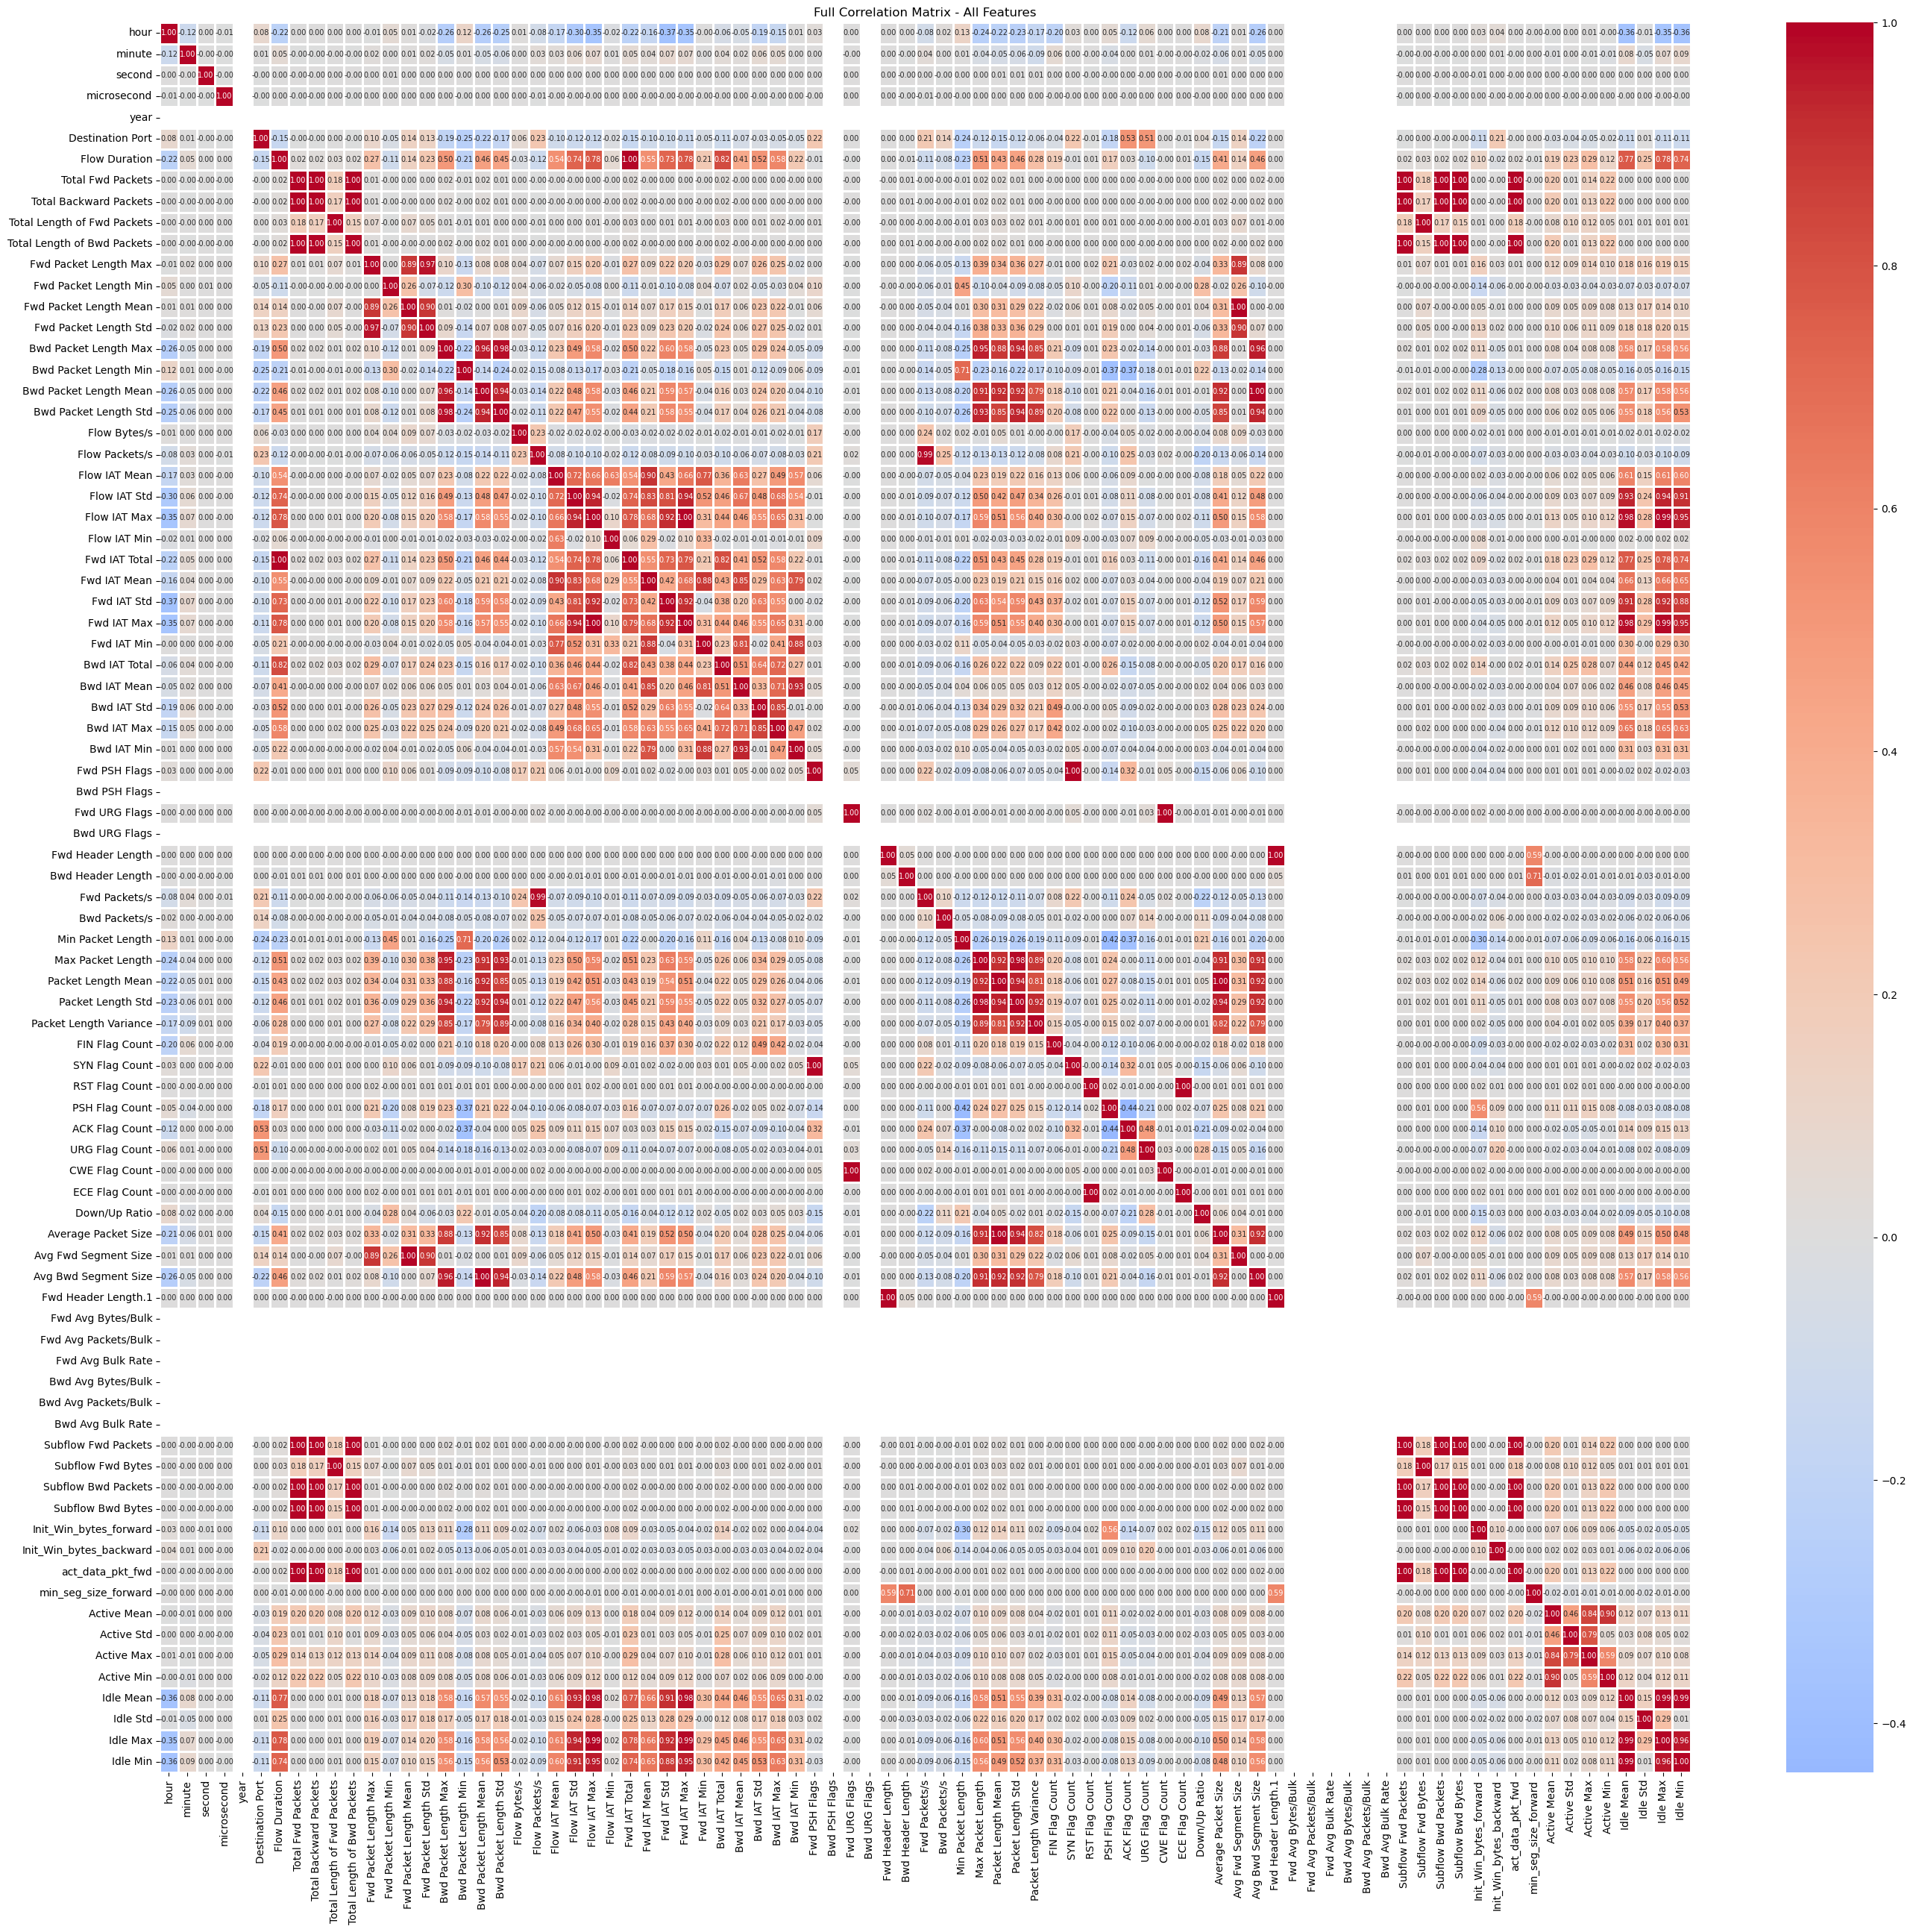

In [44]:
corr = df.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(28, 26))  
sns.heatmap(
    corr,
    cmap='coolwarm',
    linewidths=0.8,
    center=0,
    annot=True,
    fmt=".2f",
    annot_kws={"size":7}  # adjust font size 
)
plt.title('Full Correlation Matrix - All Features')
plt.tight_layout()
plt.savefig('../visualization/Full Correlation Matrix.pdf', format='pdf')
plt.show()


# Distribution of Traffic

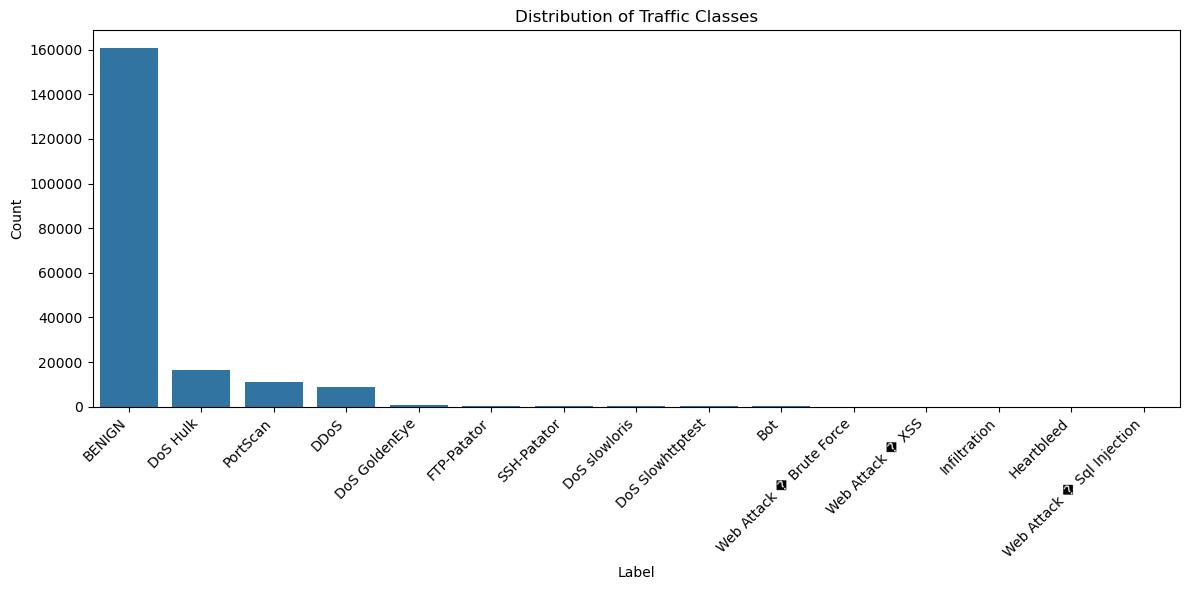

In [45]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Label', data=df, order=df['Label'].value_counts().index)
plt.title('Distribution of Traffic Classes')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('../visualization/Distribution of Traffic.png', format='png')
plt.show()

The graph shows a highly imbalanced distribution of traffic classes, with the majority of instances classified as "BENIGN," followed by a much smaller number of instances for various attack types.

# Destination Port analysis

In [46]:
df['Destination Port'].value_counts().head(20)

Destination Port
53       67832
80       43779
443      35576
123       1653
22        1176
21         952
137        537
389        457
88         400
465        284
139        207
8080       190
3268       169
445        136
0          126
138        123
135        114
49666       63
5353        56
1           31
Name: count, dtype: int64

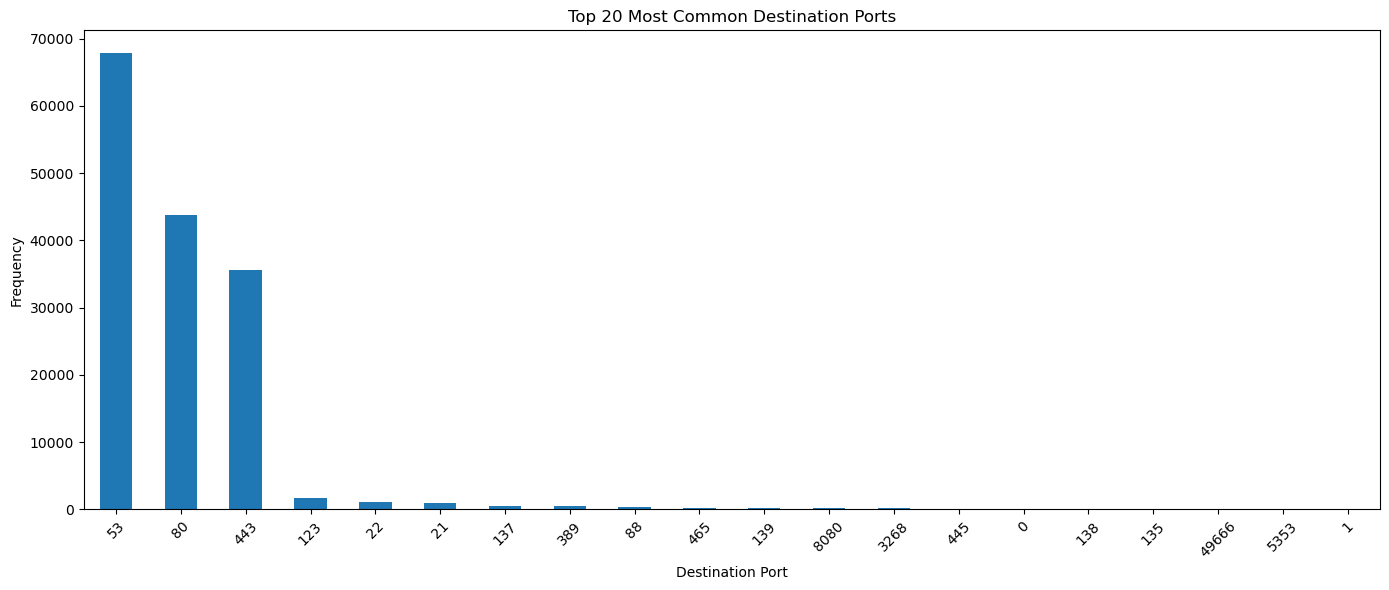

In [47]:
# Top 20 most common ports visualization
plt.figure(figsize=(14, 6))
df['Destination Port'].value_counts().head(20).plot(kind='bar')
plt.title('Top 20 Most Common Destination Ports')
plt.xlabel('Destination Port')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../visualization/Top 20 Most Common Destination Ports.png', format='png')
plt.show()

In [48]:
# Common service ports analysis
common_ports = {
    53: 'DNS',
    80: 'HTTP',
    443: 'HTTPS',
    123: 'NTP',
    22: 'SSH',
    21: 'FTP',
    137: 'NetBIOS Name Service',
    389: 'LDAP',
    88: 'Kerberos',
    465: 'SMTPS',
    139: 'NetBIOS Session Service',
    8080: 'HTTP (Alternate)',
    3268: 'LDAP Global Catalog',
    445: 'Microsoft-DS',
    0: 'Reserved',
    138: 'NetBIOS Datagram Service',
    135: 'MS RPC',
    49666: 'Dynamic/Private Port',
    5353: 'mDNS',
    1: 'TCP Port Service Multiplexer',
    110: 'POP3'
}

service_counts = {}
for port, service in common_ports.items():
    count = len(df[df['Destination Port'] == port])
    if count > 0:
        service_counts[service] = count

service_df = pd.DataFrame(list(service_counts.items()), columns=['Service', 'Count'])
service_df.sort_values('Count', ascending=False)

Service  Count
0                            DNS  67832
1                           HTTP  43779
2                          HTTPS  35576
3                            NTP   1653
4                            SSH   1176
5                            FTP    952
6           NetBIOS Name Service    537
7                           LDAP    457
8                       Kerberos    400
9                          SMTPS    284
10       NetBIOS Session Service    207
11              HTTP (Alternate)    190
12           LDAP Global Catalog    169
13                  Microsoft-DS    136
14                      Reserved    126
15      NetBIOS Datagram Service    123
16                        MS RPC    114
17          Dynamic/Private Port     63
18                          mDNS     56
19  TCP Port Service Multiplexer     31
20                          POP3     25

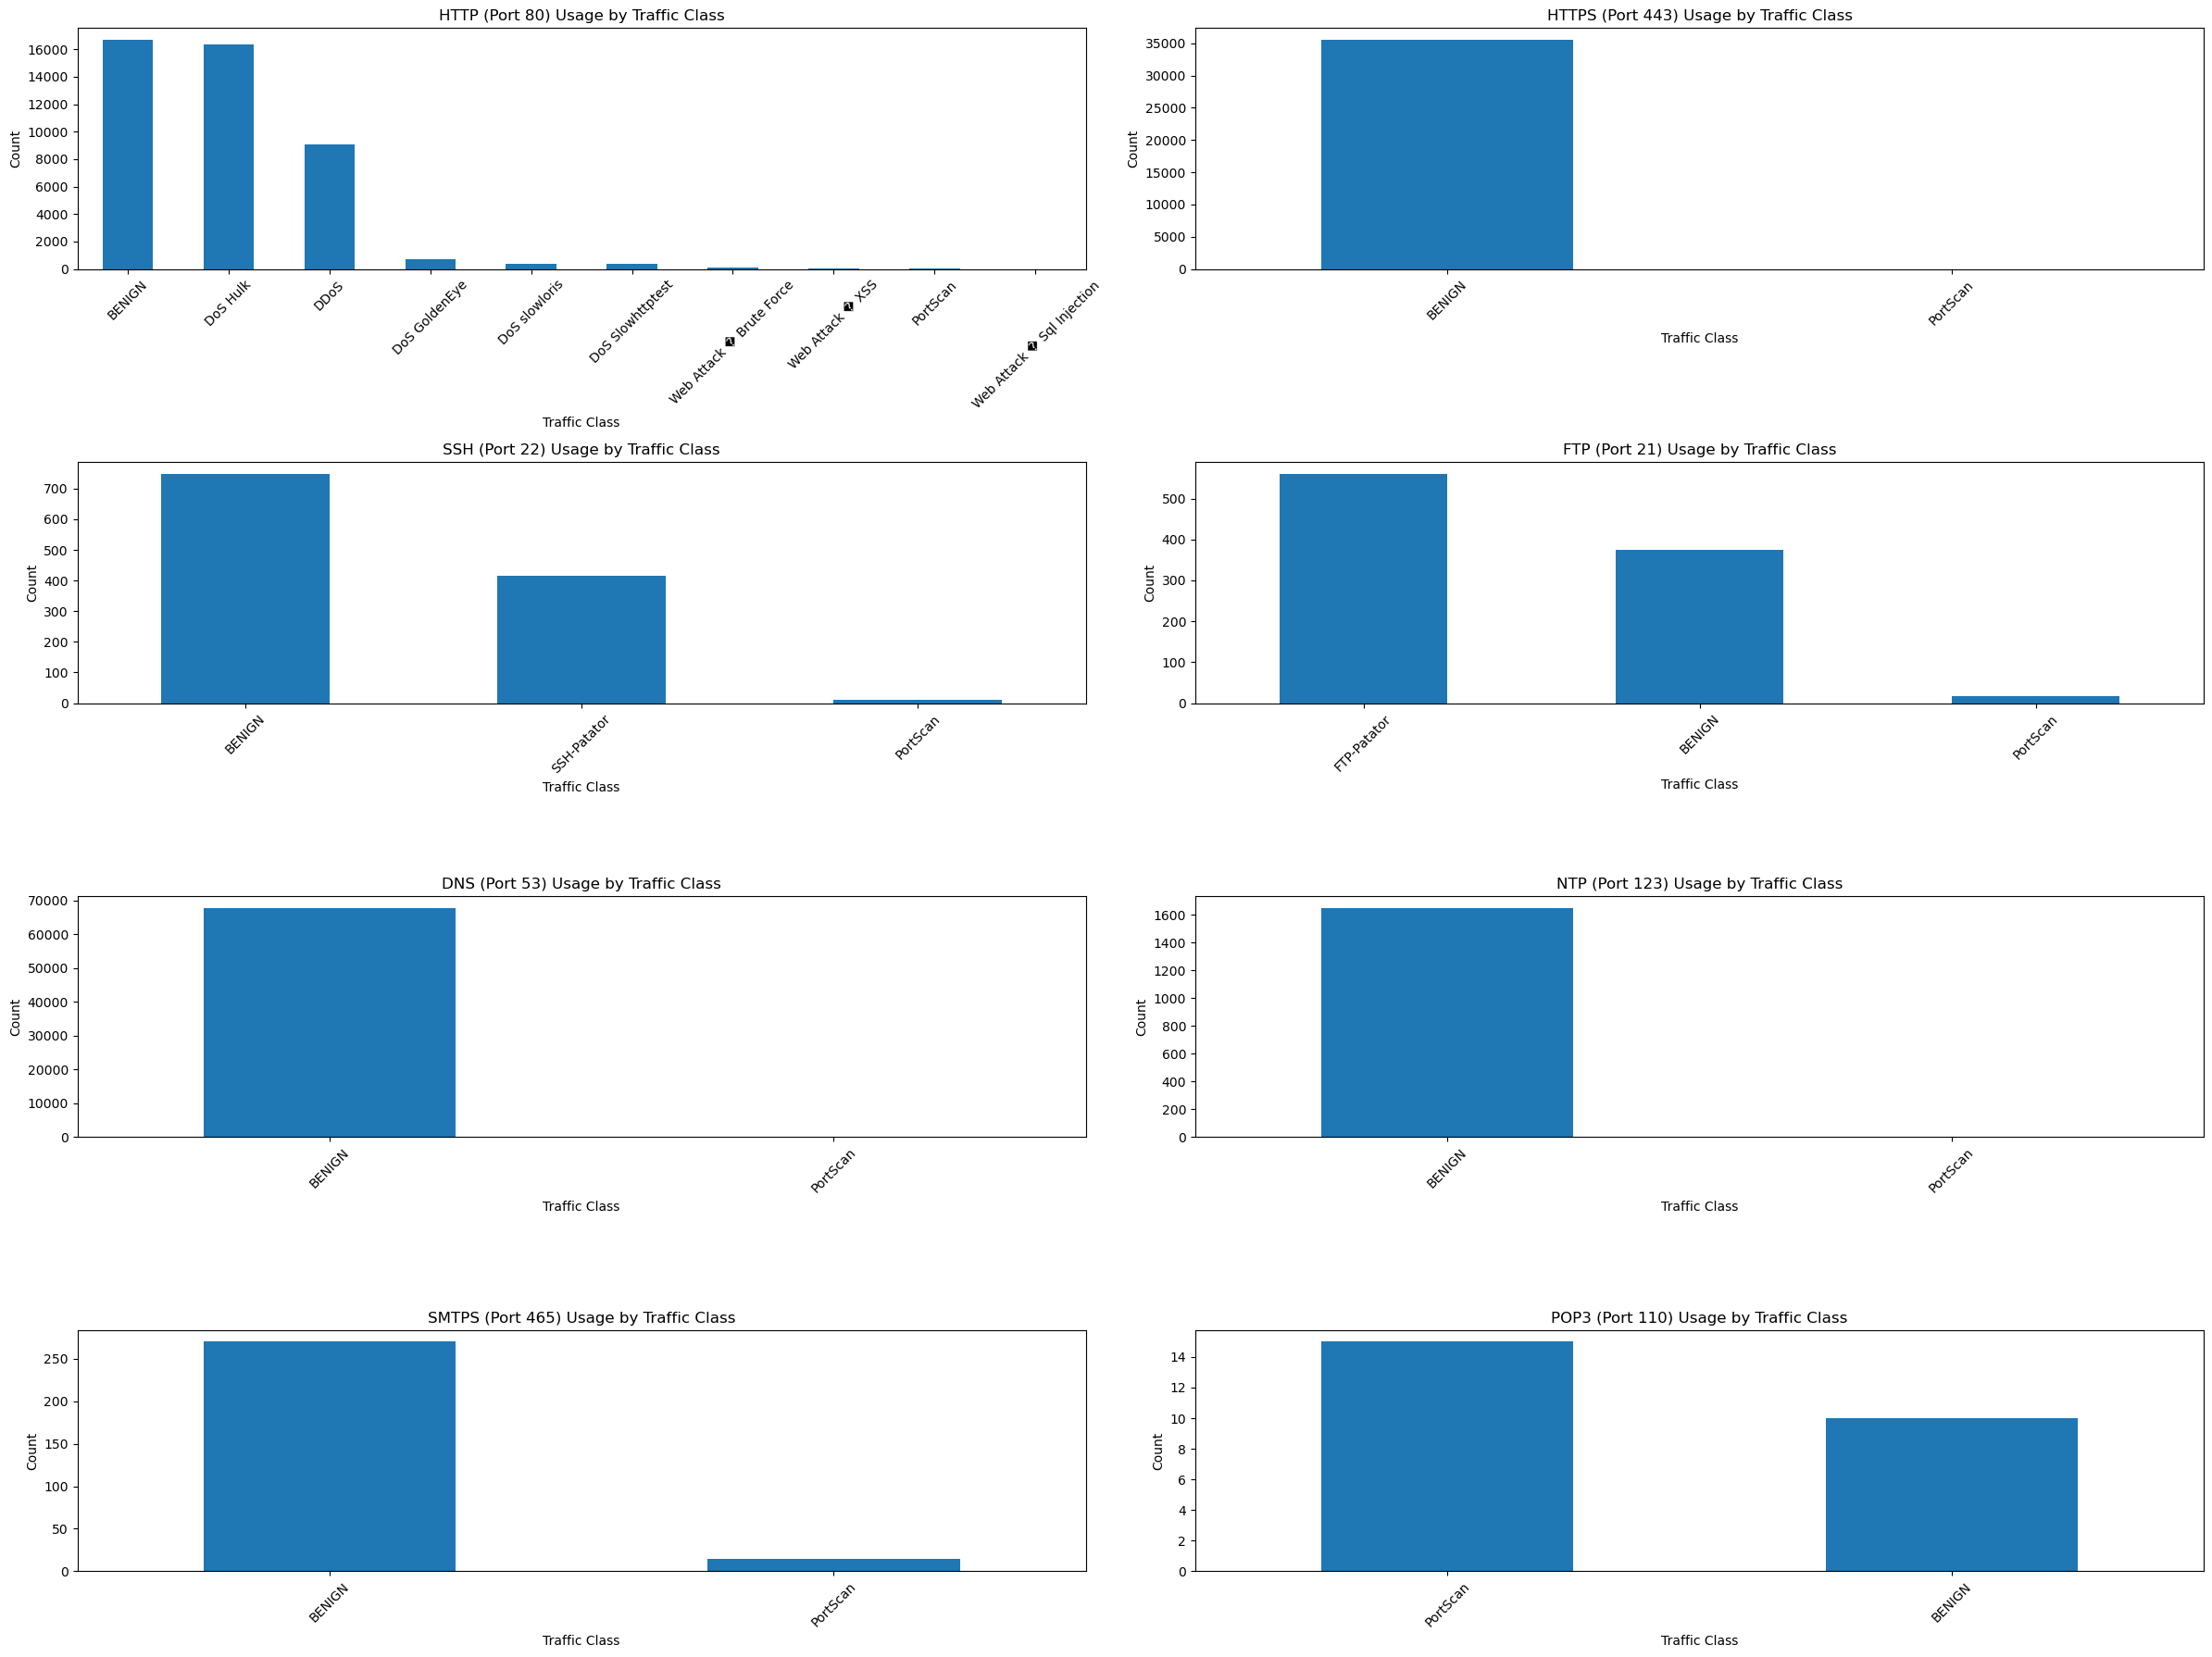

In [49]:
fig, axes = plt.subplots(4, 2, figsize=(24, 18)) 

services_to_check = ['HTTP', 'HTTPS', 'SSH', 'FTP', 'DNS', 'NTP', 'SMTPS','POP3']
for idx, service in enumerate(services_to_check):
    port = [k for k, v in common_ports.items() if v == service][0]
    service_data = df[df['Destination Port'] == port]['Label'].value_counts()
    if len(service_data) > 0:
        ax = axes[idx // 2, idx % 2]
        service_data.plot(kind='bar', ax=ax)
        ax.set_title(f'{service} (Port {port}) Usage by Traffic Class')
        ax.set_xlabel('Traffic Class')
        ax.set_ylabel('Count')
        ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.savefig('../visualization/port usage by traffic.png', format='png')
plt.show()


The graphs highlight a clear dominance of benign traffic over attack traffic across various ports. This suggests that the dataset is likely focused on normal network operations, with only occasional attack attempts, as seen in ports like HTTP, HTTPS, and DNS. The few attack instances on certain ports (such as FTP or SMTP) could be due to specific targeted attack types, like brute force or port scanning. This distribution might indicate that the dataset is designed to simulate real-world traffic scenarios where benign traffic is far more prevalent than malicious activity, which is important for training models to distinguish between normal behavior and potential security threats.

# Flags analysis

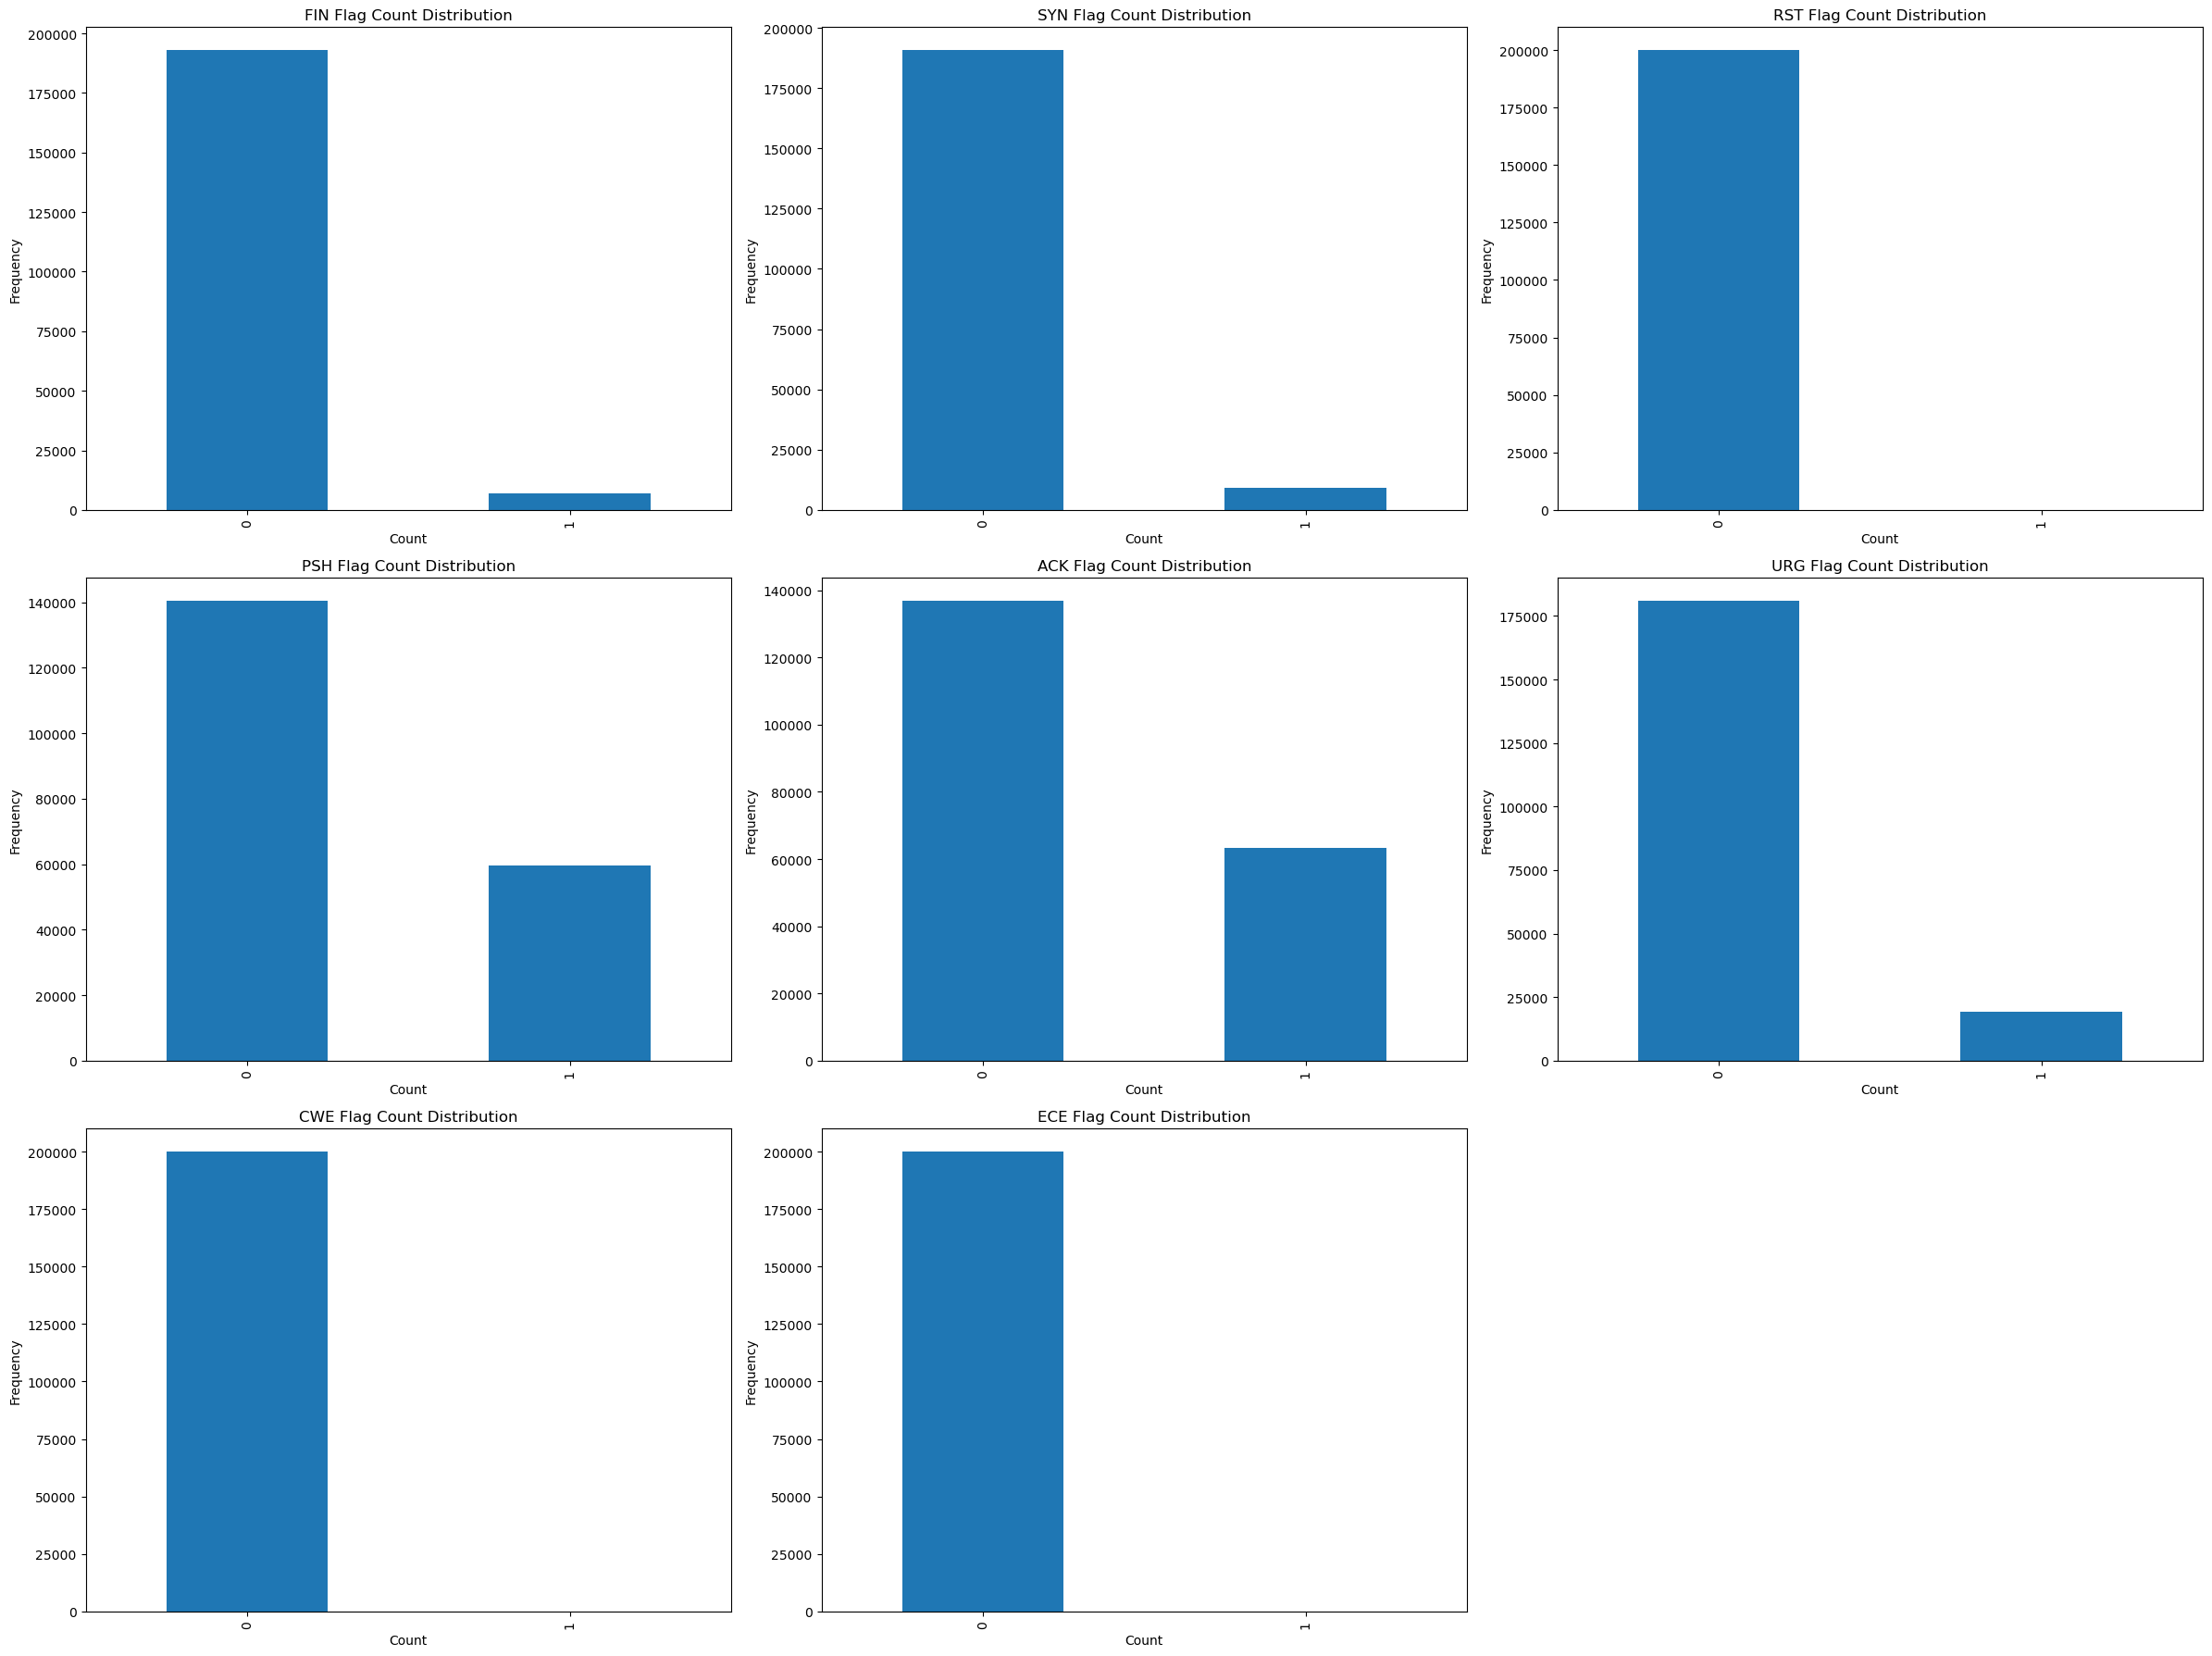

In [50]:
# Flag distribution visualization
flag_columns = ['FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 
                'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count']

# Create a 3x3 grid to accommodate all 8 flags
fig, axes = plt.subplots(3, 3, figsize=(24, 18)) 

# Flatten the axes array for easier iteration
axes = axes.flatten()

for idx, flag in enumerate(flag_columns):
    ax = axes[idx]  
    df[flag].value_counts().head(10).plot(kind='bar', ax=ax)
    ax.set_title(f'{flag} Distribution')
    ax.set_xlabel('Count')
    ax.set_ylabel('Frequency')

# Hide any empty subplots
for idx in range(len(flag_columns), len(axes)):
    axes[idx].axis('off')  # Turning off the extra axes

plt.tight_layout()
plt.savefig('../visualization/flags distribution.png', format='png')
plt.show()

# Histograms for key packet features

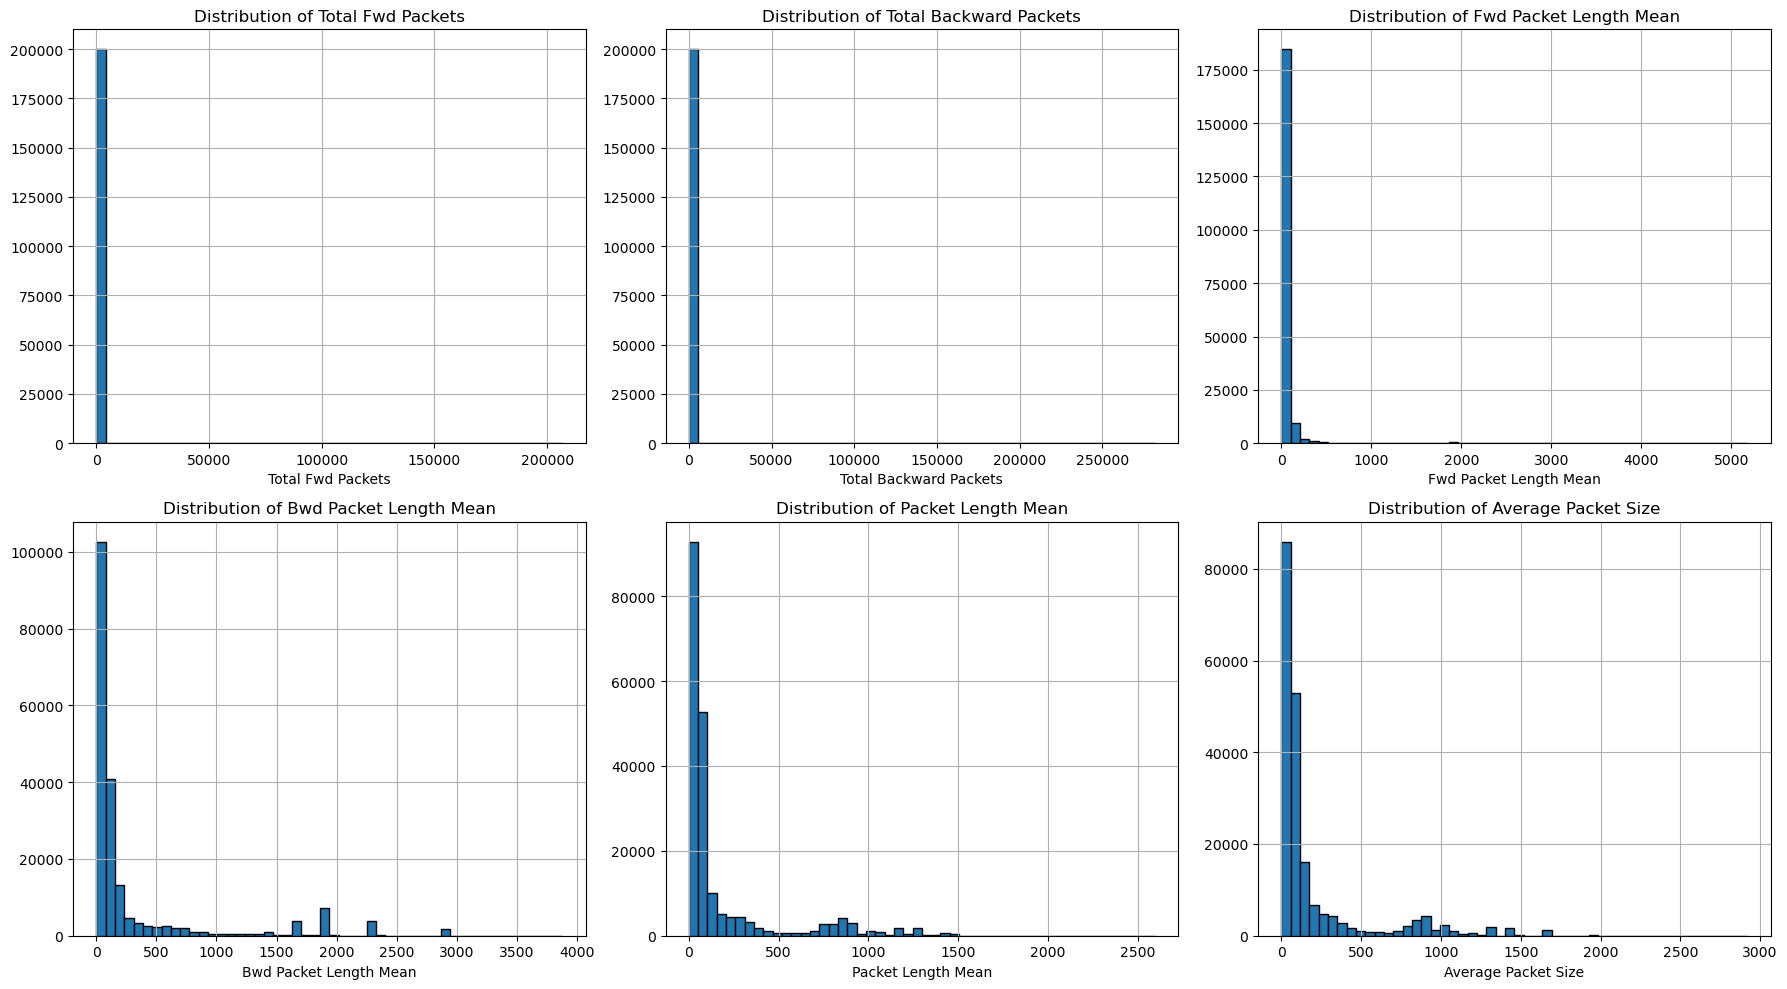

In [51]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
packet_features = ['Total Fwd Packets', 'Total Backward Packets', 
                   'Fwd Packet Length Mean', 'Bwd Packet Length Mean',
                   'Packet Length Mean', 'Average Packet Size']
for idx, col in enumerate(packet_features):
    ax = axes[idx // 3, idx % 3]
    df[col].hist(bins=50, ax=ax, edgecolor='black')
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
plt.tight_layout()
plt.show()

# Traffic Distribution by Time Period

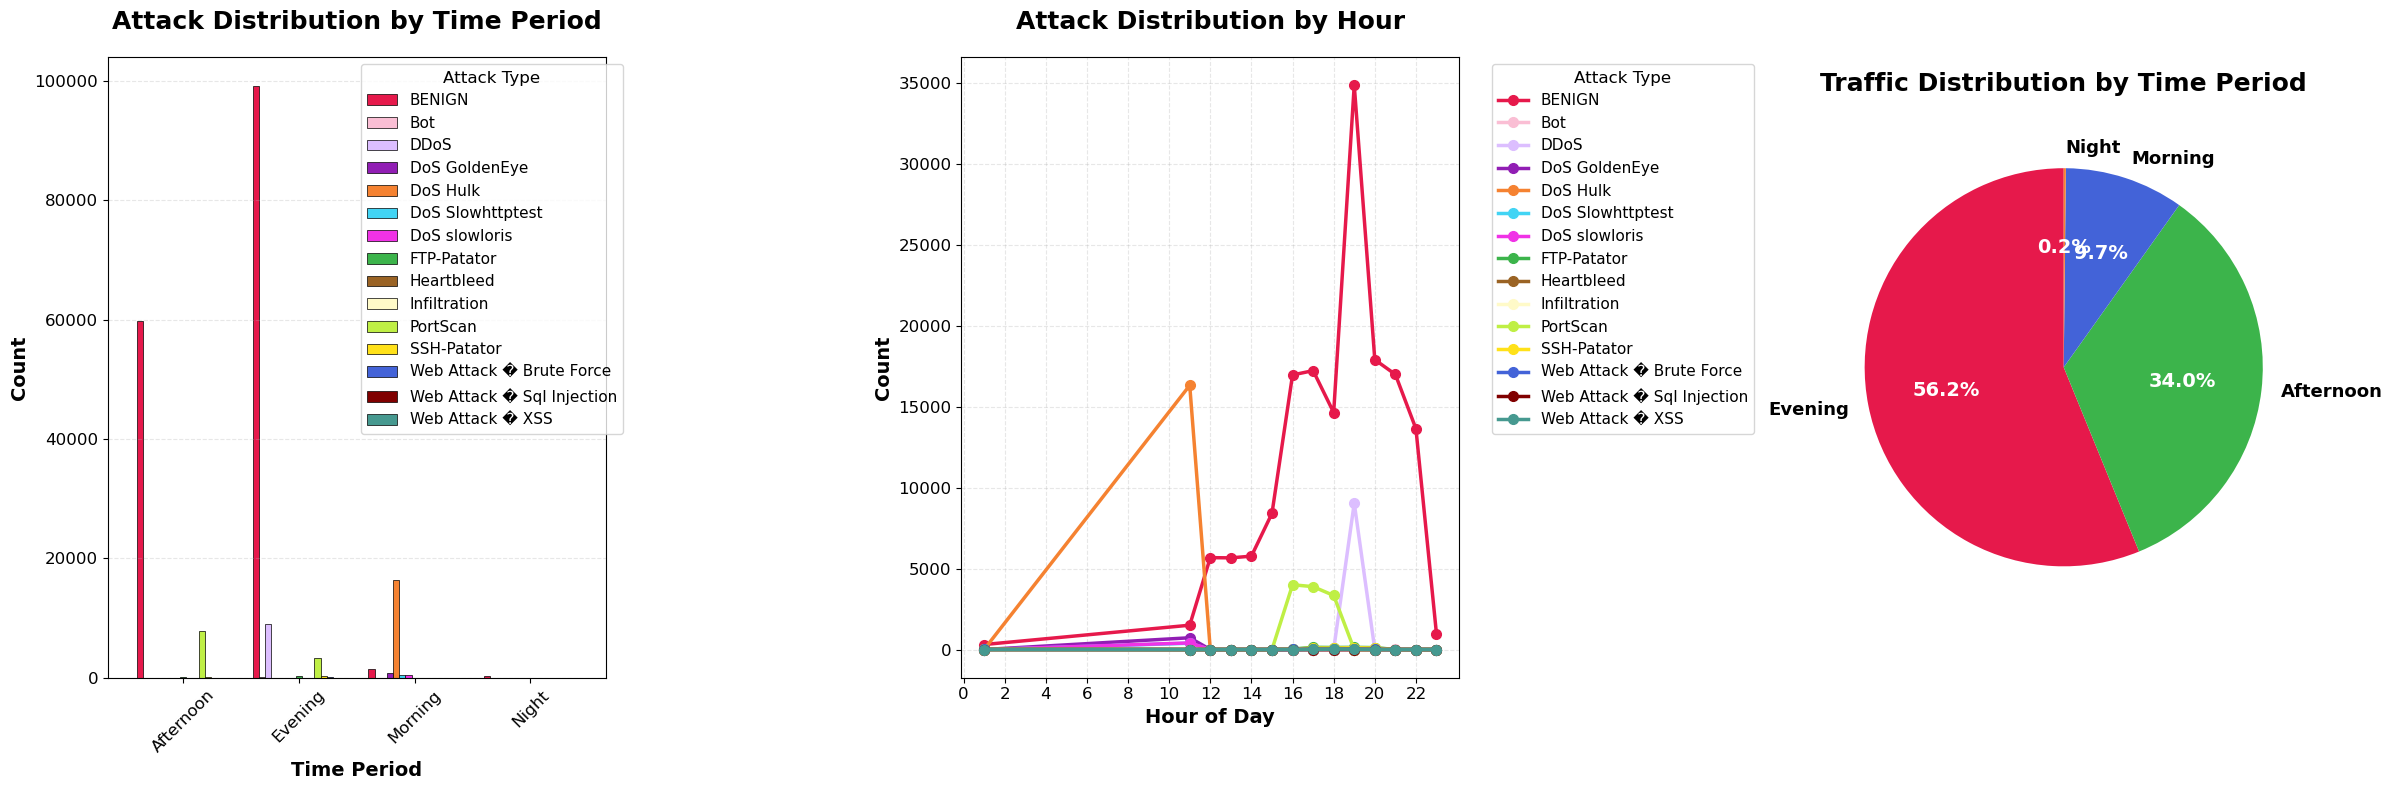

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. TIME PERIOD ANALYSIS 
def classify_time_period(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

# temporary series – not assigned into df
time_period_series = df['hour'].apply(classify_time_period)

# generate statistics
time_dist = time_period_series.value_counts()
attack_by_time = pd.crosstab(time_period_series, df['Label'], margins=True)
attack_pct = pd.crosstab(time_period_series, df['Label'], normalize='index') * 100


# 2. VISUALIZATION
unique_labels = df['Label'].unique()

distinct_colors = [
    '#e6194B','#3cb44b','#ffe119','#4363d8','#f58231',
    '#911eb4','#42d4f4','#f032e6','#bfef45','#fabed4',
    '#469990','#dcbeff','#9A6324','#fffac8','#800000',
    '#aaffc3','#808000','#ffd8b1','#000075','#a9a9a9',
]

color_map = dict(zip(unique_labels, distinct_colors[:len(unique_labels)]))

fig, axes = plt.subplots(1, 3, figsize=(24, 8))

# Plot 1: Attacks by time period
attack_by_time_no_total = attack_by_time.drop('All', axis=0).drop('All', axis=1)
attack_by_time_no_total.plot(kind='bar', ax=axes[0], stacked=False,
    color=[color_map[col] for col in attack_by_time_no_total.columns],
    width=0.8, edgecolor='black', linewidth=0.5)

axes[0].set_title('Attack Distribution by Time Period', fontsize=18, fontweight='bold', pad=20)
axes[0].set_xlabel('Time Period', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Count', fontsize=14, fontweight='bold')
axes[0].legend(title='Attack Type', bbox_to_anchor=(1.05, 1), fontsize=11, title_fontsize=12)
axes[0].tick_params(axis='x', rotation=45, labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)
axes[0].grid(axis='y', alpha=0.3, linestyle='--')

# Plot 2: Hourly distribution
hourly_attacks = df.groupby(['hour', 'Label']).size().unstack(fill_value=0)
for col in hourly_attacks.columns:
    axes[1].plot(hourly_attacks.index, hourly_attacks[col], marker='o',
                label=col, color=color_map[col], linewidth=2.5, markersize=7)

axes[1].set_title('Attack Distribution by Hour', fontsize=18, fontweight='bold', pad=20)
axes[1].set_xlabel('Hour of Day', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Count', fontsize=14, fontweight='bold')
axes[1].legend(title='Attack Type', bbox_to_anchor=(1.05, 1), fontsize=11, title_fontsize=12)
axes[1].grid(True, alpha=0.3, linestyle='--')
axes[1].tick_params(labelsize=12)
axes[1].set_xticks(range(0, 24, 2))

# Plot 3: Time period pie chart
wedges, texts, autotexts = axes[2].pie(time_dist, labels=time_dist.index, autopct='%1.1f%%',
                                        colors=['#e6194B', '#3cb44b', '#4363d8', '#f58231'],
                                        textprops={'fontsize': 13, 'fontweight': 'bold'},
                                        startangle=90)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(14)

axes[2].set_title('Traffic Distribution by Time Period', fontsize=18, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('../visualization/attack_time_analysis.png', dpi=300, bbox_inches='tight')
plt.show()


The high concentration of attacks in the afternoon and evening periods suggests targeted activity during times of high traffic. This pattern can help inform security measures by identifying the time windows most vulnerable to malicious attempts. The dataset's traffic is predominantly benign, but the attack traffic patterns offer valuable insights for improving detection models, particularly during specific times of day.

# attack frequency over time

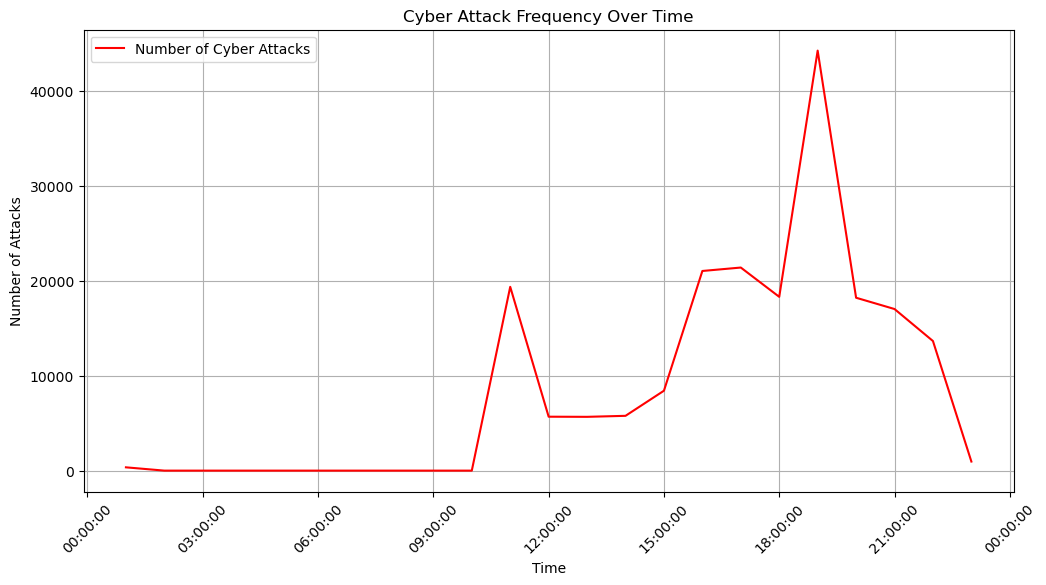

In [55]:
# Create a copy of the DataFrame
attack_series = df.copy()

# Combine 'hour', 'minute', 'second' into a single 'Time' column
attack_series['Time'] = pd.to_datetime(attack_series[['hour', 'minute', 'second']].astype(str).agg(':'.join, axis=1), format='%H:%M:%S')

# Set 'Time' column as the index for resampling
attack_series.set_index('Time', inplace=True)

# Resample the data to hourly frequency and count attacks per hour
attack_counts = attack_series.resample('H').size()  # 'H' for hourly count of attacks

# Plot the time series of cyberattacks
pyplot.figure(figsize=(12, 6)) 
pyplot.plot(attack_counts.index, attack_counts, label="Number of Cyber Attacks", color="red")

# Labeling the axes
pyplot.xlabel("Time")
pyplot.ylabel("Number of Attacks")
pyplot.title("Cyber Attack Frequency Over Time")
pyplot.legend()

# Format the x-axis to show hours, minutes, and seconds
pyplot.gca().xaxis.set_major_formatter(DateFormatter('%H:%M:%S'))

# Rotate the x-axis labels for better readability
pyplot.xticks(rotation=45)

# Add gridlines for better visibility and saving the plot
pyplot.grid(True)
pyplot.savefig('../visualization/cyber attack frequency over time.png', dpi=300, bbox_inches='tight')
# Show the plot
pyplot.show()


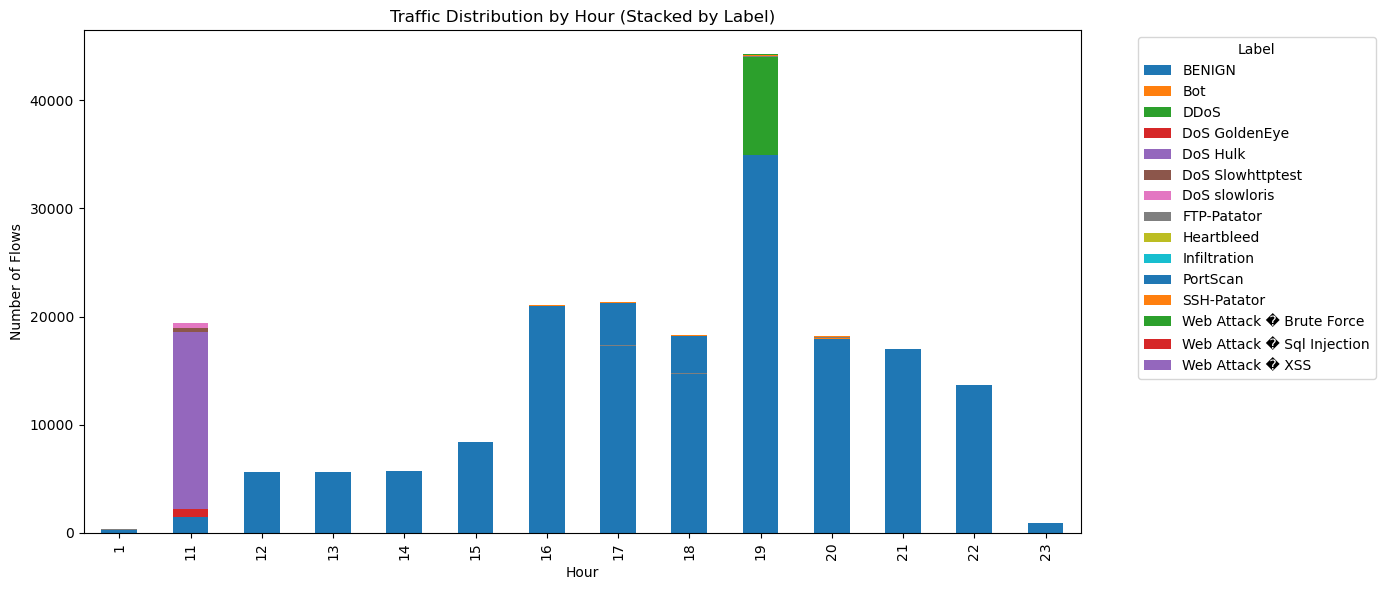

In [56]:
# Traffic by hour and label
hour_label_counts = df.groupby(['hour', 'Label']).size().unstack(fill_value=0)
hour_label_counts.plot(kind='bar', stacked=True, figsize=(14, 6))
plt.title('Traffic Distribution by Hour (Stacked by Label)')
plt.xlabel('Hour')
plt.ylabel('Number of Flows')
plt.legend(title='Label', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.savefig('../visualization/traffic distribution by hour.png', format='png')
plt.show()

The graph shows a significant peak in traffic at 11, with a high volume of DoS Hulk and DoS GoldenEye attacks. The traffic is generally low during other hours, with some spikes due to Bot and Web Attack activities, especially in 19. Interpolation suggests that attack activities predominantly occur during specific hours, with noticeable patterns of intrusion, such as DDoS and bot-related activities. The majority of traffic, however, seems benign.

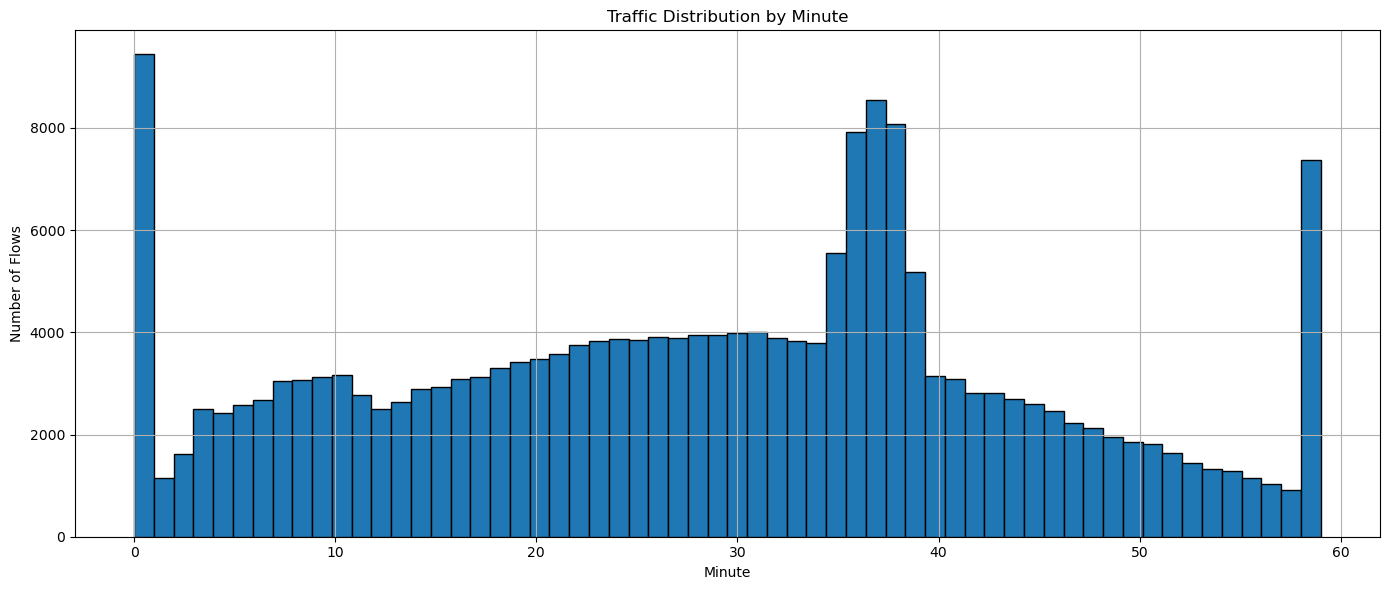

In [57]:
# Time patterns - Minute distribution
plt.figure(figsize=(14, 6))
df['minute'].hist(bins=60, edgecolor='black')
plt.title('Traffic Distribution by Minute')
plt.xlabel('Minute')
plt.ylabel('Number of Flows')
plt.tight_layout()
plt.show()

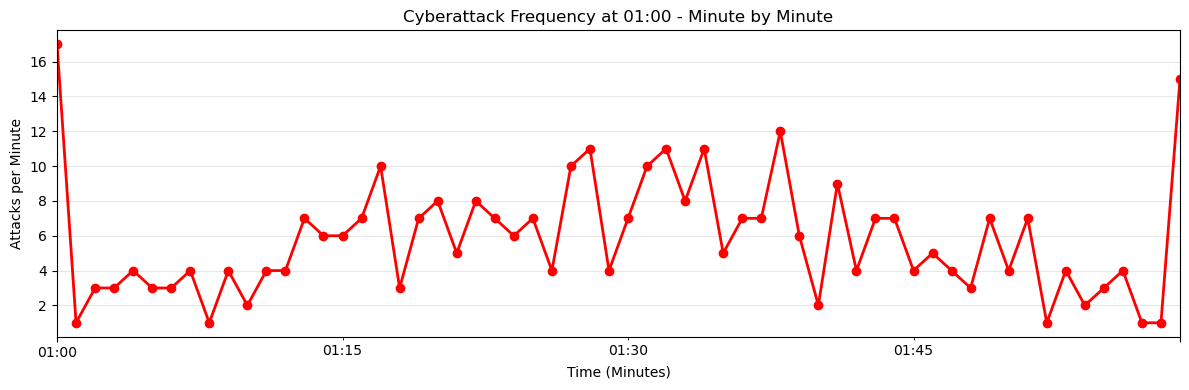

Hour 01:00:
  Total attacks: 347
  Peak minute: 17 attacks at minute 0
--------------------------------------------------


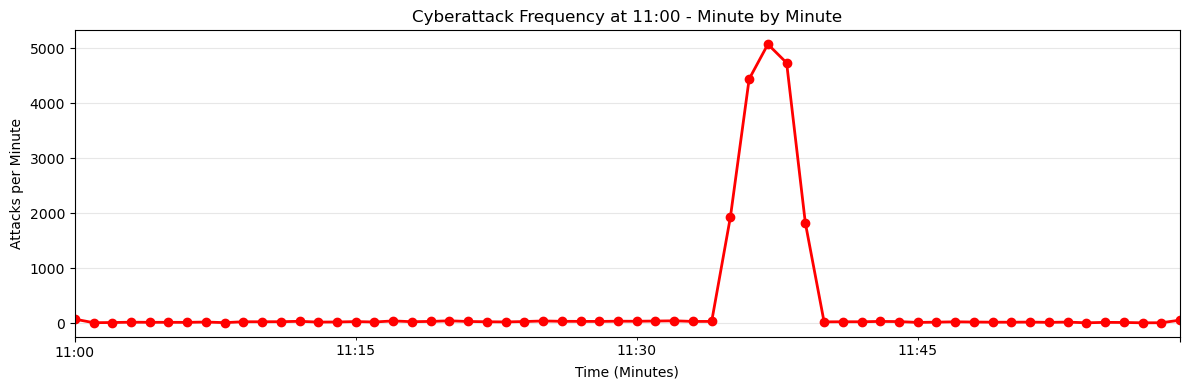

Hour 11:00:
  Total attacks: 19355
  Peak minute: 5070 attacks at minute 37
--------------------------------------------------


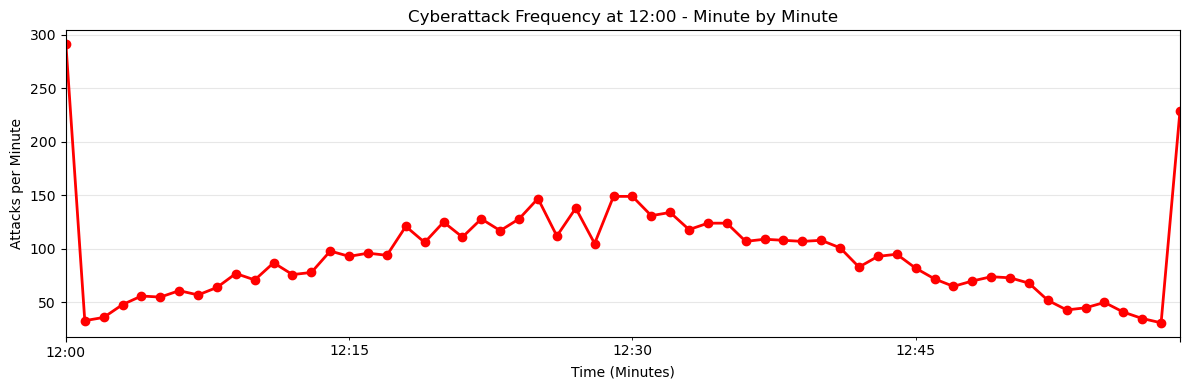

Hour 12:00:
  Total attacks: 5679
  Peak minute: 291 attacks at minute 0
--------------------------------------------------


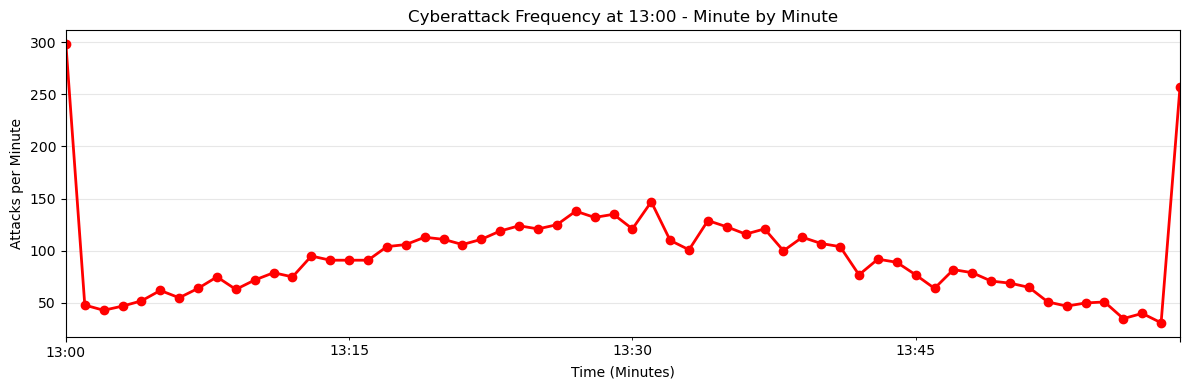

Hour 13:00:
  Total attacks: 5665
  Peak minute: 298 attacks at minute 0
--------------------------------------------------


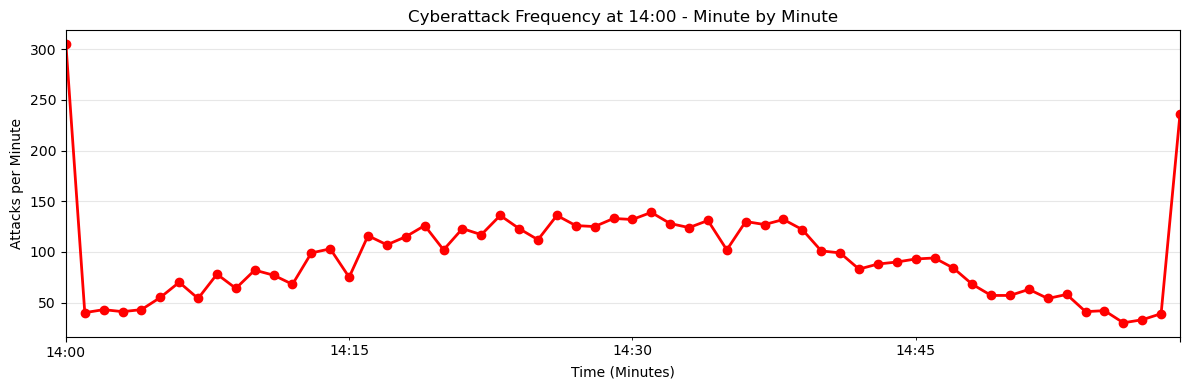

Hour 14:00:
  Total attacks: 5771
  Peak minute: 305 attacks at minute 0
--------------------------------------------------


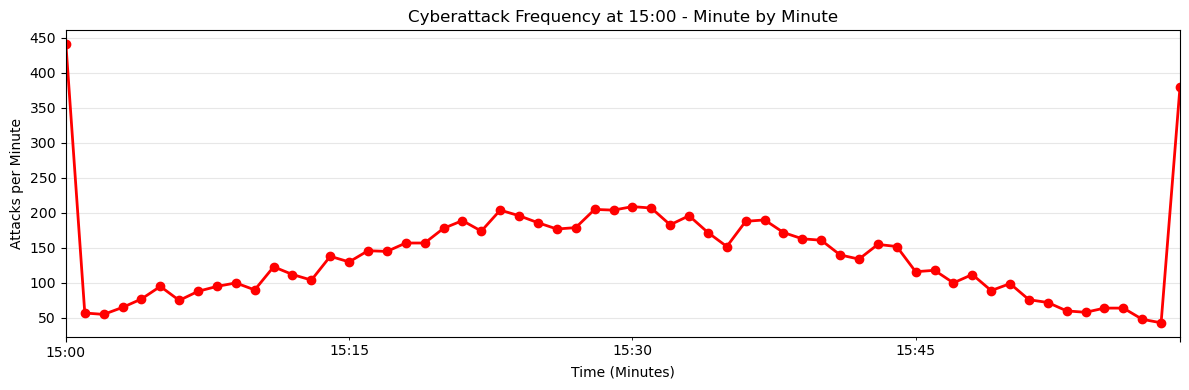

Hour 15:00:
  Total attacks: 8415
  Peak minute: 441 attacks at minute 0
--------------------------------------------------


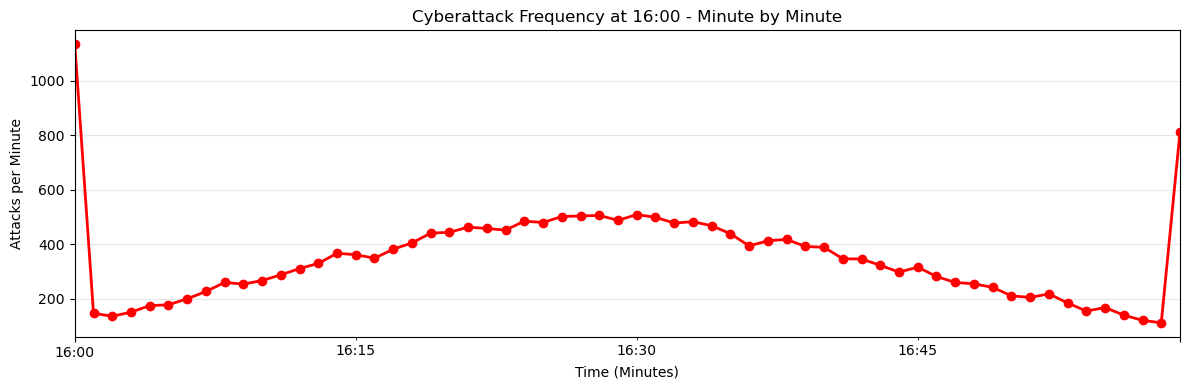

Hour 16:00:
  Total attacks: 21025
  Peak minute: 1134 attacks at minute 0
--------------------------------------------------


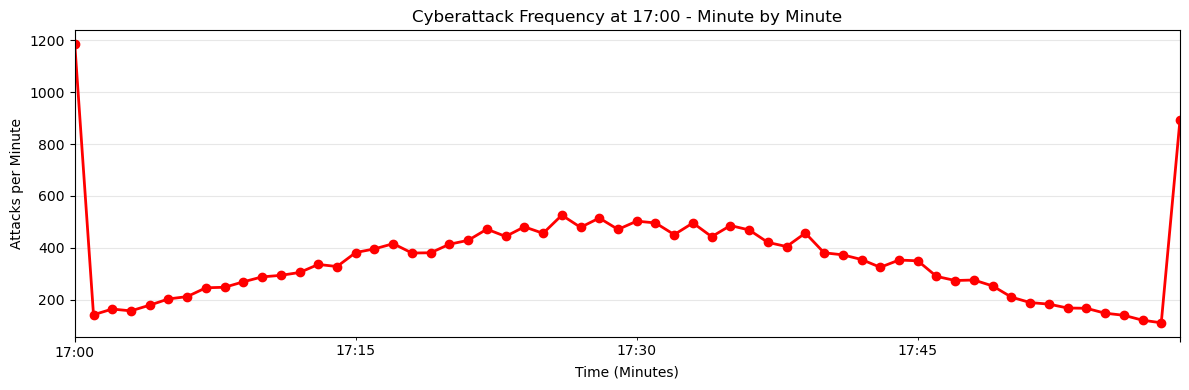

Hour 17:00:
  Total attacks: 21386
  Peak minute: 1185 attacks at minute 0
--------------------------------------------------


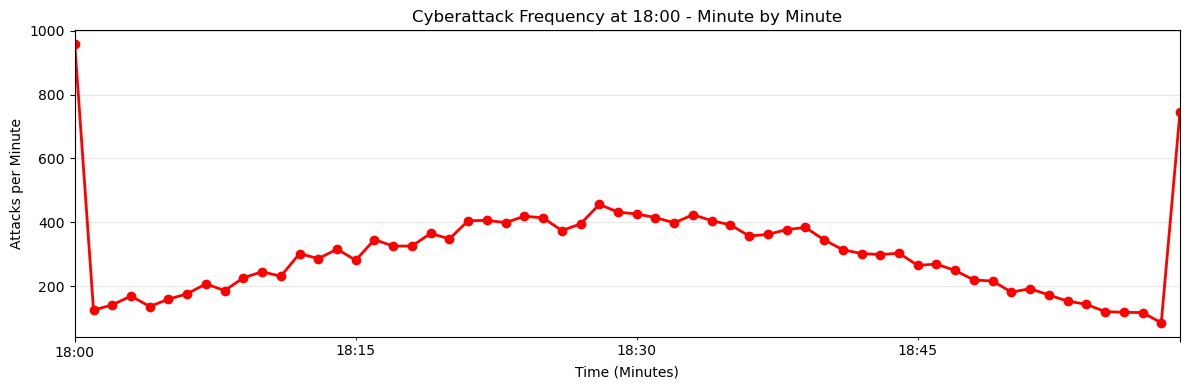

Hour 18:00:
  Total attacks: 18302
  Peak minute: 958 attacks at minute 0
--------------------------------------------------


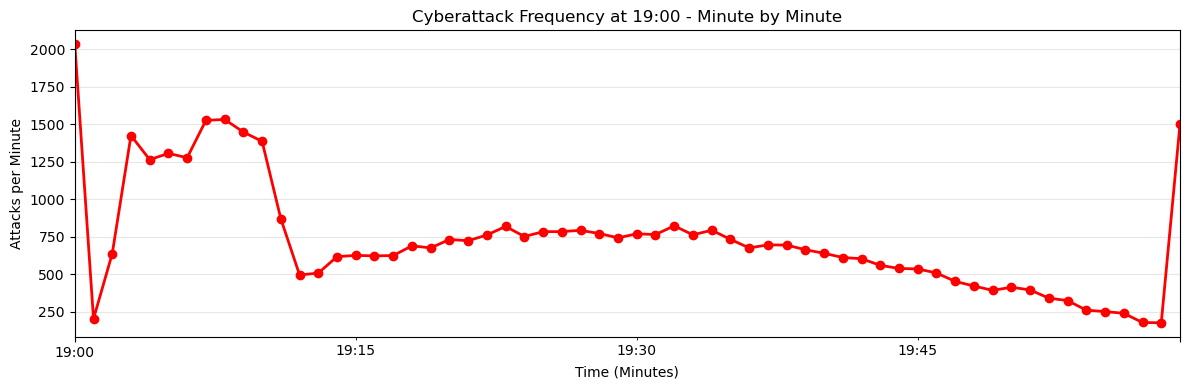

Hour 19:00:
  Total attacks: 44229
  Peak minute: 2034 attacks at minute 0
--------------------------------------------------


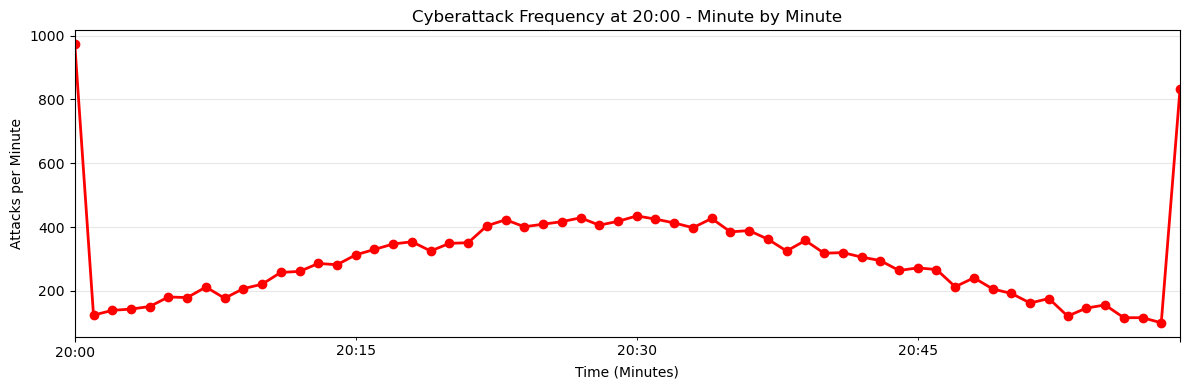

Hour 20:00:
  Total attacks: 18206
  Peak minute: 973 attacks at minute 0
--------------------------------------------------


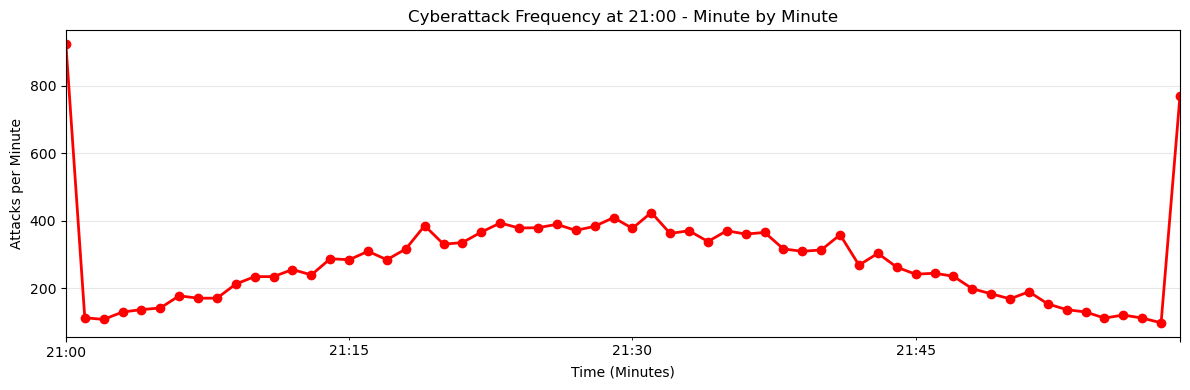

Hour 21:00:
  Total attacks: 17018
  Peak minute: 923 attacks at minute 0
--------------------------------------------------


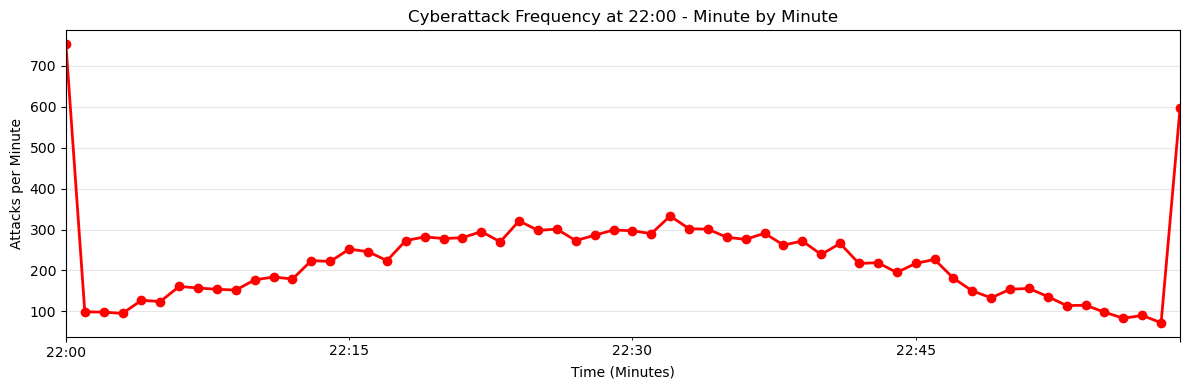

Hour 22:00:
  Total attacks: 13647
  Peak minute: 753 attacks at minute 0
--------------------------------------------------


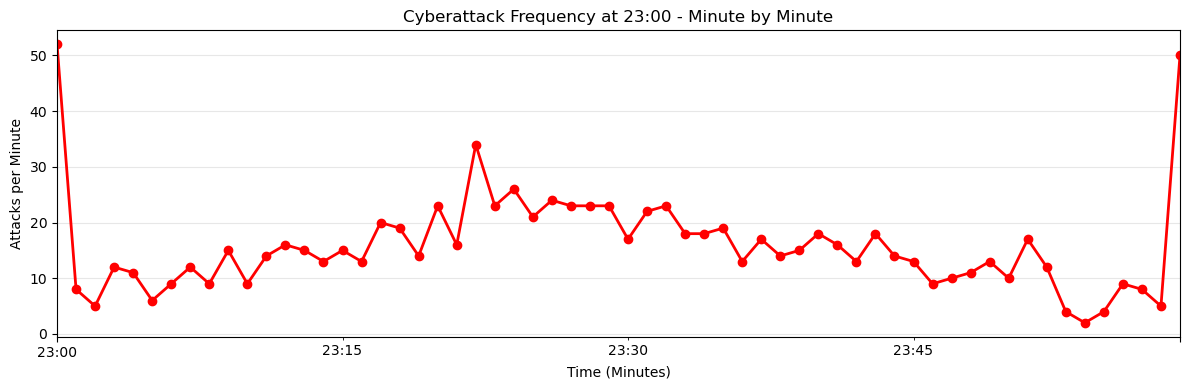

Hour 23:00:
  Total attacks: 955
  Peak minute: 52 attacks at minute 0
--------------------------------------------------


In [58]:
AS = attack_series.copy()

# Convert the index to proper datetime
from datetime import datetime
today = datetime.now().date()
AS.index = pd.to_datetime(today.strftime('%Y-%m-%d') + ' ' + AS.index.astype(str))

# Group by hour
for name, group in AS.groupby(Grouper(freq='H')):
    if not group.empty:
        # Create a new figure for each hour
        plt.figure(figsize=(12, 4))
        
        # Resample to minute frequency
        minute_data = group.resample('T').size()
        
        # Plot
        minute_data.plot(color='red', marker='o', linewidth=2)
        
        # Customize
        hour_label = name.strftime('%H:00')
        plt.title(f"Cyberattack Frequency at {hour_label} - Minute by Minute")
        plt.xlabel("Time (Minutes)")
        plt.ylabel("Attacks per Minute")
        plt.grid(True, alpha=0.3)
        
        # Show the plot
        plt.tight_layout()
        plt.show()
        
        # Print some stats
        print(f"Hour {hour_label}:")
        print(f"  Total attacks: {len(group)}")
        print(f"  Peak minute: {minute_data.max()} attacks at minute {minute_data.idxmax().minute}")
        print("-" * 50)

# Top Destination Ports Distribution by Hour

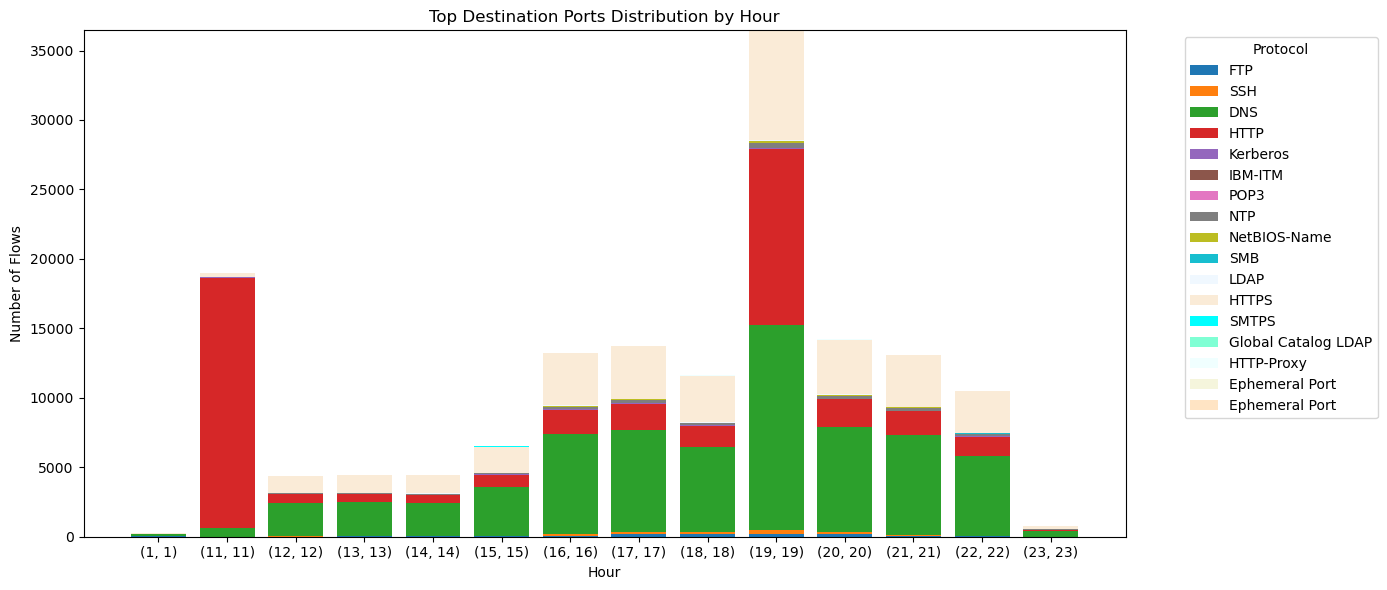

In [59]:
port_protocol_map = {
    21: "FTP",
    22: "SSH",
    53: "DNS",
    80: "HTTP",
    88: "Kerberos",
    100: "IBM-ITM",
    110: "POP3",
    123: "NTP",
    137: "NetBIOS-Name",
    139: "SMB",
    389: "LDAP",
    443: "HTTPS",
    465: "SMTPS",
    8080: "HTTP-Proxy",
    3268: "Global Catalog LDAP",
    49599: "Ephemeral Port",
    52141: "Ephemeral Port",
}

hour_label_counts = df.groupby(['hour', 'Destination Port']).size()
top_20_protocols_per_hour = hour_label_counts.groupby('hour').nlargest(10).unstack(fill_value=0)

# Generate unique colors
color_list = list(mcolors.TABLEAU_COLORS.values()) + list(mcolors.CSS4_COLORS.values())
unique_ports = sorted(top_20_protocols_per_hour.columns)
port_color_map = {port: color_list[i % len(color_list)] for i, port in enumerate(unique_ports)}

fig, ax = plt.subplots(figsize=(14,6))

# Convert index to numeric x positions
x = np.arange(len(top_20_protocols_per_hour.index))

# Initialize bottom array for stacking bars
bottom = np.zeros(len(x))

for port in unique_ports:
    values = top_20_protocols_per_hour[port].values
    label = port_protocol_map.get(port, f"Port {port}")

    ax.bar(
        x,
        values,
        bottom=bottom,
        label=label,
        color=port_color_map[port],
    )
    bottom += values

# Set x-axis labels
ax.set_xticks(x)
ax.set_xticklabels(top_20_protocols_per_hour.index)

plt.title('Top Destination Ports Distribution by Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Flows')
plt.legend(title="Protocol", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


The graph shows the distribution of traffic by destination port across different hours. There is a notable spike in the traffic at hour 11, with HTTP traffic (red) dominating the flows. Other hours see more even distribution across protocols like FTP, DNS, and HTTPS, with a significant amount of traffic going to ephemeral ports (green). The pattern suggests that HTTP traffic is highly concentrated at specific hours, while the rest of the traffic remains more balanced throughout the day.

# TCP Flag Distribution by Hour

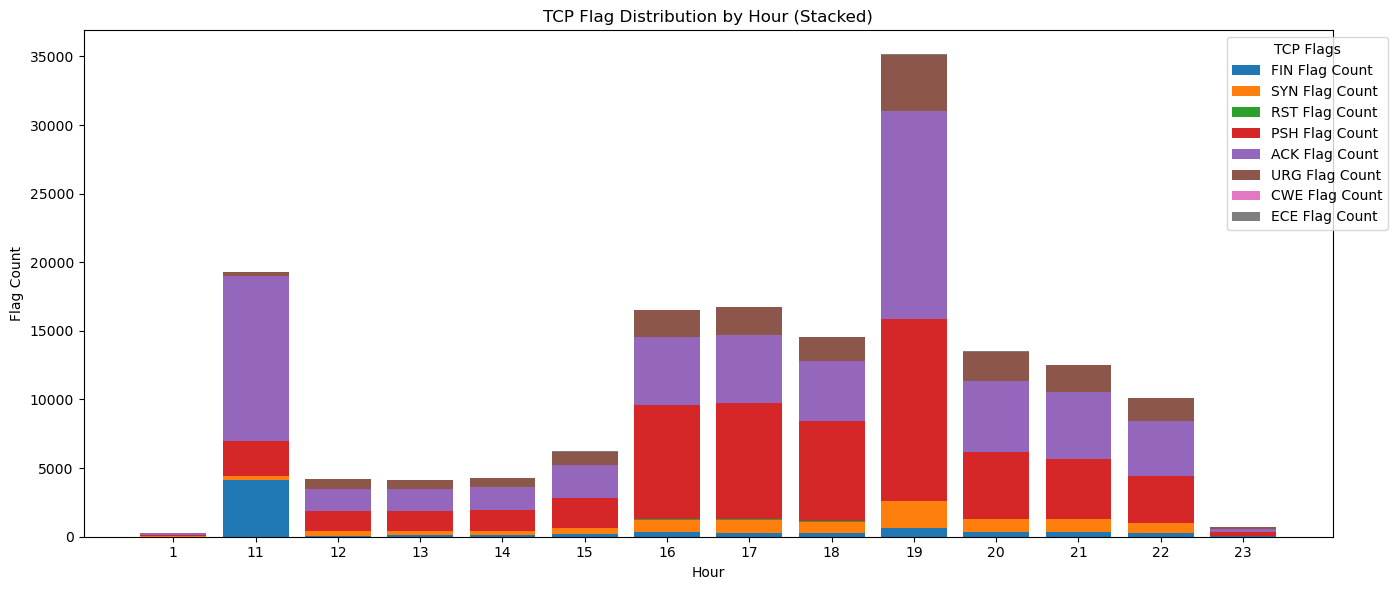

In [60]:
# The flag columns
flag_columns = [
    'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count',
    'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count'
]

# Group by hour, summing all flag occurrences
flag_counts_per_hour = df.groupby('hour')[flag_columns].sum()

# Create a stacked bar chart
fig, ax = plt.subplots(figsize=(14, 6))

# Numeric x positions
x = np.arange(len(flag_counts_per_hour.index))

# For stacking
bottom = np.zeros(len(x))

for flag in flag_columns:
    values = flag_counts_per_hour[flag].values
    ax.bar(
        x,
        values,
        bottom=bottom,
        label=flag
    )
    bottom += values

# Label hours on x-axis
ax.set_xticks(x)
ax.set_xticklabels(flag_counts_per_hour.index)

plt.title('TCP Flag Distribution by Hour (Stacked)')
plt.xlabel('Hour')
plt.ylabel('Flag Count')
plt.legend(title='TCP Flags', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


The graph depicts the distribution of TCP flag counts over the course of a day. There is a significant spike in TCP flag counts at hour 11, especially in the form of ACK (purple), RST (orange), and PSH (red) flags. This suggests a high volume of connection establishment and termination activity at that time. Hours 19 and 18 also show noticeable spikes in TCP flags, particularly ACK and PSH flags. The rest of the day sees lower activity, with small variations in flag counts, mostly involving ACK and SYN flags. This distribution indicates potential network activity or attacks at specific hours, notably around hour 11.

# Heatmap of Labels for Top 10 Protocols

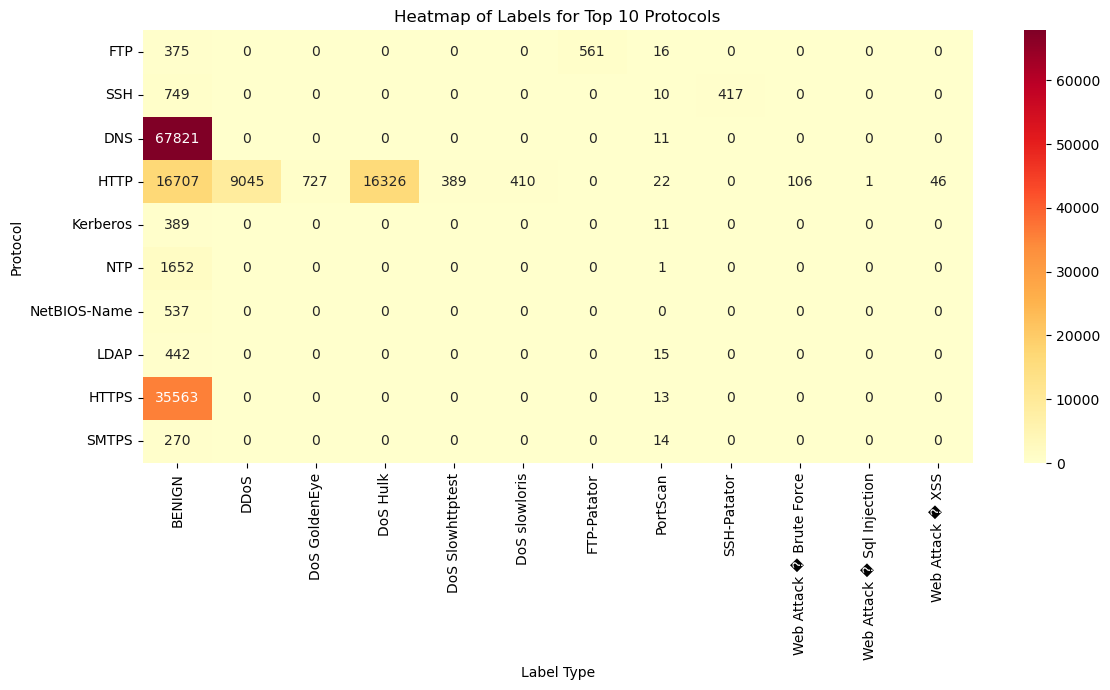

In [61]:
# 1) Find top 10 most used ports
top_ports = df['Destination Port'].value_counts().nlargest(10).index

# Filter dataframe for ONLY top ports
df_top = df[df['Destination Port'].isin(top_ports)]

# 2) Create label × port table
protocol_label_matrix = pd.crosstab(df_top['Destination Port'], df_top['Label'])

# 3) Map port - protocol name
port_protocol_map = {
    21: "FTP",
    22: "SSH",
    53: "DNS",
    80: "HTTP",
    88: "Kerberos",
    100: "IBM-ITM",
    110: "POP3",
    123: "NTP",
    137: "NetBIOS-Name",
    139: "SMB",
    389: "LDAP",
    443: "HTTPS",
    465: "SMTPS",
    8080: "HTTP-Proxy",
}

# row labels
protocol_label_matrix.index = protocol_label_matrix.index.map(
    lambda p: port_protocol_map.get(p, f"Port {p}")
)

# 4) Plot heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(protocol_label_matrix, annot=True, fmt="d", cmap='YlOrRd')
plt.title("Heatmap of Labels for Top 10 Protocols")
plt.xlabel("Label Type")
plt.ylabel("Protocol")
plt.tight_layout()
plt.show()

In the heatmap, we observe a notable concentration of HTTP traffic being targeted by specific attacks, particularly SQL Injection and XSS. SQL Injection (16,326 occurrences) is especially prominent in HTTP traffic, which aligns with real-world patterns where web applications remain highly susceptible to such attacks due to improper input sanitization. This suggests that attackers frequently target web applications, exploiting vulnerabilities in how user input is handled by databases. Similarly, XSS (410 occurrences) also targets HTTP, though at a lower rate, reflecting the ongoing threat of injecting malicious scripts into web pages, which is commonly used to steal session data or redirect users to malicious websites. The prevalence of DoS Hulk (16,326) and DDoS (9,045) in HTTP, DNS, and HTTPS traffic indicates that denial-of-service attacks are a common concern, as attackers often flood web servers with excessive traffic to disrupt service. Meanwhile, PortScan activity (11,229 occurrences) is also significant, showing that reconnaissance through port scanning is a frequent first step in attacks, with attackers attempting to find vulnerabilities across HTTP, HTTPS, and DNS services. The lower incidence of DoS Slowloris (410) and DoS Slowhttptest (389) in HTTP suggests that while these attacks are still attempted, modern defenses like WAFs and rate-limiting help mitigate them. Overall, the heatmap reflects real-world attack trends where web application vulnerabilities in HTTP are frequently targeted, DDoS and DoS attacks are common but managed with defenses, and port scanning remains a precursor to more targeted exploitation.

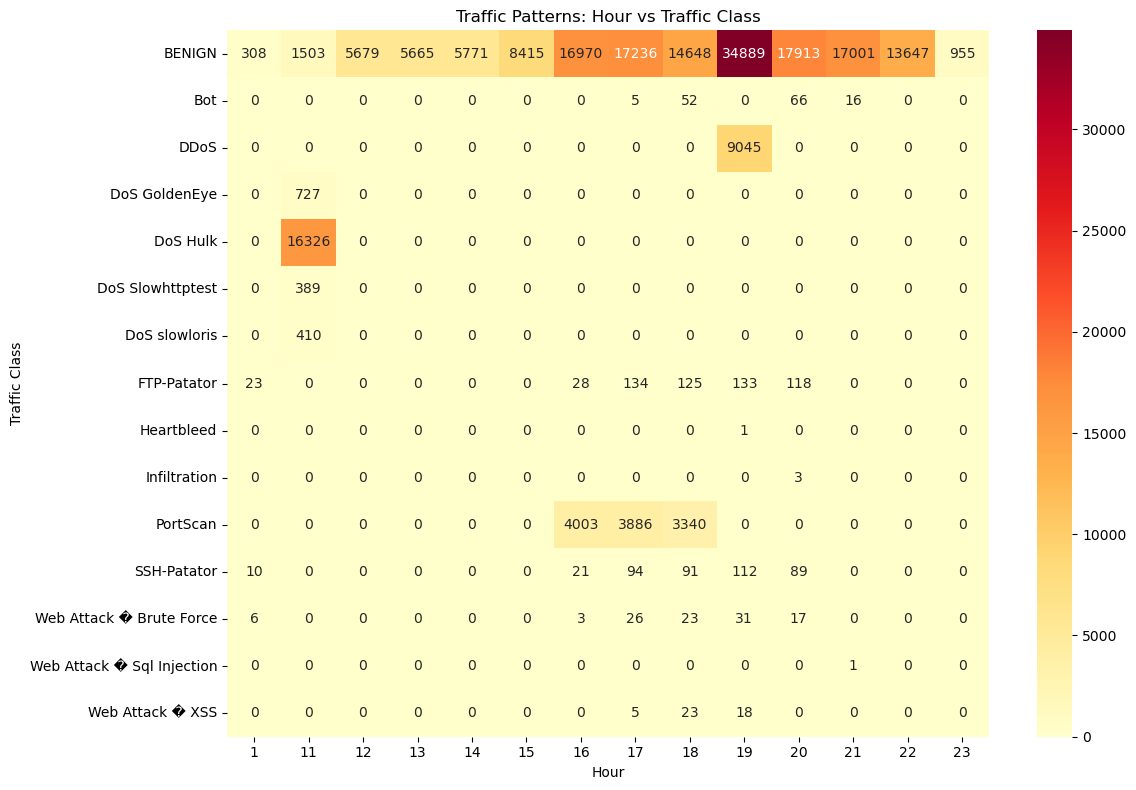

In [62]:
#Heatmap - Hour vs Label
hour_label_pivot = df.groupby(['hour', 'Label']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(hour_label_pivot.T, cmap='YlOrRd', annot=True, fmt='d')
plt.title('Traffic Patterns: Hour vs Traffic Class')
plt.xlabel('Hour')
plt.ylabel('Traffic Class')
plt.tight_layout()
plt.show()


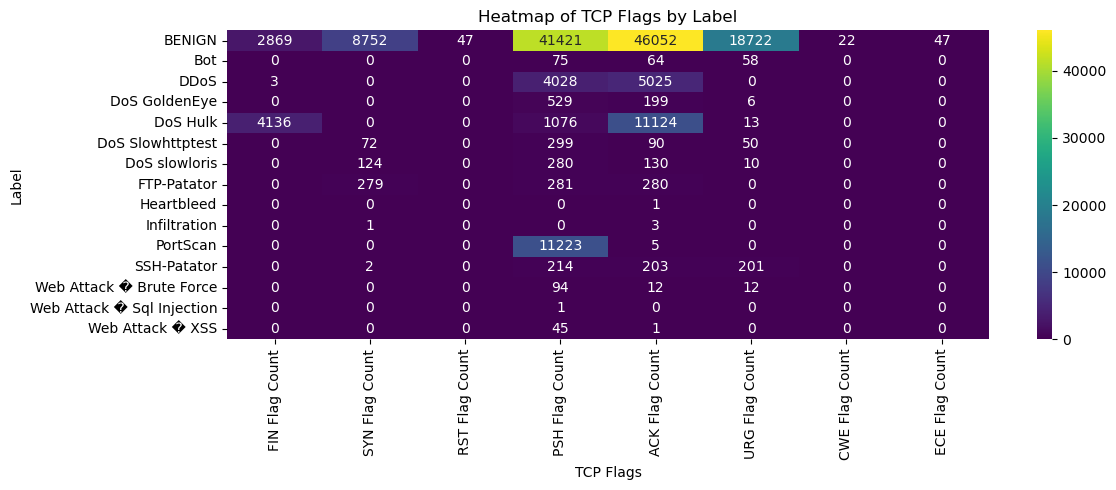

In [63]:
flag_columns = [
    'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count',
    'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count'
]

# Simply sum the flags per label
flag_label_matrix = df.groupby('Label')[flag_columns].sum()
plt.figure(figsize=(12, 5))
sns.heatmap(flag_label_matrix, annot=True, fmt="d", cmap="viridis")
plt.title("Heatmap of TCP Flags by Label")
plt.xlabel("TCP Flags")
plt.ylabel("Label")
plt.tight_layout()
plt.show()


ACK flags are particularly prominent in DoS Hulk and Web Attack - Brute Force, which is common in attacks where many connections are initiated and acknowledged. ACK flags often indicate a successful connection or an ongoing communication between the attacker and the target, which is typical in DoS attacks, as attackers aim to exhaust server resources by maintaining many open, acknowledged connections.

SYN flags are prevalent in PortScan, reflecting the initial connection attempts made by attackers to probe for open ports. This aligns with reconnaissance activities, where attackers identify vulnerabilities by sending SYN packets to multiple ports.

Minimal flag activity for attacks like Slowhttptest, SQL Injection, and XSS indicates that these attacks are more targeted at application-level vulnerabilities and don't rely on large amounts of network traffic or repeated connection attempts.

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200000 entries, 91784 to 153193
Data columns (total 84 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   hour                         200000 non-null  int64  
 1   minute                       200000 non-null  int64  
 2   second                       200000 non-null  int64  
 3   microsecond                  200000 non-null  int64  
 4   year                         200000 non-null  int64  
 5   Destination Port             200000 non-null  int64  
 6   Flow Duration                200000 non-null  int64  
 7   Total Fwd Packets            200000 non-null  int64  
 8   Total Backward Packets       200000 non-null  int64  
 9   Total Length of Fwd Packets  200000 non-null  int64  
 10  Total Length of Bwd Packets  200000 non-null  int64  
 11  Fwd Packet Length Max        200000 non-null  int64  
 12  Fwd Packet Length Min        200000 non-null  int64  
 13  

# feature engineering 

Total Packets = Total Fwd Packets + Total Backward Packets

Total Bytes = Total Length of Fwd Packets + Total Length of Bwd Packets

indow Bytes Total = Init_Win_bytes_forward + Init_Win_bytes_backward

Subflow Bytes Total = Subflow Fwd Bytes + Subflow Bwd Bytes

Subflow Packets Total = Subflow Fwd Packets + Subflow Bwd Packets

Bulk Rate Total = Fwd Avg Bulk Rate + Bwd Avg Bulk Rate

Bulk Bytes Total = Fwd Avg Bytes/Bulk + Bwd Avg Bytes/Bulk

Bulk Packets Total = Fwd Avg Packets/Bulk + Bwd Avg Packets/Bulk

Fwd IAT Range = Fwd IAT Max - Fwd IAT Min 

Bwd IAT Range = Bwd IAT Max - Bwd IAT Min 

Packet Length Range = Max Packet Length - Min Packet Length

In [65]:
# Create aggregated features
df['Total Packets'] = df['Total Fwd Packets'] + df['Total Backward Packets']
df['Total Bytes'] = df['Total Length of Fwd Packets'] + df['Total Length of Bwd Packets']
df['Window Bytes Total'] = df['Init_Win_bytes_forward'] + df['Init_Win_bytes_backward']
df['Subflow Bytes Total'] = df['Subflow Fwd Bytes'] + df['Subflow Bwd Bytes']
df['Subflow Packets Total'] = df['Subflow Fwd Packets'] + df['Subflow Bwd Packets']
df['Bulk Rate Total'] = df['Fwd Avg Bulk Rate'] + df['Bwd Avg Bulk Rate']
df['Bulk Bytes Total'] = df['Fwd Avg Bytes/Bulk'] + df['Bwd Avg Bytes/Bulk']
df['Bulk Packets Total'] = df['Fwd Avg Packets/Bulk'] + df['Bwd Avg Packets/Bulk']
df['Fwd IAT Range'] = df['Fwd IAT Max'] - df['Fwd IAT Min']
df['Bwd IAT Range'] = df['Bwd IAT Max'] - df['Bwd IAT Min']
df['Packet Length Range'] = df['Max Packet Length'] - df['Min Packet Length']

# Drop original columns
cols_to_drop = [
    'Total Fwd Packets', 'Total Backward Packets',
    'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
    'Init_Win_bytes_forward', 'Init_Win_bytes_backward',
    'Subflow Fwd Bytes', 'Subflow Bwd Bytes',
    'Subflow Fwd Packets', 'Subflow Bwd Packets',
    'Fwd Avg Bulk Rate', 'Bwd Avg Bulk Rate',
    'Fwd Avg Bytes/Bulk', 'Bwd Avg Bytes/Bulk',
    'Fwd Avg Packets/Bulk', 'Bwd Avg Packets/Bulk',
    'Fwd IAT Max', 'Fwd IAT Min',
    'Bwd IAT Max', 'Bwd IAT Min',
    'Max Packet Length', 'Min Packet Length'
]
df.drop(columns=cols_to_drop, inplace=True)

# Move 'Label' to the last column
label = df['Label']
df = df.drop(columns=['Label'])
df['Label'] = label

df.head(5)

hour  minute  second  microsecond  year  Destination Port  \
91784      1       0       8       988094  2021                22   
112425     1       0      10        36275  2021                53   
79363      1       0      21       763401  2021               139   
195477     1       0      25       650457  2021                53   
9903       1       0      26       613180  2021                53   

        Flow Duration  Fwd Packet Length Max  Fwd Packet Length Min  \
91784         1456807                    408                      0   
112425            168                     40                     40   
79363           11982                      0                      0   
195477            175                     33                     33   
9903              186                     46                     46   

        Fwd Packet Length Mean  Fwd Packet Length Std  Bwd Packet Length Max  \
91784                67.846154             101.813436                    976   
112425               40.000000               0.000000                     56   
79363                 0.000000               0.000000                      0   
195477               33.000000               0.000000                     65   
9903                 46.000000               0.000000                     99   

        Bwd Packet Length Min  Bwd Packet Length Mean  Bwd Packet Length Std  \
91784                       0              153.521739             306.211818   
112425                     56               56.000000               0.000000   
79363                       0                0.000000               0.000000   
195477                     65               65.000000               0.000000   
9903                       99               99.000000               0.000000   

        Flow Bytes/s  Flow Packets/s  Flow IAT Mean   Flow IAT Std  \
91784   6.663889e+03       58.346782   17342.940480  104891.560300   
112425  1.142857e+06    23809.523810      56.000000      91.798693   
79363   0.000000e+00      166.917042   11982.000000       0.000000   
195477  1.120000e+06    22857.142860      58.333333      61.158265   
9903    1.559140e+06    21505.376340      62.000000      62.793312   

        Flow IAT Max  Flow IAT Min  Fwd IAT Total  Fwd IAT Mean  Fwd IAT Std  \
91784         954332             0        1456807   38337.02632  163519.8726   
112425           162             3              3       3.00000       0.0000   
79363          11982         11982              0       0.00000       0.0000   
195477           124             3              3       3.00000       0.0000   
9903             128             3              3       3.00000       0.0000   

        Bwd IAT Total  Bwd IAT Mean  Bwd IAT Std  Fwd PSH Flags  \
91784          502370   11163.77778  27032.65039              0   
112425              3       3.00000      0.00000              0   
79363               0       0.00000      0.00000              0   
195477             48      48.00000      0.00000              0   
9903               55      55.00000      0.00000              0   

        Bwd PSH Flags  Fwd URG Flags  Bwd URG Flags  Fwd Header Length  \
91784               0              0              0                804   
112425              0              0              0                 64   
79363               0              0              0                 32   
195477              0              0              0                 40   
9903                0              0              0                 40   

        Bwd Header Length  Fwd Packets/s  Bwd Packets/s  Packet Length Mean  \
91784                 944      26.770876      31.575905          112.883721   
112425                 64   11904.761905   11904.761905           46.400000   
79363                  32      83.458521      83.458521            0.000000   
195477                 40   11428.571430   11428.571430           45.800000   
9903                   40   10752.688170   10752.688170    

# Flow Duration vs Total Packets

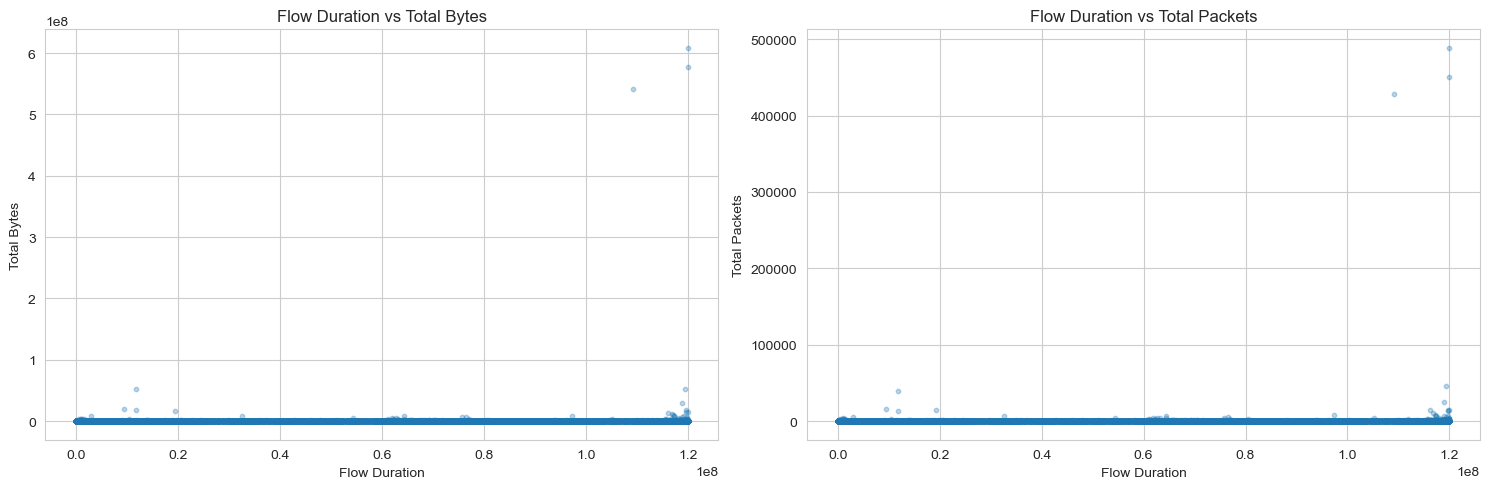

In [66]:
# Set style
sns.set_style("whitegrid")
plt.figure(figsize=(15, 5))

# Plot 1: Flow Duration vs Total Bytes
plt.subplot(1, 2, 1)
plt.scatter(df['Flow Duration'], df['Total Bytes'], alpha=0.3, s=10)
plt.xlabel('Flow Duration')
plt.ylabel('Total Bytes')
plt.title('Flow Duration vs Total Bytes')
plt.ticklabel_format(style='scientific', axis='both', scilimits=(0,0))

# Plot 2: Flow Duration vs Total Packets
plt.subplot(1, 2, 2)
plt.scatter(df['Flow Duration'], df['Total Packets'], alpha=0.3, s=10)
plt.xlabel('Flow Duration')
plt.ylabel('Total Packets')
plt.title('Flow Duration vs Total Packets')
plt.ticklabel_format(style='scientific', axis='x', scilimits=(0,0))

plt.tight_layout()
plt.show()

# Down/Up Ratio by Label

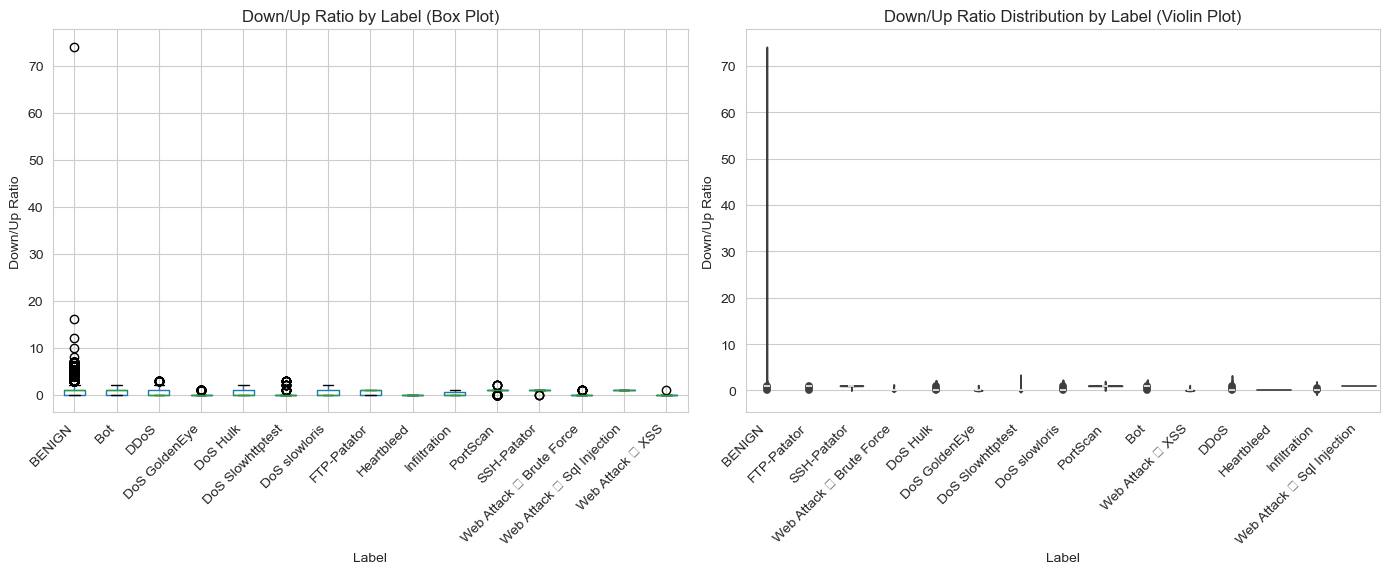

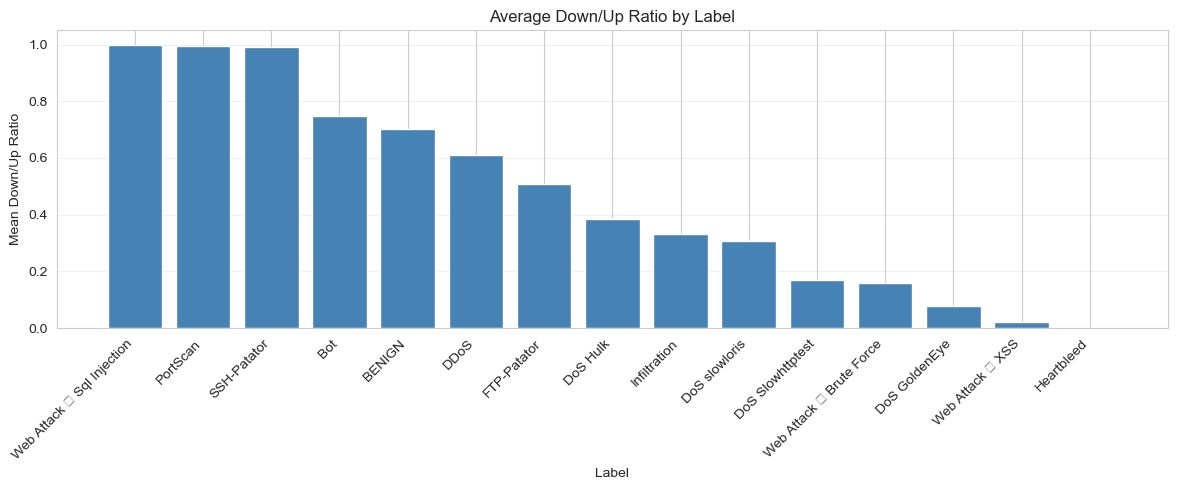

In [67]:
# Set style
sns.set_style("whitegrid")
plt.figure(figsize=(14, 6))

# Plot 1: Box plot
plt.subplot(1, 2, 1)
df.boxplot(column='Down/Up Ratio', by='Label', ax=plt.gca())
plt.xlabel('Label')
plt.ylabel('Down/Up Ratio')
plt.title('Down/Up Ratio by Label (Box Plot)')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45, ha='right')

# Plot 2: Violin plot
plt.subplot(1, 2, 2)
sns.violinplot(data=df, x='Label', y='Down/Up Ratio')
plt.xticks(rotation=45, ha='right')
plt.title('Down/Up Ratio Distribution by Label (Violin Plot)')

plt.tight_layout()
plt.show()

# Additional: Bar plot of mean Down/Up Ratio by Label
plt.figure(figsize=(12, 5))
ratio_by_label = df.groupby('Label')['Down/Up Ratio'].mean().sort_values(ascending=False)
plt.bar(range(len(ratio_by_label)), ratio_by_label.values, color='steelblue')
plt.xticks(range(len(ratio_by_label)), ratio_by_label.index, rotation=45, ha='right')
plt.xlabel('Label')
plt.ylabel('Mean Down/Up Ratio')
plt.title('Average Down/Up Ratio by Label')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

The bar chart showing the Average Down/Up Ratio by label indicates that attacks like SQL Injection and PortScan have the highest down-to-up traffic ratios, suggesting they involve large amounts of data being received (down) relative to sent data (up), which is typical for reconnaissance or large-scale exploitation attempts. Bot traffic also shows a high ratio, indicating significant incoming data, possibly from compromised machines. On the other hand, attacks like DoS Slowhttptest, Web Attack - Brute Force, and Heartbleed exhibit lower ratios, reflecting less asymmetric traffic or more limited data flows, characteristic of specific, targeted attacks. Benign traffic, unsurprisingly, falls in between, with a moderate ratio indicative of standard communication patterns.

# Window Bytes Total

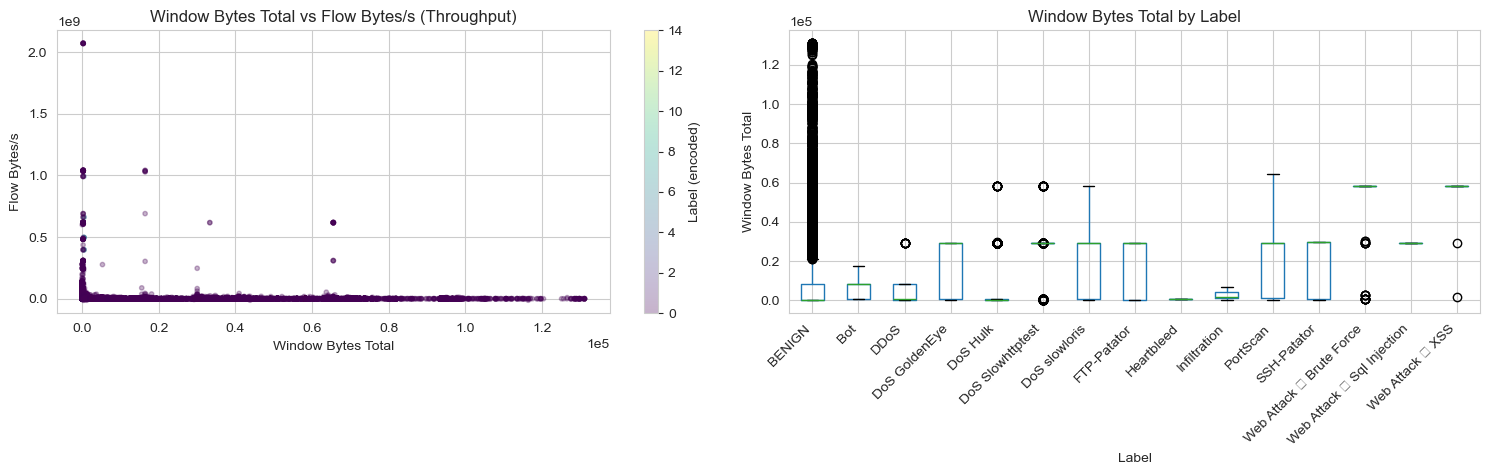

In [68]:
# Set style
sns.set_style("whitegrid")
plt.figure(figsize=(15, 5))

# Plot 1: Window Bytes Total vs Flow Bytes/s
plt.subplot(1, 2, 1)
plt.scatter(df['Window Bytes Total'], df['Flow Bytes/s'], 
            alpha=0.3, s=10, c=df['Label'].astype('category').cat.codes, 
            cmap='viridis')
plt.xlabel('Window Bytes Total')
plt.ylabel('Flow Bytes/s')
plt.title('Window Bytes Total vs Flow Bytes/s (Throughput)')
plt.colorbar(label='Label (encoded)')
plt.ticklabel_format(style='scientific', axis='both', scilimits=(0,0))

# Plot 2: Window Bytes Total distribution by Label
plt.subplot(1, 2, 2)
df.boxplot(column='Window Bytes Total', by='Label', ax=plt.gca())
plt.xlabel('Label')
plt.ylabel('Window Bytes Total')
plt.title('Window Bytes Total by Label')
plt.suptitle('')  
plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))

plt.tight_layout()
plt.show()


# Throughput vs Packet Rate

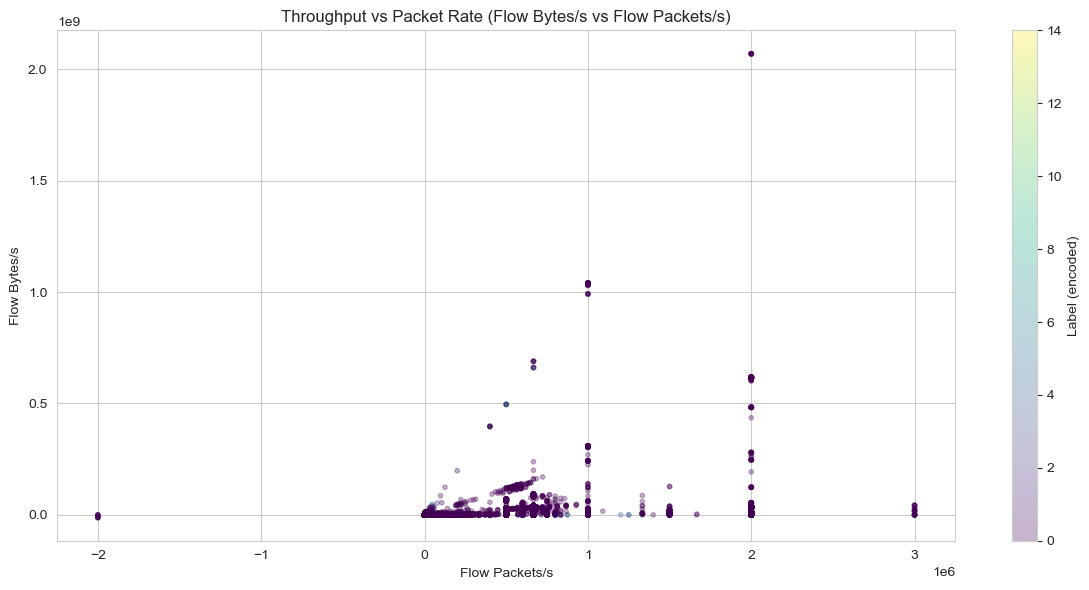

In [69]:
# Set style
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Scatter plot: Flow Bytes/s vs Flow Packets/s
plt.scatter(df['Flow Packets/s'], df['Flow Bytes/s'], 
            alpha=0.3, s=10, c=df['Label'].astype('category').cat.codes, 
            cmap='viridis')
plt.xlabel('Flow Packets/s')
plt.ylabel('Flow Bytes/s')
plt.title('Throughput vs Packet Rate (Flow Bytes/s vs Flow Packets/s)')
plt.colorbar(label='Label (encoded)')
plt.ticklabel_format(style='scientific', axis='both', scilimits=(0,0))
plt.tight_layout()
plt.show()

The scatter plot showing **Throughput vs Packet Rate (Flow Bytes/s vs Flow Packets/s)** highlights the relationship between flow throughput (in bytes per second) and packet rate (in packets per second). In the plot, most points are clustered around lower throughput and packet rates, indicating typical network traffic with smaller, less frequent data transfers. However, a few points stand out significantly on the right side of the plot, representing very high throughput and packet rates, which likely correspond to specific **DDoS** or **DoS** attacks. These outliers, with extremely high values of flow bytes and packet rates, suggest the presence of large, concentrated bursts of traffic typical of attack scenarios, overwhelming the network. This aligns with real-world network behavior where attacks like **DDoS** or **DoS** result in sudden spikes in both throughput and packet rates, targeting a network's capacity. The color-coded labels on the plot further show the distribution of different types of traffic or attacks, with higher values indicating more intense or potentially malicious activity.


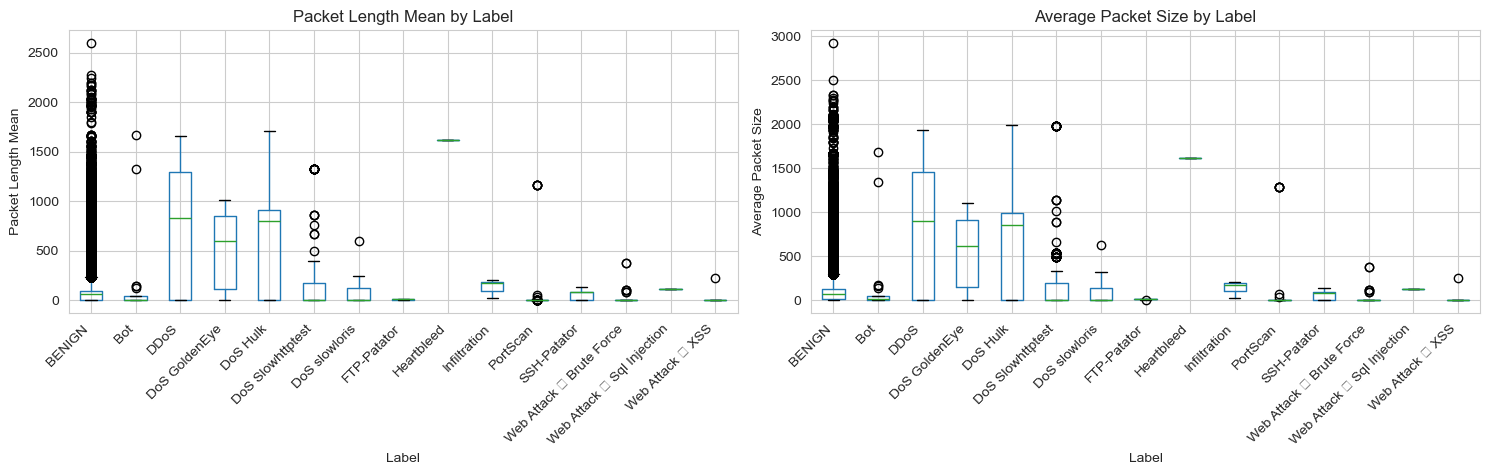

In [70]:
# Set style
sns.set_style("whitegrid")
plt.figure(figsize=(15, 5))

# Plot 1: Packet Length Mean vs Label
plt.subplot(1, 2, 1)
df.boxplot(column='Packet Length Mean', by='Label', ax=plt.gca())
plt.xlabel('Label')
plt.ylabel('Packet Length Mean')
plt.title('Packet Length Mean by Label')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45, ha='right')

# Plot 2: Average Packet Size vs Label
plt.subplot(1, 2, 2)
df.boxplot(column='Average Packet Size', by='Label', ax=plt.gca())
plt.xlabel('Label')
plt.ylabel('Average Packet Size')
plt.title('Average Packet Size by Label')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# flag by Label

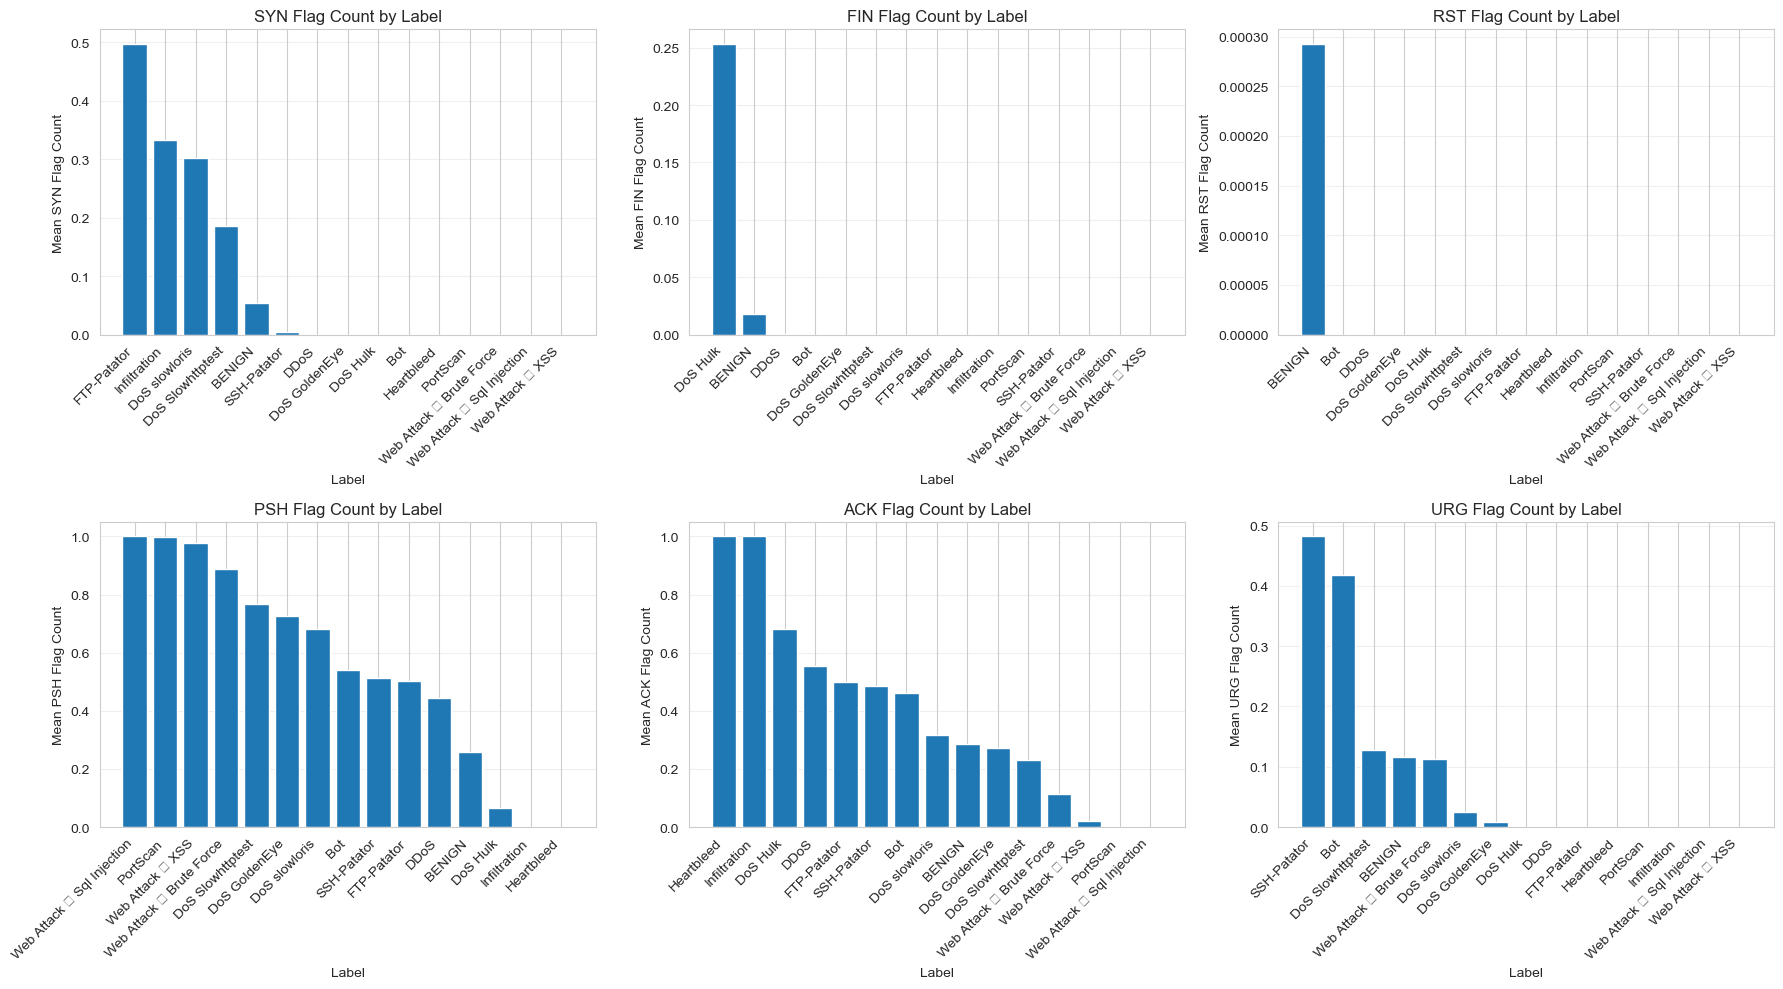

In [71]:
# Set style
sns.set_style("whitegrid")

# TCP flags to analyze
flags = ['SYN Flag Count', 'FIN Flag Count', 'RST Flag Count', 
         'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count']

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, flag in enumerate(flags):
    # Group by Label and calculate mean
    flag_by_label = df.groupby('Label')[flag].mean().sort_values(ascending=False)
    
    axes[idx].bar(range(len(flag_by_label)), flag_by_label.values)
    axes[idx].set_xticks(range(len(flag_by_label)))
    axes[idx].set_xticklabels(flag_by_label.index, rotation=45, ha='right')
    axes[idx].set_xlabel('Label')
    axes[idx].set_ylabel(f'Mean {flag}')
    axes[idx].set_title(f'{flag} by Label')
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### SYN Flag Count:
The **SYN** flag count is high for **FTP-Pator**, **SSH-Pator**, and **DoS Slowhttptest**, which is consistent with reconnaissance and connection attempt behaviors. **SYN** flags are used during the handshake process to initiate connections, so attacks like **FTP-Pator** (brute-forcing FTP credentials) and **SSH-Pator** (brute-forcing SSH credentials) naturally generate high **SYN** counts. **DoS Slowhttptest** also shows significant **SYN** activity, as the attack tries to establish incomplete connections to exhaust server resources.

### FIN Flag Count:
The **FIN** flag count is notably high for **DoS Hulk** and **BENIGN** traffic. **FIN** flags indicate the termination of a connection, so the high counts for **DoS Hulk** and **DoS GoldenEye** could indicate the conclusion of a high number of attack sessions, typical in **DoS** attacks where many connections are opened and closed rapidly.

### RST Flag Count:
The **RST** (reset) flag is predominantly seen in **Bot** traffic, which could indicate abnormal connection termination or aggressive network traffic resets. A **RST** flag is often used when a connection is forcibly closed, which is common in botnet traffic as they attempt to disconnect from servers once they've completed their task.

### PSH Flag Count:
The **PSH** (push) flag count is high for **Web Attack - SQL Injection** and **Web Attack - XSS**, indicating that these attacks likely involve pushing data to the target in an attempt to exploit vulnerabilities in the web application. The **PSH** flag is used to push data through the network, making it significant in attack patterns where data needs to be pushed for quick execution.

### ACK Flag Count:
The **ACK** flag count is high for **Heartbleed**, **DoS Hulk**, and **SSH-Pator**, among others. **ACK** flags are used to acknowledge data packets that have been successfully received, and their high occurrence suggests that these attacks involve a large number of connections and a significant exchange of data. The **ACK** flag count is a marker of ongoing communication between attackers and the target system, which is typical for prolonged attacks such as **DoS** or brute-force attempts.

### URG Flag Count:
The **URG** (urgent) flag count is notable for **SSH-Pator** and **Bot** traffic. **URG** flags indicate that urgent data is being sent, which is likely part of the aggressive and repetitive nature of brute-force attacks like **SSH-Pator**. **Bots** also show high **URG** activity, suggesting rapid, prioritized data transfer in automated attacks.


# Flow IAT by Label

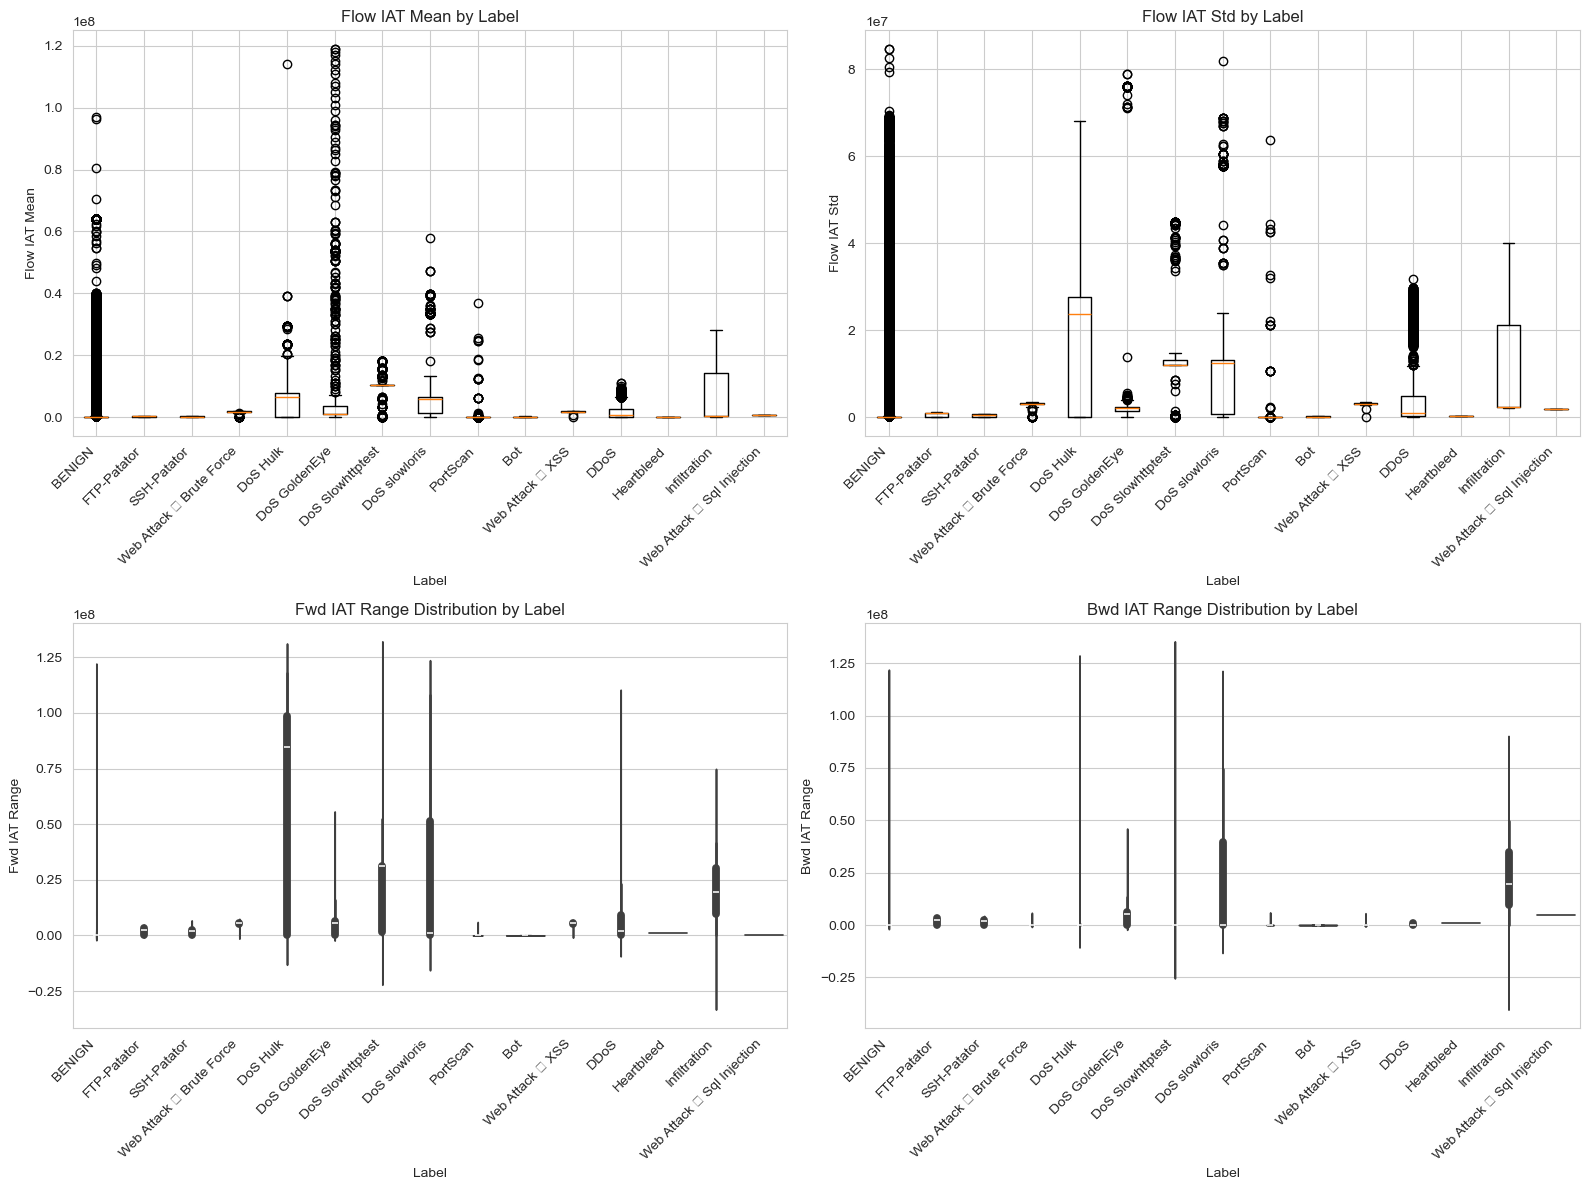

In [72]:
# Set style
sns.set_style("whitegrid")

# Creating subplots for IAT features
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Flow IAT Mean by Label
axes[0, 0].boxplot([df[df['Label'] == label]['Flow IAT Mean'].values 
                     for label in df['Label'].unique()],
                    labels=df['Label'].unique())
axes[0, 0].set_xlabel('Label')
axes[0, 0].set_ylabel('Flow IAT Mean')
axes[0, 0].set_title('Flow IAT Mean by Label')
axes[0, 0].tick_params(axis='x', rotation=45)
plt.setp(axes[0, 0].xaxis.get_majorticklabels(), rotation=45, ha='right')

# Plot 2: Flow IAT Std by Label
axes[0, 1].boxplot([df[df['Label'] == label]['Flow IAT Std'].values 
                     for label in df['Label'].unique()],
                    labels=df['Label'].unique())
axes[0, 1].set_xlabel('Label')
axes[0, 1].set_ylabel('Flow IAT Std')
axes[0, 1].set_title('Flow IAT Std by Label')
plt.setp(axes[0, 1].xaxis.get_majorticklabels(), rotation=45, ha='right')

# Plot 3: Fwd IAT Range by Label
sns.violinplot(data=df, x='Label', y='Fwd IAT Range', ax=axes[1, 0])
axes[1, 0].set_title('Fwd IAT Range Distribution by Label')
plt.setp(axes[1, 0].xaxis.get_majorticklabels(), rotation=45, ha='right')

# Plot 4: Bwd IAT Range by Label
sns.violinplot(data=df, x='Label', y='Bwd IAT Range', ax=axes[1, 1])
axes[1, 1].set_title('Bwd IAT Range Distribution by Label')
plt.setp(axes[1, 1].xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

# checking for constant columns

In [73]:
constant_columns = df.columns[df.nunique() == 1]

print("Constant columns:")
print(constant_columns)


Constant columns:
Index(['year', 'Bwd PSH Flags', 'Bwd URG Flags', 'Bulk Rate Total',
       'Bulk Bytes Total', 'Bulk Packets Total'],
      dtype='object')


In [74]:
columns = ['Bwd PSH Flags', 'Bwd URG Flags', 'Bulk Rate Total', 'Bulk Bytes Total', 'Bulk Packets Total']

for col in columns:
    print(f"Unique values in '{col}':")
    print(df[col].unique())
    print("\n") 


Unique values in 'Bwd PSH Flags':
[0]


Unique values in 'Bwd URG Flags':
[0]


Unique values in 'Bulk Rate Total':
[0]


Unique values in 'Bulk Bytes Total':
[0]


Unique values in 'Bulk Packets Total':
[0]




In [75]:
df = df.drop(['microsecond', 'year', 'Bwd PSH Flags', 'Bwd URG Flags', 'Bulk Rate Total',
       'Bulk Bytes Total', 'Bulk Packets Total'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200000 entries, 91784 to 153193
Data columns (total 66 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   hour                    200000 non-null  int64  
 1   minute                  200000 non-null  int64  
 2   second                  200000 non-null  int64  
 3   Destination Port        200000 non-null  int64  
 4   Flow Duration           200000 non-null  int64  
 5   Fwd Packet Length Max   200000 non-null  int64  
 6   Fwd Packet Length Min   200000 non-null  int64  
 7   Fwd Packet Length Mean  200000 non-null  float64
 8   Fwd Packet Length Std   200000 non-null  float64
 9   Bwd Packet Length Max   200000 non-null  int64  
 10  Bwd Packet Length Min   200000 non-null  int64  
 11  Bwd Packet Length Mean  200000 non-null  float64
 12  Bwd Packet Length Std   200000 non-null  float64
 13  Flow Bytes/s            200000 non-null  float64
 14  Flow Packets/s       

# Label Encoding with Mapping Output

In [76]:
column = "Label"
# Initialize encoder
le = LabelEncoder()
# Fit & transform
df[column] = le.fit_transform(df[column])

# Print mapping
mapping = dict(zip(le.transform(le.classes_), le.classes_))
print("LABEL MAPPING")
for k, v in mapping.items():
    print(f"{k}: {v}")


LABEL MAPPING
0: BENIGN
1: Bot
2: DDoS
3: DoS GoldenEye
4: DoS Hulk
5: DoS Slowhttptest
6: DoS slowloris
7: FTP-Patator
8: Heartbleed
9: Infiltration
10: PortScan
11: SSH-Patator
12: Web Attack � Brute Force
13: Web Attack � Sql Injection
14: Web Attack � XSS


In [77]:
df.head(5)

hour  minute  second  Destination Port  Flow Duration  \
91784      1       0       8                22        1456807   
112425     1       0      10                53            168   
79363      1       0      21               139          11982   
195477     1       0      25                53            175   
9903       1       0      26                53            186   

        Fwd Packet Length Max  Fwd Packet Length Min  Fwd Packet Length Mean  \
91784                     408                      0               67.846154   
112425                     40                     40               40.000000   
79363                       0                      0                0.000000   
195477                     33                     33               33.000000   
9903                       46                     46               46.000000   

        Fwd Packet Length Std  Bwd Packet Length Max  Bwd Packet Length Min  \
91784              101.813436                    976                      0   
112425               0.000000                     56                     56   
79363                0.000000                      0                      0   
195477               0.000000                     65                     65   
9903                 0.000000                     99                     99   

        Bwd Packet Length Mean  Bwd Packet Length Std  Flow Bytes/s  \
91784               153.521739             306.211818  6.663889e+03   
112425               56.000000               0.000000  1.142857e+06   
79363                 0.000000               0.000000  0.000000e+00   
195477               65.000000               0.000000  1.120000e+06   
9903                 99.000000               0.000000  1.559140e+06   

        Flow Packets/s  Flow IAT Mean   Flow IAT Std  Flow IAT Max  \
91784        58.346782   17342.940480  104891.560300        954332   
112425    23809.523810      56.000000      91.798693           162   
79363       166.917042   11982.000000       0.000000         11982   
195477    22857.142860      58.333333      61.158265           124   
9903      21505.376340      62.000000      62.793312           128   

        Flow IAT Min  Fwd IAT Total  Fwd IAT Mean  Fwd IAT Std  Bwd IAT Total  \
91784              0        1456807   38337.02632  163519.8726         502370   
112425             3              3       3.00000       0.0000              3   
79363          11982              0       0.00000       0.0000              0   
195477             3              3       3.00000       0.0000             48   
9903               3              3       3.00000       0.0000             55   

        Bwd IAT Mean  Bwd IAT Std  Fwd PSH Flags  Fwd URG Flags  \
91784    11163.77778  27032.65039              0              0   
112425       3.00000      0.00000              0              0   
79363        0.00000      0.00000              0              0   
195477      48.00000      0.00000              0              0   
9903        55.00000      0.00000              0              0   

        Fwd Header Length  Bwd Header Length  Fwd Packets/s  Bwd Packets/s  \
91784                 804                944      26.770876      31.575905   
112425                 64                 64   11904.761905   11904.761905   
79363                  32                 32      83.458521      83.458521   
195477                 40                 40   11428.571430   11428.571430   
9903                   40                 40   10752.688170   10752.688170   

        Packet Length Mean  Packet Length Std  Packet Length Variance  \
91784           112.883721         237.169060             56249.16279   
112425           46.400000           8.763561                76.80000   
79363             0.000000           0.000000                 0.00000   
195477           45.800000          17.527122               307.20000   
9903             67.200000          29.029296               842.70000   

        FIN Fla

# Saving the final preprocesed dataset

In [78]:
# saving the final preprocessed dataset in a new csv
df.to_csv("../data/preprocessed_dataset.csv", index=False)


In [82]:
df = pd.read_csv("../data/preprocessed_dataset.csv")
df.head(5)

hour  minute  second  Destination Port  Flow Duration  \
0     1       0       8                22        1456807   
1     1       0      10                53            168   
2     1       0      21               139          11982   
3     1       0      25                53            175   
4     1       0      26                53            186   

   Fwd Packet Length Max  Fwd Packet Length Min  Fwd Packet Length Mean  \
0                    408                      0               67.846154   
1                     40                     40               40.000000   
2                      0                      0                0.000000   
3                     33                     33               33.000000   
4                     46                     46               46.000000   

   Fwd Packet Length Std  Bwd Packet Length Max  Bwd Packet Length Min  \
0             101.813436                    976                      0   
1               0.000000                     56                     56   
2               0.000000                      0                      0   
3               0.000000                     65                     65   
4               0.000000                     99                     99   

   Bwd Packet Length Mean  Bwd Packet Length Std  Flow Bytes/s  \
0              153.521739             306.211818  6.663889e+03   
1               56.000000               0.000000  1.142857e+06   
2                0.000000               0.000000  0.000000e+00   
3               65.000000               0.000000  1.120000e+06   
4               99.000000               0.000000  1.559140e+06   

   Flow Packets/s  Flow IAT Mean   Flow IAT Std  Flow IAT Max  Flow IAT Min  \
0       58.346782   17342.940480  104891.560300        954332             0   
1    23809.523810      56.000000      91.798693           162             3   
2      166.917042   11982.000000       0.000000         11982         11982   
3    22857.142860      58.333333      61.158265           124             3   
4    21505.376340      62.000000      62.793312           128             3   

   Fwd IAT Total  Fwd IAT Mean  Fwd IAT Std  Bwd IAT Total  Bwd IAT Mean  \
0        1456807   38337.02632  163519.8726         502370   11163.77778   
1              3       3.00000       0.0000              3       3.00000   
2              0       0.00000       0.0000              0       0.00000   
3              3       3.00000       0.0000             48      48.00000   
4              3       3.00000       0.0000             55      55.00000   

   Bwd IAT Std  Fwd PSH Flags  Fwd URG Flags  Fwd Header Length  \
0  27032.65039              0              0                804   
1      0.00000              0              0                 64   
2      0.00000              0              0                 32   
3      0.00000              0              0                 40   
4      0.00000              0              0                 40   

   Bwd Header Length  Fwd Packets/s  Bwd Packets/s  Packet Length Mean  \
0                944      26.770876      31.575905          112.883721   
1                 64   11904.761905   11904.761905           46.400000   
2                 32      83.458521      83.458521            0.000000   
3                 40   11428.571430   11428.571430           45.800000   
4                 40   10752.688170   10752.688170           67.200000   

   Packet Length Std  Packet Length Variance  FIN Flag Count  SYN Flag Count  \
0         237.169060             56249.16279               0               0   
1           8.763561                76.80000               0               0   
2           0.000000                 0.00000               0               0   
3          17.527122               307.20000               0               0   
4          29.029296               842.70000               0               0   

   RST Flag Count  PSH Flag Count  ACK Flag Count  URG Flag Count  \
0               0  

# Persistence forecast/Median forecast

### 5-Row Lag (Referring to the Last 5 Observations)

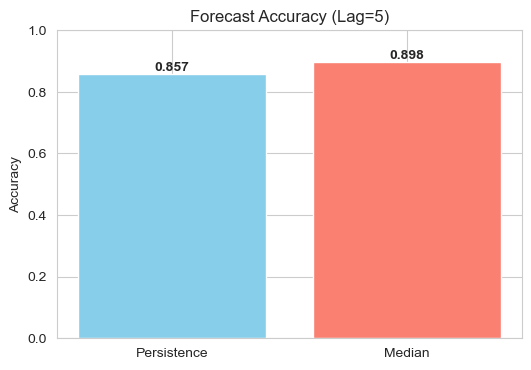

In [83]:
df["Label"] = df["Label"].astype(int)
# Set lag
lag = 5  

# True labels (adjusted for lag)
y_true = df["Label"].iloc[lag:].values

# Persistence forecast (Label[t-lag])
y_pred_persist = df["Label"].shift(lag).iloc[lag:].values

# Median forecast (median of past 'lag' values)
y_pred_median = df["Label"].shift(1).rolling(window=lag).median().iloc[lag:].fillna(method='bfill').astype(int).values

# Compute accuracies
acc_persist = accuracy_score(y_true, y_pred_persist)
acc_median  = accuracy_score(y_true, y_pred_median)

# Create a DataFrame for plotting
accuracy_df = pd.DataFrame({
    "Forecast": ["Persistence", "Median"],
    "Accuracy": [acc_persist, acc_median]
})

# Plot
plt.figure(figsize=(6,4))
plt.bar(accuracy_df["Forecast"], accuracy_df["Accuracy"], color=["skyblue", "salmon"])
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title(f"Forecast Accuracy (Lag={lag})")
for i, v in enumerate(accuracy_df["Accuracy"]):
    plt.text(i, v + 0.01, f"{v:.3f}", ha='center', fontweight='bold')
plt.show()

### lag_seconds = 5 (Refers to the last 5 seconds)"

In [84]:
df["Label"] = df["Label"].astype(int)

# Set lag in seconds
lag_seconds = 5

# Precompute timestamps in seconds
timestamps = df["hour"].values*3600 + df["minute"].values*60 + df["second"].values
labels = df["Label"].values

# Initialize lists
y_true = []
y_pred_persist = []
y_pred_median = []

# Pointer for previous rows
j = 0

for i in range(len(labels)):
    # Move j forward until it's the last row where timestamp <= current - lag
    while j < i and timestamps[j] <= timestamps[i] - lag_seconds:
        j += 1
    # j points to first row AFTER the lag, so last valid row is j-1
    if j == 0:
        continue  
    
    y_true.append(labels[i])
    
    # Persistence: last label before lag_seconds
    y_pred_persist.append(labels[j-1])
    
    # Median: median of all labels within lag window (0..j-1)
    y_pred_median.append(int(np.median(labels[:j])))


# Evaluate
acc_persist = accuracy_score(y_true, y_pred_persist)
acc_median  = accuracy_score(y_true, y_pred_median)

print("Persistence Accuracy:", acc_persist)
print("Median Forecast Accuracy:", acc_median)

Persistence Accuracy: 0.8584035840358404
Median Forecast Accuracy: 0.7946179461794618


### lag_seconds = 10 (Refers to the last 5 seconds)"

In [85]:
lag_seconds = 10


y_true = []
y_pred_persist = []
y_pred_median = []

# Pointer for previous rows
j = 0

for i in range(len(labels)):
    # Move j forward until it's the last row where timestamp <= current - lag
    while j < i and timestamps[j] <= timestamps[i] - lag_seconds:
        j += 1
    # j points to first row AFTER the lag, so last valid row is j-1
    if j == 0:
        continue  # no valid previous row
    
    y_true.append(labels[i])
    
    # Persistence: last label before lag_seconds
    y_pred_persist.append(labels[j-1])
    
    # Median: median of all labels within lag window (0..j-1)
    y_pred_median.append(int(np.median(labels[:j])))

# Evaluate
acc_persist = accuracy_score(y_true, y_pred_persist)
acc_median  = accuracy_score(y_true, y_pred_median)

print("Persistence Accuracy:", acc_persist)
print("Median Forecast Accuracy:", acc_median)

Persistence Accuracy: 0.8581985819858199
Median Forecast Accuracy: 0.7938879388793888


# Model Training, Evaluation, and Comparison with Feature Scaling and Saving (ML)

DATA SPLITTING :

Features selected: 65
Feature names: hour, minute, second, Destination Port, Flow Duration, Fwd Packet Length Max, Fwd Packet Length Min, Fwd Packet Length Mean, Fwd Packet Length Std, Bwd Packet Length Max...

Train set: 160,000 samples (80.0%)
Test set:  40,000 samples (20.0%)

Train set class distribution:
Label
0     128480
1        111
2       7236
3        581
4      13061
5        311
6        328
7        449
8          1
9          2
10      8983
11       334
12        85
13         1
14        37
Name: count, dtype: int64

Test set class distribution:
Label
0     32120
1        28
2      1809
3       146
4      3265
5        78
6        82
7       112
9         1
10     2246
11       83
12       21
14        9
Name: count, dtype: int64
MODEL TRAINING & EVALUATION

Training Logistic Regression...
  Accuracy: 0.9789
  F1-Score: 0.9774

Training Decision Tree...
  Accuracy: 0.9985
  F1-Score: 0.9984

Training Random Forest...
  Accuracy: 0.9982
  F1-Score: 0.99

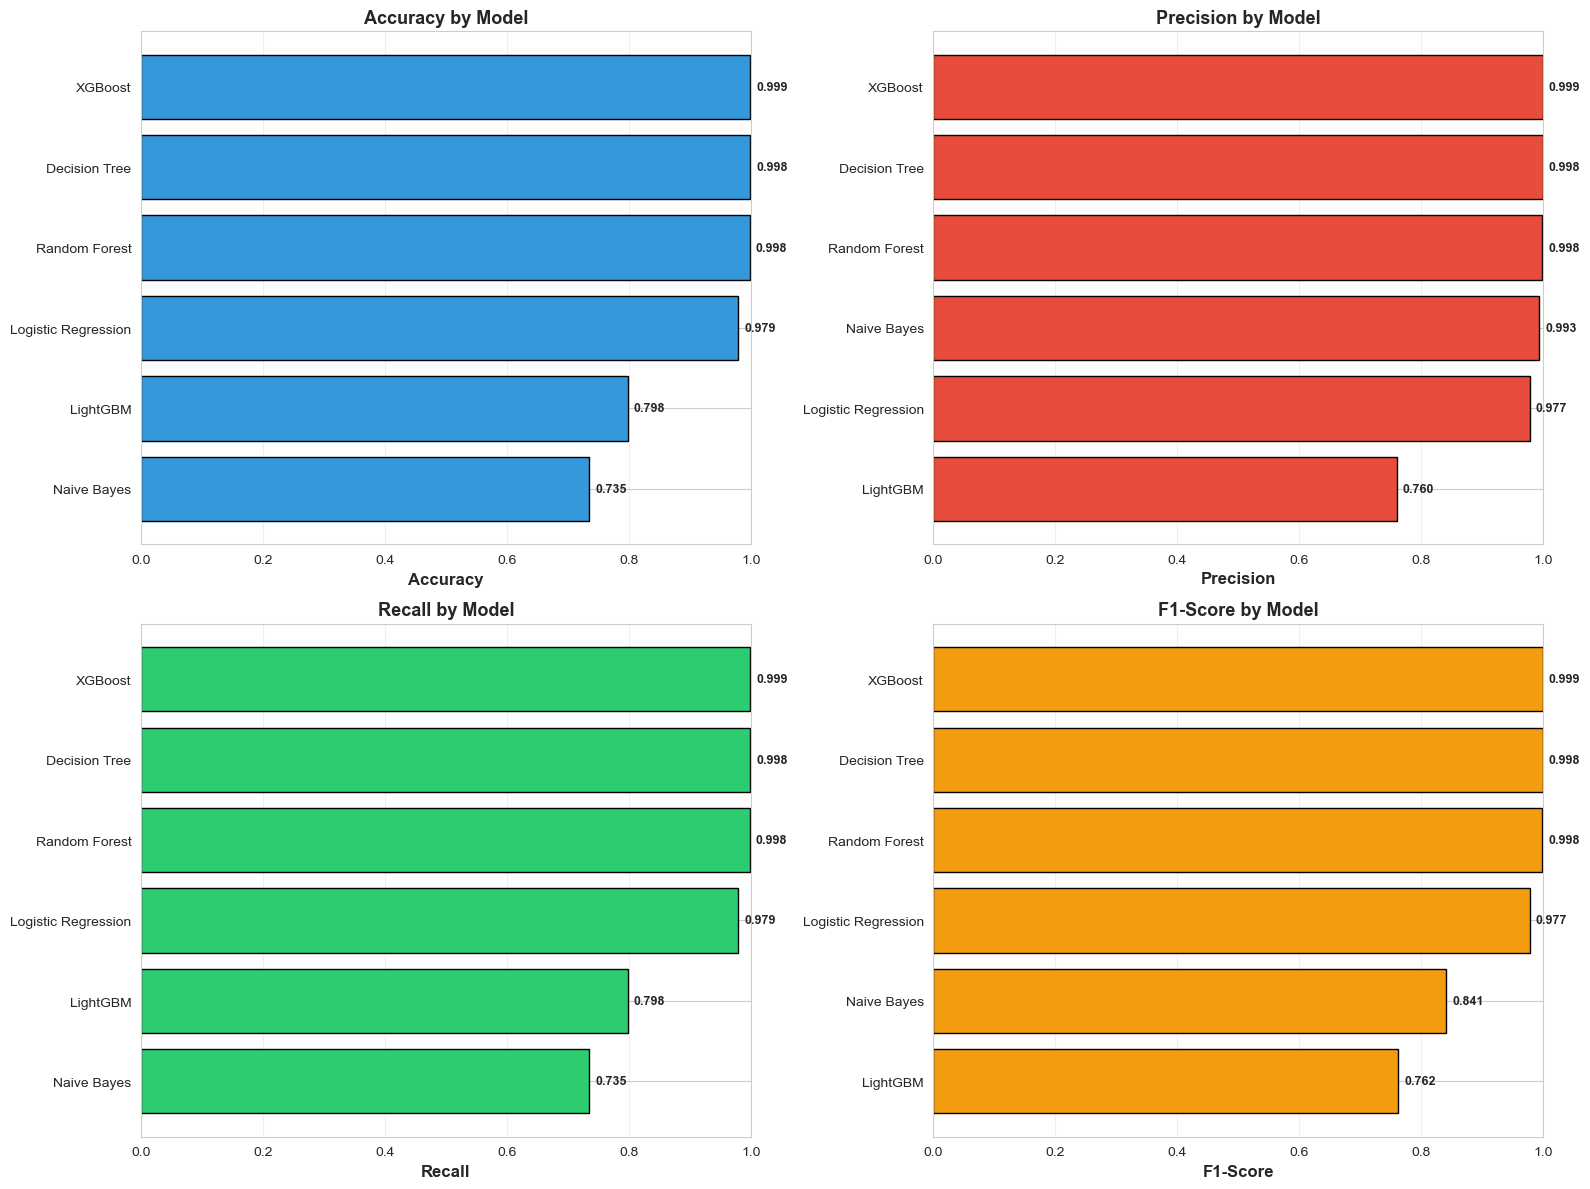

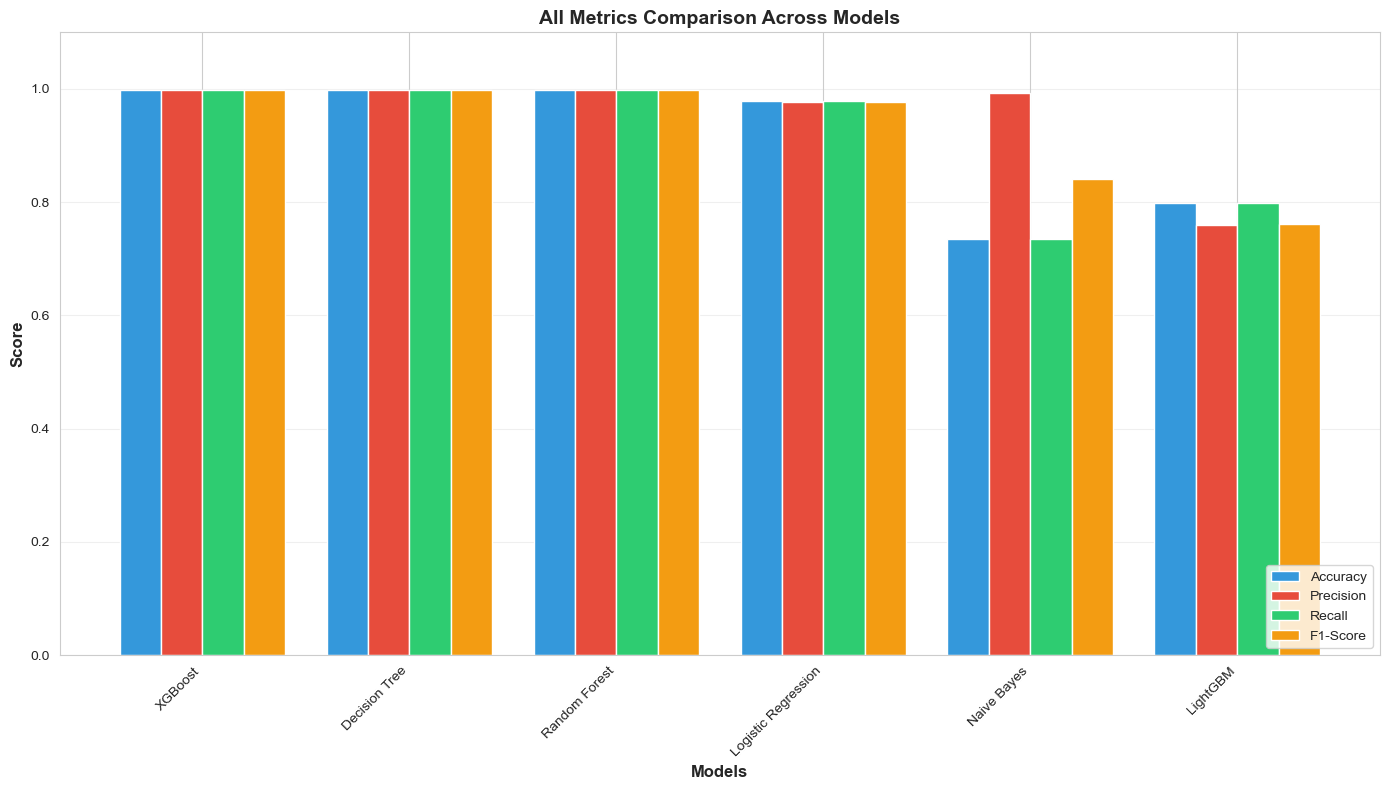



BEST MODEL DETAILED ANALYSIS

Model: XGBoost

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     32120
           1       0.89      0.89      0.89        28
           2       1.00      1.00      1.00      1809
           3       0.99      1.00      1.00       146
           4       1.00      1.00      1.00      3265
           5       1.00      0.97      0.99        78
           6       1.00      1.00      1.00        82
           7       0.99      1.00      1.00       112
           9       0.00      0.00      0.00         1
          10       1.00      1.00      1.00      2246
          11       1.00      0.99      0.99        83
          12       0.64      0.67      0.65        21
          14       0.43      0.33      0.38         9

    accuracy                           1.00     40000
   macro avg       0.84      0.83      0.84     40000
weighted avg       1.00      1.00      1.00     40000



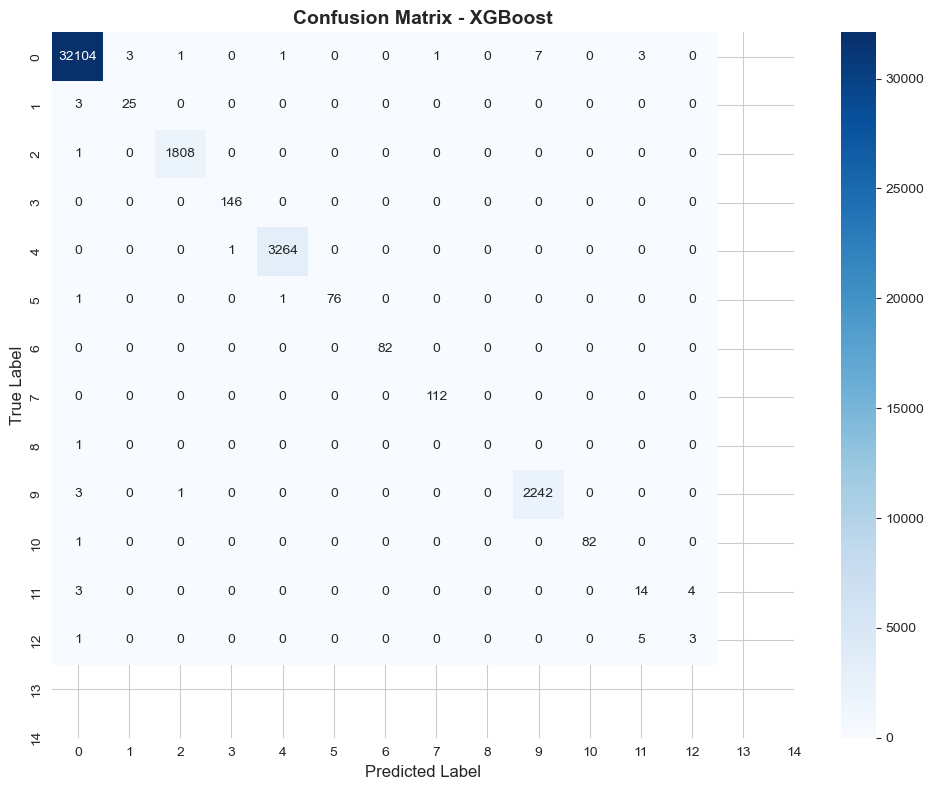



MODEL SAVING

 Best model saved as: ../src/models/machine learning/best_model_xgboost.pkl
 Scaler saved as: ../scaler-features/scaler.pkl
 Feature names saved as: ../scaler-features/feature_names.pkl


In [86]:
warnings.filterwarnings('ignore')

# Set style 
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)


print("DATA SPLITTING :")

# Prepare features and target
feature_cols = [col for col in df.columns if col != 'Label']
X = df[feature_cols]
y = df['Label']

print(f"\nFeatures selected: {len(feature_cols)}")
print(f"Feature names: {', '.join(feature_cols[:10])}{'...' if len(feature_cols) > 10 else ''}")

# Check for rare classes
class_counts = y.value_counts()
rare_classes = class_counts[class_counts < 2].index.tolist()

if len(rare_classes) > 0:
    
    rare_mask = y.isin(rare_classes)
    X_rare = X[rare_mask]
    y_rare = y[rare_mask]
    
    X_regular = X[~rare_mask]
    y_regular = y[~rare_mask]
    
    X_train, X_test, y_train, y_test = train_test_split(
        X_regular, y_regular, test_size=0.2, random_state=42, stratify=y_regular, shuffle=True
    )
    
    X_train = pd.concat([X_train, X_rare])
    y_train = pd.concat([y_train, y_rare])
else:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y, shuffle=True
    )

print(f"\nTrain set: {len(X_train):,} samples ({len(X_train)/len(df)*100:.1f}%)")
print(f"Test set:  {len(X_test):,} samples ({len(X_test)/len(df)*100:.1f}%)")

print("\nTrain set class distribution:")
print(y_train.value_counts().sort_index())
print("\nTest set class distribution:")
print(y_test.value_counts().sort_index())

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


print("MODEL TRAINING & EVALUATION")

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=500, random_state=42, n_jobs=-1),
    'Decision Tree': DecisionTreeClassifier(max_depth=15, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=50, max_depth=15, random_state=42, n_jobs=-1),
    'XGBoost': XGBClassifier(n_estimators=50, max_depth=8, random_state=42, n_jobs=-1, eval_metric='mlogloss', tree_method='hist'),
    'LightGBM': LGBMClassifier(n_estimators=50, max_depth=8, random_state=42, n_jobs=-1, verbose=-1),
    'Naive Bayes': GaussianNB()
}

results = []
predictions = {}

# Train and evaluate models
for name, model in models.items():
    print(f"\nTraining {name}...")
    
    if name in ['Logistic Regression', 'KNN', 'Naive Bayes']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    predictions[name] = y_pred
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })
    
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  F1-Score: {f1:.4f}")

# Display results
results_df = pd.DataFrame(results).sort_values('F1-Score', ascending=False)

print("\n")
print("MODEL COMPARISON RESULTS")
print(results_df.to_string(index=False))
print(f"\n Best Model: {results_df.iloc[0]['Model']} (F1-Score: {results_df.iloc[0]['F1-Score']:.4f})")

# Visualization : Model Performance Comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']

for idx, (metric, color) in enumerate(zip(metrics, colors)):
    ax = axes[idx // 2, idx % 2]
    sorted_data = results_df.sort_values(metric, ascending=True)
    bars = ax.barh(sorted_data['Model'], sorted_data[metric], color=color, edgecolor='black')
    ax.set_xlabel(metric, fontsize=12, fontweight='bold')
    ax.set_title(f'{metric} by Model', fontsize=13, fontweight='bold')
    ax.set_xlim([0, 1])
    ax.grid(axis='x', alpha=0.3)
    
    # Add value labels
    for bar in bars:
        width = bar.get_width()
        ax.text(width + 0.01, bar.get_y() + bar.get_height()/2, f'{width:.3f}', 
                ha='left', va='center', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.savefig('../visualization/metrics by model (ML).png', format='png')
plt.show()

# Visualization : Overall Metrics Comparison
fig, ax = plt.subplots(figsize=(14, 8))
x = np.arange(len(results_df))
width = 0.2

bars1 = ax.bar(x - 1.5*width, results_df['Accuracy'], width, label='Accuracy', color='#3498db')
bars2 = ax.bar(x - 0.5*width, results_df['Precision'], width, label='Precision', color='#e74c3c')
bars3 = ax.bar(x + 0.5*width, results_df['Recall'], width, label='Recall', color='#2ecc71')
bars4 = ax.bar(x + 1.5*width, results_df['F1-Score'], width, label='F1-Score', color='#f39c12')

ax.set_xlabel('Models', fontsize=12, fontweight='bold')
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('All Metrics Comparison Across Models', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(results_df['Model'], rotation=45, ha='right')
ax.legend(loc='lower right', fontsize=10)
ax.set_ylim([0, 1.1])
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../visualization/All Metrics Comparison Across Models.png', format='png')
plt.show()

# Confusion Matrix for Best Model
print("\n")
print("BEST MODEL DETAILED ANALYSIS")

best_model_name = results_df.iloc[0]['Model']
y_pred_best = predictions[best_model_name]

print(f"\nModel: {best_model_name}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best, zero_division=0))

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True, 
            xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title(f'Confusion Matrix - {best_model_name}', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.savefig('../visualization/confusion matrix for best model.png', format='png')
plt.show()

# Save the best model
print("\n")
print("MODEL SAVING")

import pickle

# Get the best model object
best_model_obj = None
for name, model in models.items():
    if name == best_model_name:
        best_model_obj = model
        break

# Save the model
model_filename = f'../src/models/machine learning/best_model_{best_model_name.replace(" ", "_").lower()}.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(best_model_obj, file)
print(f"\n Best model saved as: {model_filename}")

# Save the scaler as well (important for deployment)
scaler_filename = '../scaler-features/scaler.pkl'
with open(scaler_filename, 'wb') as file:
    pickle.dump(scaler, file)
print(f" Scaler saved as: {scaler_filename}")

# Save feature names for later use
feature_filename = '../scaler-features/feature_names.pkl'
with open(feature_filename, 'wb') as file:
    pickle.dump(feature_cols, file)
print(f" Feature names saved as: {feature_filename}")

The results show that **XGBoost** emerged as the best-performing model, achieving an impressive **F1-Score** of **0.9989** along with high **accuracy** (99.90%) and **precision** (99.89%). This suggests that **XGBoost** not only has excellent predictive accuracy but also effectively handles the class imbalance, providing accurate predictions across most classes. **Decision Tree** and **Random Forest** also performed very well, with **F1-Scores** of **0.9984** and **0.9978** respectively, indicating strong results in terms of both precision and recall, making them robust alternatives. **Logistic Regression**, while not as strong as the ensemble methods, still performed reasonably well with an **F1-Score** of **0.9774**.

On the other hand, **Naive Bayes** and **LightGBM** performed notably worse, with **Naive Bayes** achieving a much lower **accuracy** (73.51%) but a relatively high **precision** (99.34%), suggesting a high number of false negatives, particularly for smaller classes. **LightGBM** also showed weaker results with an **F1-Score** of **0.7619**, which indicates that it struggled with the class imbalance in the dataset.

**XGBoost**'s **classification report** further highlights its dominance, with excellent performance across most classes, achieving near-perfect results for many labels, including **class 0** (with **32120** samples), which is the largest class. However, it struggled with **rare classes** like **label 12** and **label 14**, where the **precision** and **recall** were notably lower, likely due to their extreme rarity in the dataset.

The model was saved, and the corresponding **scaler** and **feature names** were also saved for future use, ensuring that the preprocessing steps can be reproduced during deployment. This overall evaluation shows that **XGBoost** is the most suitable model for this dataset, excelling in accuracy and handling most classes effectively, with the primary challenge being the rare class predictions.


# Model Training, Evaluation, and Comparison with Feature Scaling and Saving (Deep Learning)

Train: 160,000 | Test: 40,000



DEEP LEARNING MODELS

 Training Simple MLP...
 Accuracy: 0.9927 | F1-Score: 0.9920

 Training Deep MLP...
 Accuracy: 0.9929 | F1-Score: 0.9923

 Training Wide & Deep Network...
 Accuracy: 0.9936 | F1-Score: 0.9929

 Training 1D CNN...
 Accuracy: 0.9927 | F1-Score: 0.9920

 Training Autoencoder + Classifier...
 Accuracy: 0.9928 | F1-Score: 0.9927


DEEP LEARNING RESULTS
      Model  Accuracy  Precision   Recall  F1-Score  Parameters
Wide & Deep  0.993550   0.992253 0.993550  0.992864       20271
Autoencoder  0.992750   0.992897 0.992750  0.992710       19279
   Deep MLP  0.992950   0.991740 0.992950  0.992279       62415
 Simple MLP  0.992725   0.991412 0.992725  0.991982       19279
     1D CNN  0.992675   0.991368 0.992675  0.991974      157071

 Best Model: Wide & Deep (F1-Score: 0.9929)

 visualizations...


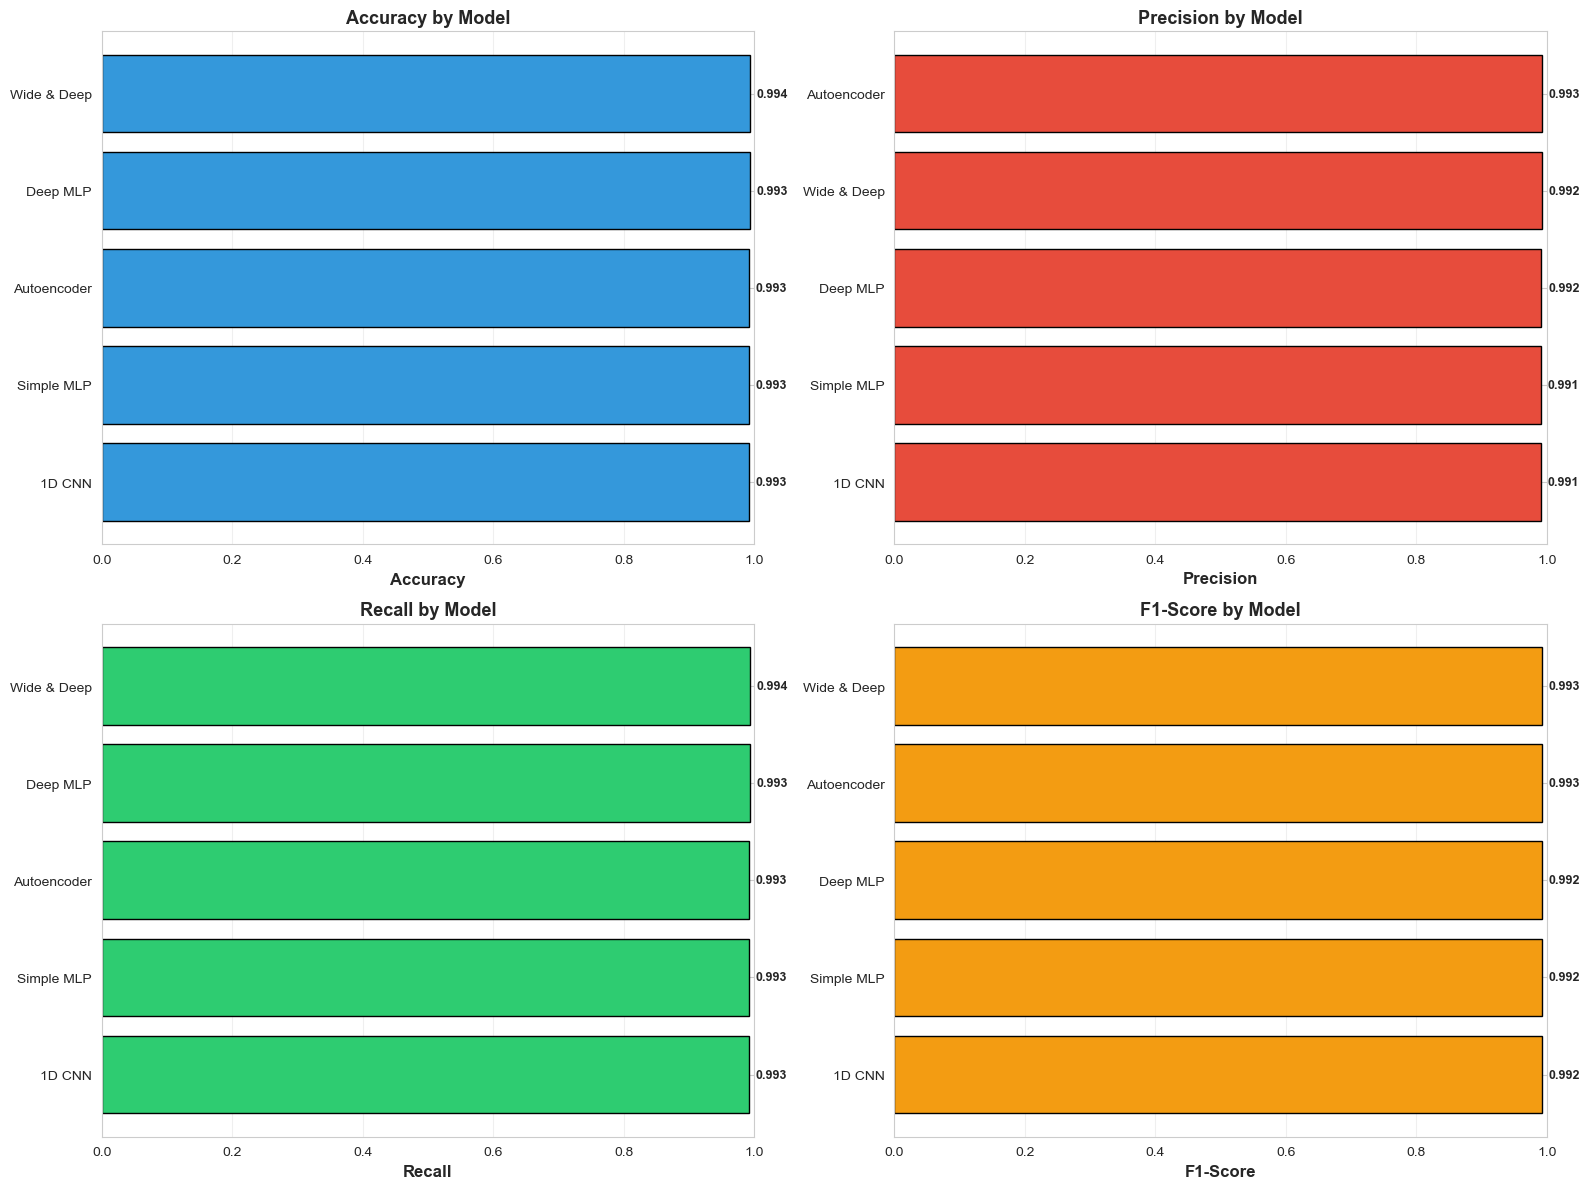

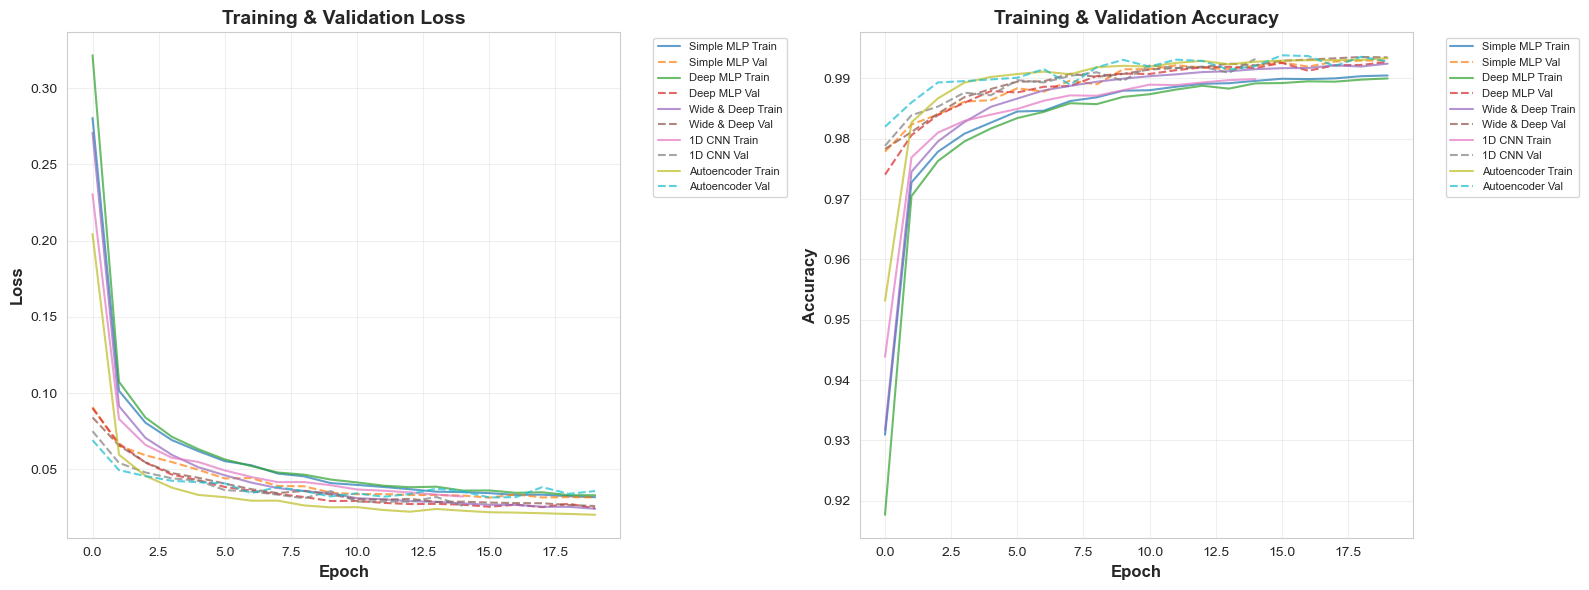

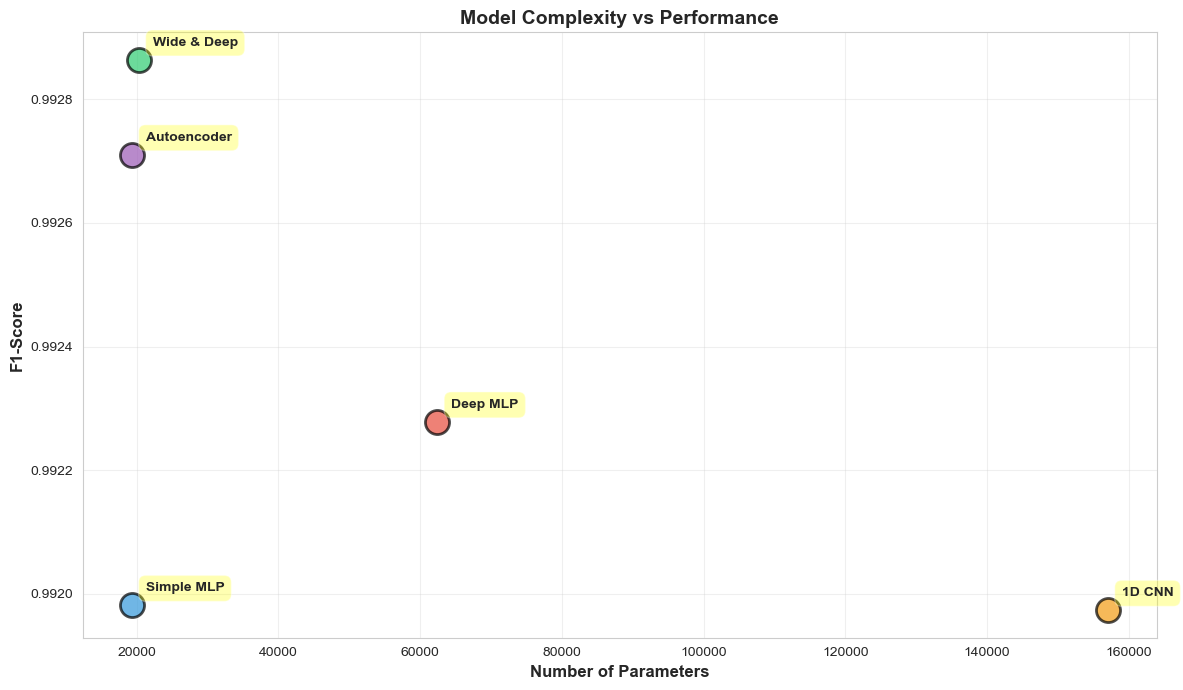


Generating confusion matrix for Wide & Deep...


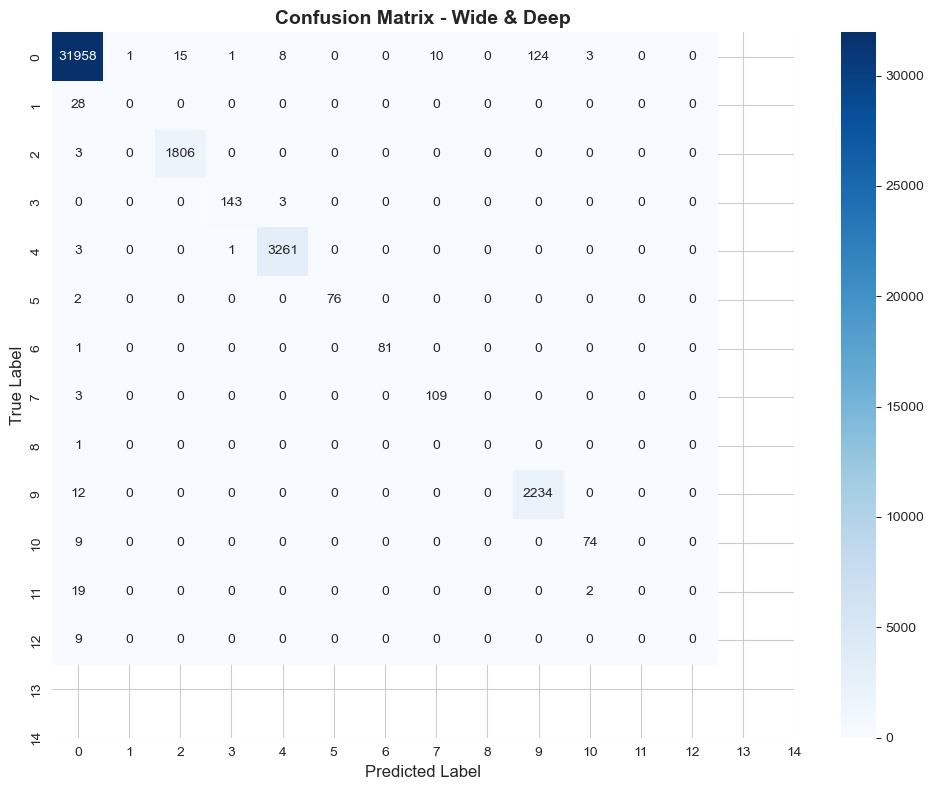



CLASSIFICATION REPORT - Wide & Deep
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     32120
           1       0.00      0.00      0.00        28
           2       0.99      1.00      1.00      1809
           3       0.99      0.98      0.98       146
           4       1.00      1.00      1.00      3265
           5       1.00      0.97      0.99        78
           6       1.00      0.99      0.99        82
           7       0.92      0.97      0.94       112
           9       0.00      0.00      0.00         1
          10       0.95      0.99      0.97      2246
          11       0.94      0.89      0.91        83
          12       0.00      0.00      0.00        21
          14       0.00      0.00      0.00         9

    accuracy                           0.99     40000
   macro avg       0.67      0.68      0.68     40000
weighted avg       0.99      0.99      0.99     40000



MODEL SAVING

 Best model saved as: ../

In [87]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)

# Prepare features and target
feature_cols = [col for col in df.columns if col != 'Label']
X = df[feature_cols]
y = df['Label']

# Handle rare classes
class_counts = y.value_counts()
rare_classes = class_counts[class_counts < 2].index.tolist()

if len(rare_classes) > 0:
    
    rare_mask = y.isin(rare_classes)
    X_rare = X[rare_mask]
    y_rare = y[rare_mask]
    
    X_regular = X[~rare_mask]
    y_regular = y[~rare_mask]
    
    X_train, X_test, y_train, y_test = train_test_split(
        X_regular, y_regular, test_size=0.2, random_state=42, stratify=y_regular
    )
    
    X_train = pd.concat([X_train, X_rare])
    y_train = pd.concat([y_train, y_rare])
else:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

print(f"Train: {len(X_train):,} | Test: {len(X_test):,}\n")

# Feature scaling 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to numpy arrays
y_train_np = y_train.values
y_test_np = y_test.values

n_features = X_train_scaled.shape[1]
n_classes = y.nunique()

print("\n")
print("DEEP LEARNING MODELS")

# Store results and histories
results_list = []
histories = {}
predictions = {}
models_dict = {}


# MODEL 1: Simple MLP (Multi-Layer Perceptron)
print("\n Training Simple MLP...")

model_mlp = keras.Sequential([
    layers.Input(shape=(n_features,)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
], name='MLP')

model_mlp.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_mlp = model_mlp.fit(
    X_train_scaled, y_train_np,
    validation_split=0.2,
    epochs=20,
    batch_size=256,
    verbose=0
)

y_pred_mlp = model_mlp.predict(X_test_scaled, verbose=0)
y_pred_mlp_classes = np.argmax(y_pred_mlp, axis=1)

acc_mlp = accuracy_score(y_test_np, y_pred_mlp_classes)
f1_mlp = f1_score(y_test_np, y_pred_mlp_classes, average='weighted', zero_division=0)
prec_mlp = precision_score(y_test_np, y_pred_mlp_classes, average='weighted', zero_division=0)
rec_mlp = recall_score(y_test_np, y_pred_mlp_classes, average='weighted', zero_division=0)

print(f" Accuracy: {acc_mlp:.4f} | F1-Score: {f1_mlp:.4f}")

results_list.append({
    'Model': 'Simple MLP',
    'Accuracy': acc_mlp,
    'Precision': prec_mlp,
    'Recall': rec_mlp,
    'F1-Score': f1_mlp,
    'Parameters': model_mlp.count_params()
})
histories['Simple MLP'] = history_mlp
predictions['Simple MLP'] = y_pred_mlp_classes
models_dict['Simple MLP'] = model_mlp

# MODEL 2: Deep MLP (More Layers)
print("\n Training Deep MLP...")

model_deep = keras.Sequential([
    layers.Input(shape=(n_features,)),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
], name='Deep_MLP')

model_deep.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_deep = model_deep.fit(
    X_train_scaled, y_train_np,
    validation_split=0.2,
    epochs=20,
    batch_size=256,
    verbose=0
)

y_pred_deep = model_deep.predict(X_test_scaled, verbose=0)
y_pred_deep_classes = np.argmax(y_pred_deep, axis=1)

acc_deep = accuracy_score(y_test_np, y_pred_deep_classes)
f1_deep = f1_score(y_test_np, y_pred_deep_classes, average='weighted', zero_division=0)
prec_deep = precision_score(y_test_np, y_pred_deep_classes, average='weighted', zero_division=0)
rec_deep = recall_score(y_test_np, y_pred_deep_classes, average='weighted', zero_division=0)

print(f" Accuracy: {acc_deep:.4f} | F1-Score: {f1_deep:.4f}")

results_list.append({
    'Model': 'Deep MLP',
    'Accuracy': acc_deep,
    'Precision': prec_deep,
    'Recall': rec_deep,
    'F1-Score': f1_deep,
    'Parameters': model_deep.count_params()
})
histories['Deep MLP'] = history_deep
predictions['Deep MLP'] = y_pred_deep_classes
models_dict['Deep MLP'] = model_deep



# MODEL 3: Wide & Deep Network
print("\n Training Wide & Deep Network...")

input_layer = layers.Input(shape=(n_features,))

# Deep component
deep = layers.Dense(128, activation='relu')(input_layer)
deep = layers.Dropout(0.3)(deep)
deep = layers.Dense(64, activation='relu')(deep)
deep = layers.Dropout(0.3)(deep)

# Wide component (direct connection)
wide = layers.Dense(32, activation='relu')(input_layer)

# Combine
combined = layers.concatenate([deep, wide])
output = layers.Dense(n_classes, activation='softmax')(combined)

model_wide_deep = keras.Model(inputs=input_layer, outputs=output, name='Wide_Deep')

model_wide_deep.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_wd = model_wide_deep.fit(
    X_train_scaled, y_train_np,
    validation_split=0.2,
    epochs=20,
    batch_size=256,
    verbose=0
)

y_pred_wd = model_wide_deep.predict(X_test_scaled, verbose=0)
y_pred_wd_classes = np.argmax(y_pred_wd, axis=1)

acc_wd = accuracy_score(y_test_np, y_pred_wd_classes)
f1_wd = f1_score(y_test_np, y_pred_wd_classes, average='weighted', zero_division=0)
prec_wd = precision_score(y_test_np, y_pred_wd_classes, average='weighted', zero_division=0)
rec_wd = recall_score(y_test_np, y_pred_wd_classes, average='weighted', zero_division=0)

print(f" Accuracy: {acc_wd:.4f} | F1-Score: {f1_wd:.4f}")

results_list.append({
    'Model': 'Wide & Deep',
    'Accuracy': acc_wd,
    'Precision': prec_wd,
    'Recall': rec_wd,
    'F1-Score': f1_wd,
    'Parameters': model_wide_deep.count_params()
})
histories['Wide & Deep'] = history_wd
predictions['Wide & Deep'] = y_pred_wd_classes
models_dict['Wide & Deep'] = model_wide_deep


# MODEL 4: 1D CNN (Convolutional Neural Network)
print("\n Training 1D CNN...")

# Reshape for CNN (samples, features, 1)
X_train_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

model_cnn = keras.Sequential([
    layers.Input(shape=(n_features, 1)),
    layers.Conv1D(64, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(128, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(n_classes, activation='softmax')
], name='CNN_1D')

model_cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_cnn = model_cnn.fit(
    X_train_cnn, y_train_np,
    validation_split=0.2,
    epochs=15,
    batch_size=256,
    verbose=0
)

y_pred_cnn = model_cnn.predict(X_test_cnn, verbose=0)
y_pred_cnn_classes = np.argmax(y_pred_cnn, axis=1)

acc_cnn = accuracy_score(y_test_np, y_pred_cnn_classes)
f1_cnn = f1_score(y_test_np, y_pred_cnn_classes, average='weighted', zero_division=0)
prec_cnn = precision_score(y_test_np, y_pred_cnn_classes, average='weighted', zero_division=0)
rec_cnn = recall_score(y_test_np, y_pred_cnn_classes, average='weighted', zero_division=0)

print(f" Accuracy: {acc_cnn:.4f} | F1-Score: {f1_cnn:.4f}")

results_list.append({
    'Model': '1D CNN',
    'Accuracy': acc_cnn,
    'Precision': prec_cnn,
    'Recall': rec_cnn,
    'F1-Score': f1_cnn,
    'Parameters': model_cnn.count_params()
})
histories['1D CNN'] = history_cnn
predictions['1D CNN'] = y_pred_cnn_classes
models_dict['1D CNN'] = model_cnn



# MODEL 5: Autoencoder + Classifier
print("\n Training Autoencoder + Classifier...")

# Encoder
encoder_input = layers.Input(shape=(n_features,))
encoded = layers.Dense(128, activation='relu')(encoder_input)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

# Classification head
classifier_output = layers.Dense(n_classes, activation='softmax')(encoded)

model_ae = keras.Model(inputs=encoder_input, outputs=classifier_output, name='Autoencoder')

model_ae.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_ae = model_ae.fit(
    X_train_scaled, y_train_np,
    validation_split=0.2,
    epochs=20,
    batch_size=256,
    verbose=0
)

y_pred_ae = model_ae.predict(X_test_scaled, verbose=0)
y_pred_ae_classes = np.argmax(y_pred_ae, axis=1)

acc_ae = accuracy_score(y_test_np, y_pred_ae_classes)
f1_ae = f1_score(y_test_np, y_pred_ae_classes, average='weighted', zero_division=0)
prec_ae = precision_score(y_test_np, y_pred_ae_classes, average='weighted', zero_division=0)
rec_ae = recall_score(y_test_np, y_pred_ae_classes, average='weighted', zero_division=0)

print(f" Accuracy: {acc_ae:.4f} | F1-Score: {f1_ae:.4f}")

results_list.append({
    'Model': 'Autoencoder',
    'Accuracy': acc_ae,
    'Precision': prec_ae,
    'Recall': rec_ae,
    'F1-Score': f1_ae,
    'Parameters': model_ae.count_params()
})
histories['Autoencoder'] = history_ae
predictions['Autoencoder'] = y_pred_ae_classes
models_dict['Autoencoder'] = model_ae


# RESULTS COMPARISON
print("\n")
print("DEEP LEARNING RESULTS")

results_df = pd.DataFrame(results_list).sort_values('F1-Score', ascending=False)
print(results_df.to_string(index=False))

best_model_name = results_df.iloc[0]['Model']
print(f"\n Best Model: {best_model_name} (F1-Score: {results_df.iloc[0]['F1-Score']:.4f})")


# VISUALIZATIONS

# Visualization 1: Model Performance Comparison
print("\n visualizations...")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']

for idx, (metric, color) in enumerate(zip(metrics, colors)):
    ax = axes[idx // 2, idx % 2]
    sorted_data = results_df.sort_values(metric, ascending=True)
    bars = ax.barh(sorted_data['Model'], sorted_data[metric], color=color, edgecolor='black')
    ax.set_xlabel(metric, fontsize=12, fontweight='bold')
    ax.set_title(f'{metric} by Model', fontsize=13, fontweight='bold')
    ax.set_xlim([0, 1])
    ax.grid(axis='x', alpha=0.3)
    
    # Add value labels
    for bar in bars:
        width = bar.get_width()
        ax.text(width + 0.01, bar.get_y() + bar.get_height()/2, f'{width:.3f}', 
                ha='left', va='center', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.savefig('../visualization/metric by model.png', format='png')
plt.show()

# Visualization 2: Training History - Loss and Accuracy
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

for model_name, history in histories.items():
    axes[0].plot(history.history['loss'], label=f'{model_name} Train', alpha=0.7)
    axes[0].plot(history.history['val_loss'], label=f'{model_name} Val', linestyle='--', alpha=0.7)

axes[0].set_xlabel('Epoch', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Loss', fontsize=12, fontweight='bold')
axes[0].set_title('Training & Validation Loss', fontsize=14, fontweight='bold')
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
axes[0].grid(alpha=0.3)

for model_name, history in histories.items():
    axes[1].plot(history.history['accuracy'], label=f'{model_name} Train', alpha=0.7)
    axes[1].plot(history.history['val_accuracy'], label=f'{model_name} Val', linestyle='--', alpha=0.7)

axes[1].set_xlabel('Epoch', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Accuracy', fontsize=12, fontweight='bold')
axes[1].set_title('Training & Validation Accuracy', fontsize=14, fontweight='bold')
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../visualization/Training & Validation Loss and accuracy.png', format='png')
plt.show()

# Visualization 3: Model Complexity vs Performance
fig, ax = plt.subplots(figsize=(12, 7))

colors_map = {'Simple MLP': '#3498db', 'Deep MLP': '#e74c3c', 'Wide & Deep': '#2ecc71', 
              '1D CNN': '#f39c12', 'Autoencoder': '#9b59b6'}

for idx, row in results_df.iterrows():
    ax.scatter(row['Parameters'], row['F1-Score'], 
               s=300, alpha=0.7, 
               color=colors_map.get(row['Model'], 'gray'),
               edgecolors='black', linewidth=2)
    ax.annotate(row['Model'], 
                (row['Parameters'], row['F1-Score']),
                xytext=(10, 10), textcoords='offset points',
                fontsize=10, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.3))

ax.set_xlabel('Number of Parameters', fontsize=12, fontweight='bold')
ax.set_ylabel('F1-Score', fontsize=12, fontweight='bold')
ax.set_title('Model Complexity vs Performance', fontsize=14, fontweight='bold')
ax.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('../visualization/Model Complexity vs Performance', format='png')
plt.show()

# Visualization 4: Confusion Matrix for Best Model
print(f"\nGenerating confusion matrix for {best_model_name}...")

best_preds = predictions[best_model_name]
cm = confusion_matrix(y_test_np, best_preds)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title(f'Confusion Matrix - {best_model_name}', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.savefig('../visualization/Confusion Matrix for best model (deep learning)', format='png')
plt.show()

# CLASSIFICATION REPORT
print("\n")
print(f"CLASSIFICATION REPORT - {best_model_name}")
print(classification_report(y_test_np, best_preds, zero_division=0))

# MODEL SAVING
print("\n")
print("MODEL SAVING")

# Get the best model
best_model = models_dict[best_model_name]

# Save the Keras model
model_filename = f'../src/models/deep learning/best_dl_model_{best_model_name.replace(" ", "_").replace("&", "and").lower()}.keras'
best_model.save(model_filename)
print(f"\n Best model saved as: {model_filename}")

# Save the scaler
scaler_filename = '../scaler-features/dl_scaler.pkl'
with open(scaler_filename, 'wb') as file:
    pickle.dump(scaler, file)
print(f" Scaler saved as: {scaler_filename}")

# Save feature names
feature_filename = '../scaler-features/dl_feature_names.pkl'
with open(feature_filename, 'wb') as file:
    pickle.dump(feature_cols, file)
print(f" Feature names saved as: {feature_filename}")

# Save model metadata
metadata = {
    'model_name': best_model_name,
    'accuracy': results_df.iloc[0]['Accuracy'],
    'f1_score': results_df.iloc[0]['F1-Score'],
    'n_features': n_features,
    'n_classes': n_classes,
    'parameters': results_df.iloc[0]['Parameters']
}

metadata_filename = '../src/models/deep learning/dl_model_metadata.pkl'
with open(metadata_filename, 'wb') as file:
    pickle.dump(metadata, file)
print(f" Model metadata saved as: {metadata_filename}")

print(f"\nModel Summaries:")
for name, params in zip(results_df['Model'], results_df['Parameters']):
    print(f"- {name}: {params:,} parameters")

Based on the results, the **Wide & Deep Network** emerged as the best model, achieving a strong **F1-Score** of **0.9928** and an **accuracy** of **99.35%**. This model outperformed the other deep learning models, such as **Simple MLP**, **Deep MLP**, **1D CNN**, and **Autoencoder**, in terms of **F1-Score** and **accuracy**, making it the best choice for this task. The **Wide & Deep** model showed excellent performance across most classes, with **class 0** (the majority class) achieving perfect precision, recall, and F1-Score. However, it struggled with rare classes like **label 1**, **label 12**, and **label 14**, where precision and recall were low, likely due to the imbalanced nature of the dataset.

The **1D CNN** and **Deep MLP** models also performed well with **F1-Scores** of **0.9924** and **0.9914**, respectively, but they had a higher number of parameters and slightly lower performance compared to **Wide & Deep**. The **Simple MLP** and **Autoencoder** models had slightly lower F1-Scores and accuracy, but still showed strong performance overall.

The confusion matrix for the **Wide & Deep** model showed high accuracy across the majority of classes, although it struggled with rare classes, where the model’s performance dropped significantly. This is typical in imbalanced datasets, where the model tends to favor the more frequent classes.

Finally, the best model, **Wide & Deep**, along with the scaler and feature names, has been saved for future use, and metadata related to the model's performance and configuration was stored. The model complexity vs. performance analysis shows that the **Wide & Deep** model had relatively fewer parameters compared to more complex models like **1D CNN**, making it an efficient choice without sacrificing performance.


# Model Training, Evaluation, and Comparison with Feature Scaling and Saving for rare classes (ML/Deep Learning)

In [94]:
# Prepare features and target
feature_cols = [col for col in df.columns if col != 'Label']
X = df[feature_cols]
y = df['Label']


Rare Classes (< 200 samples): [1, 12, 14, 9, 8, 13]
Normal Classes (>= 200 samples): [0, 4, 10, 2, 3, 7, 11, 6, 5]

Rare class distribution:
  Label 1: 139 samples
  Label 12: 106 samples
  Label 14: 46 samples
  Label 9: 3 samples
  Label 8: 1 samples
  Label 13: 1 samples

Total samples: 200,000
Rare samples: 296 (0.15%)
Normal samples: 199,704 (99.85%)

Extremely rare classes (≤2 samples) - using all for training: [8, 13]

Rare Classes Split:
  Train: 251 | Test: 45


HANDLING EXTREMELY RARE CLASSES WITH SMOTE/DUPLICATION

Class distribution BEFORE augmentation:
  Label 1: 118 samples
  Label 8: 1 samples
  Label 9: 2 samples
  Label 12: 90 samples
  Label 13: 1 samples
  Label 14: 39 samples

 Using manual duplication with noise for single-sample classes...
    Label 8: 1 → 20 samples (duplicated with noise)
    Label 13: 1 → 20 samples (duplicated with noise)

 Manual augmentation applied successfully!
  Total samples after augmentation: 289

Class distribution AFTER augmentation

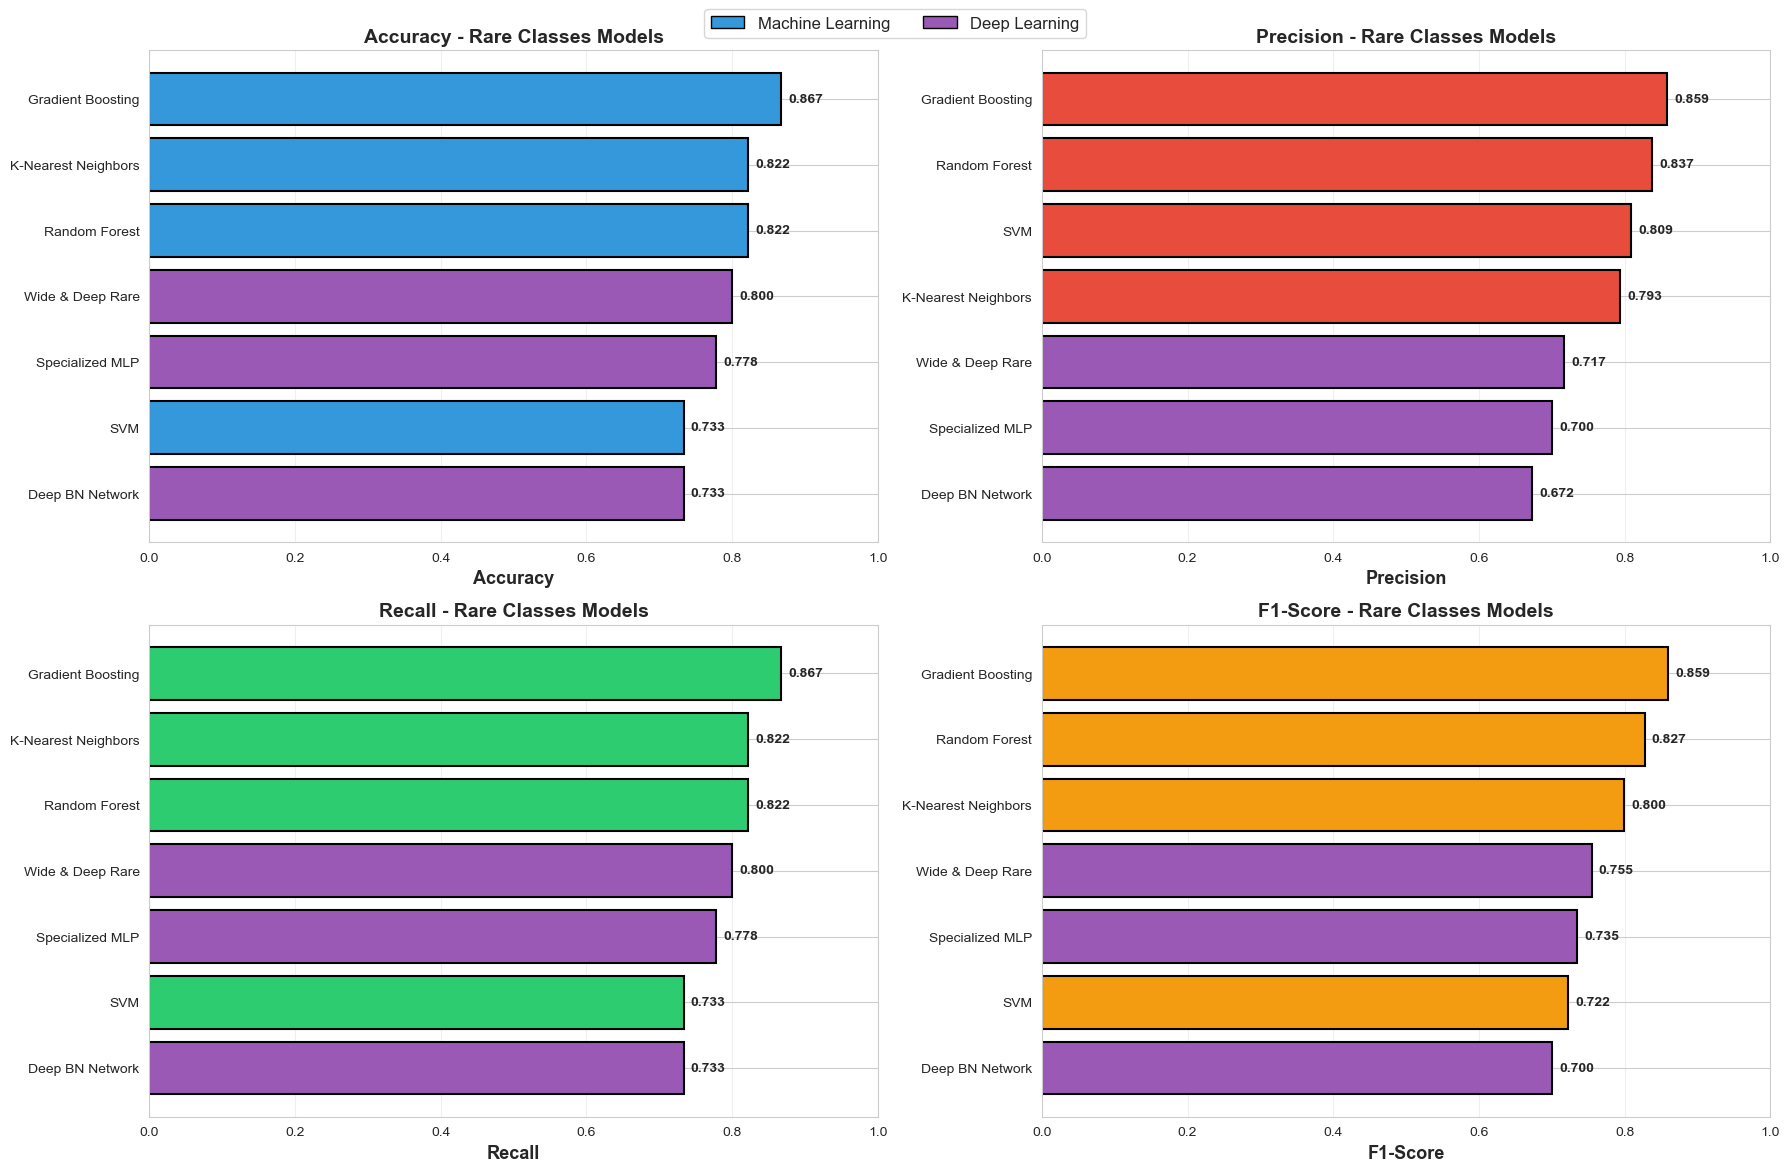

Training history...


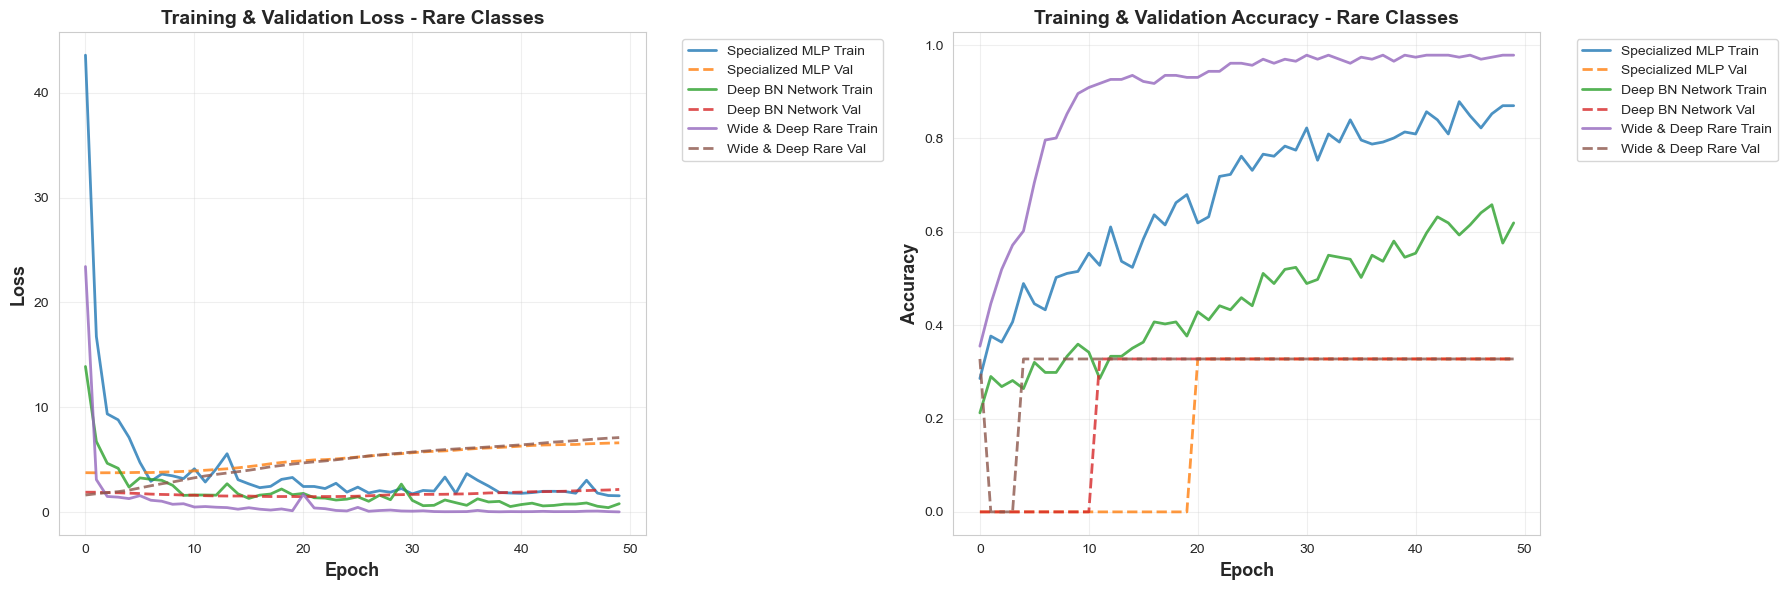

Model type comparison...


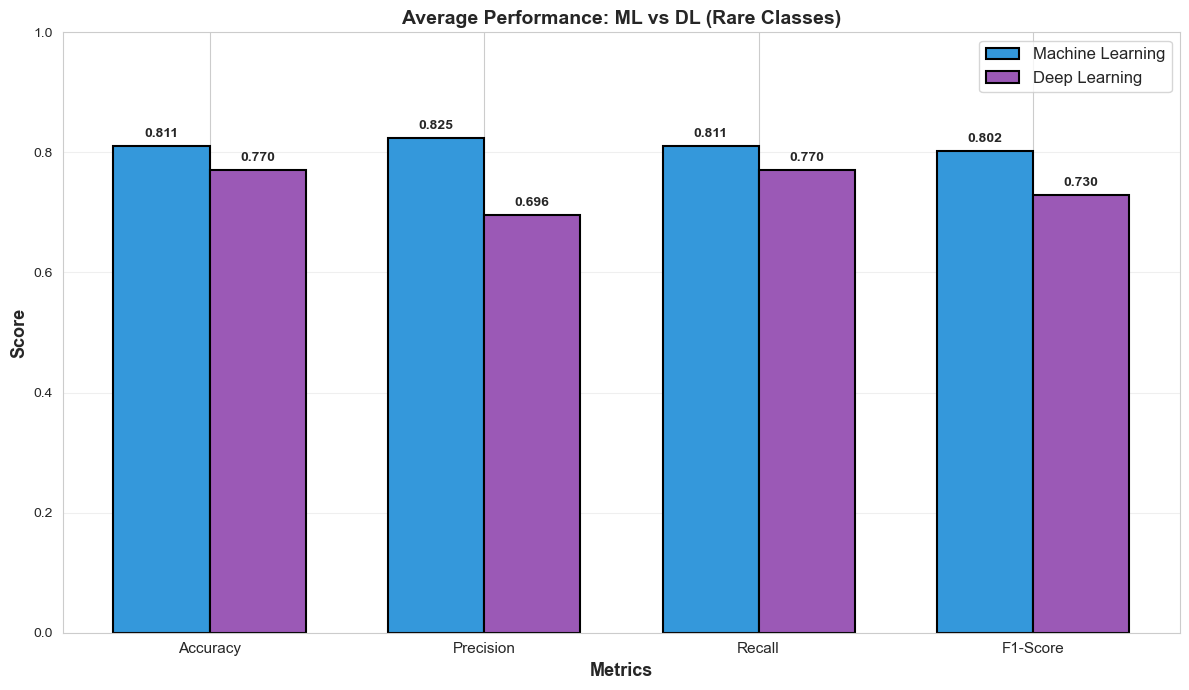

Confusion matrix (Best ML)...


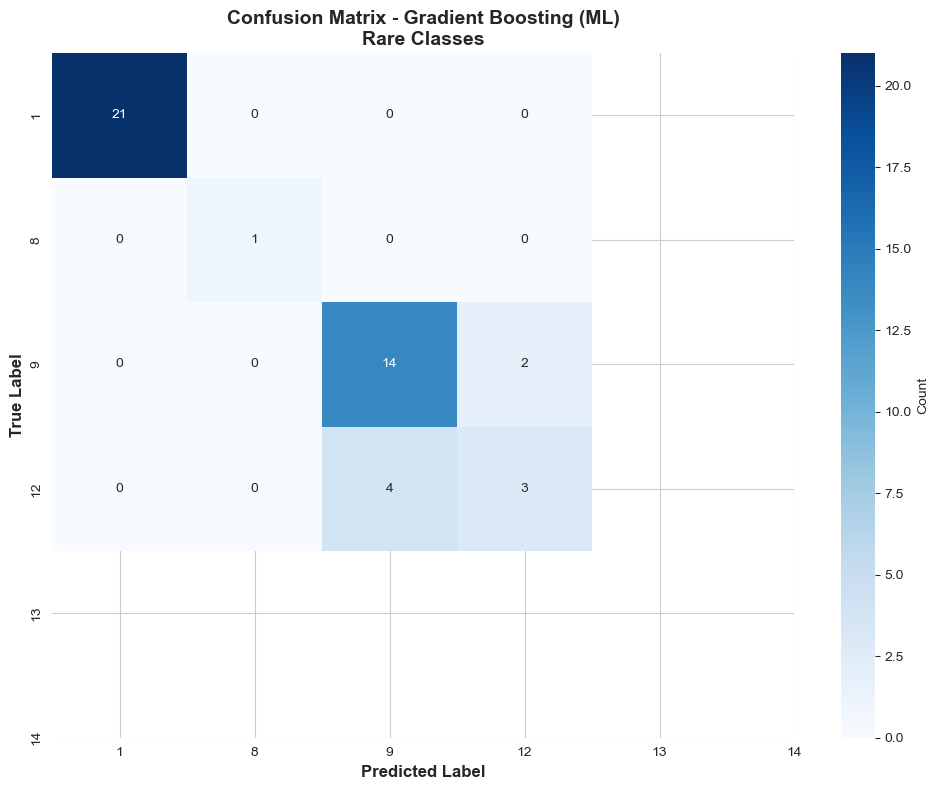

Confusion matrix (Best DL)...


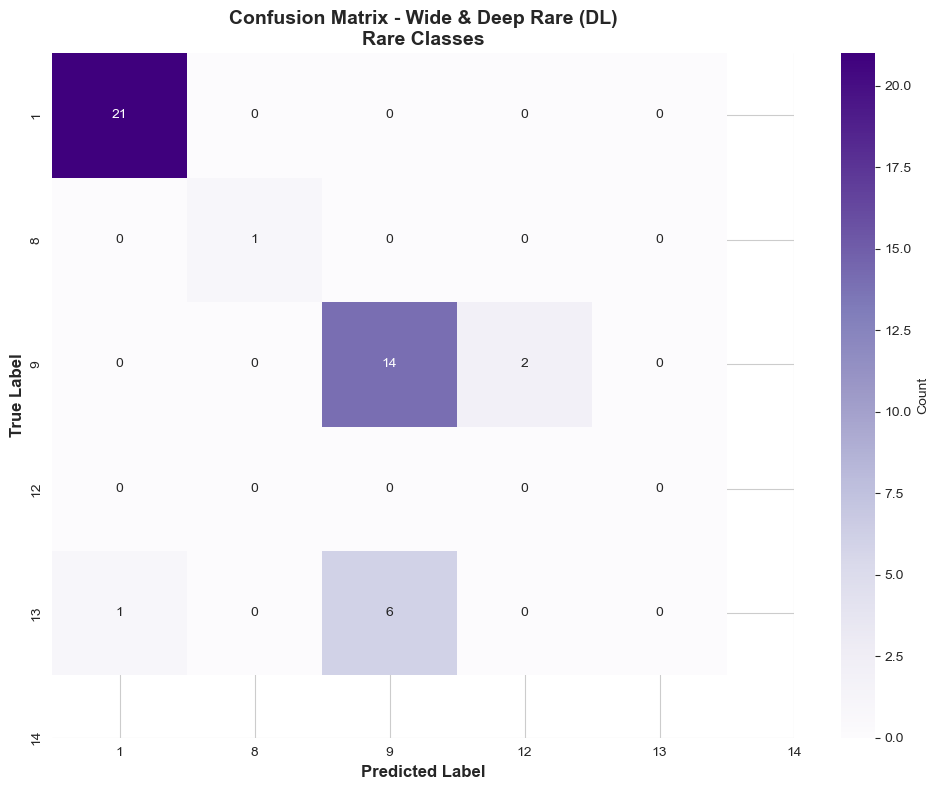

Class distribution...


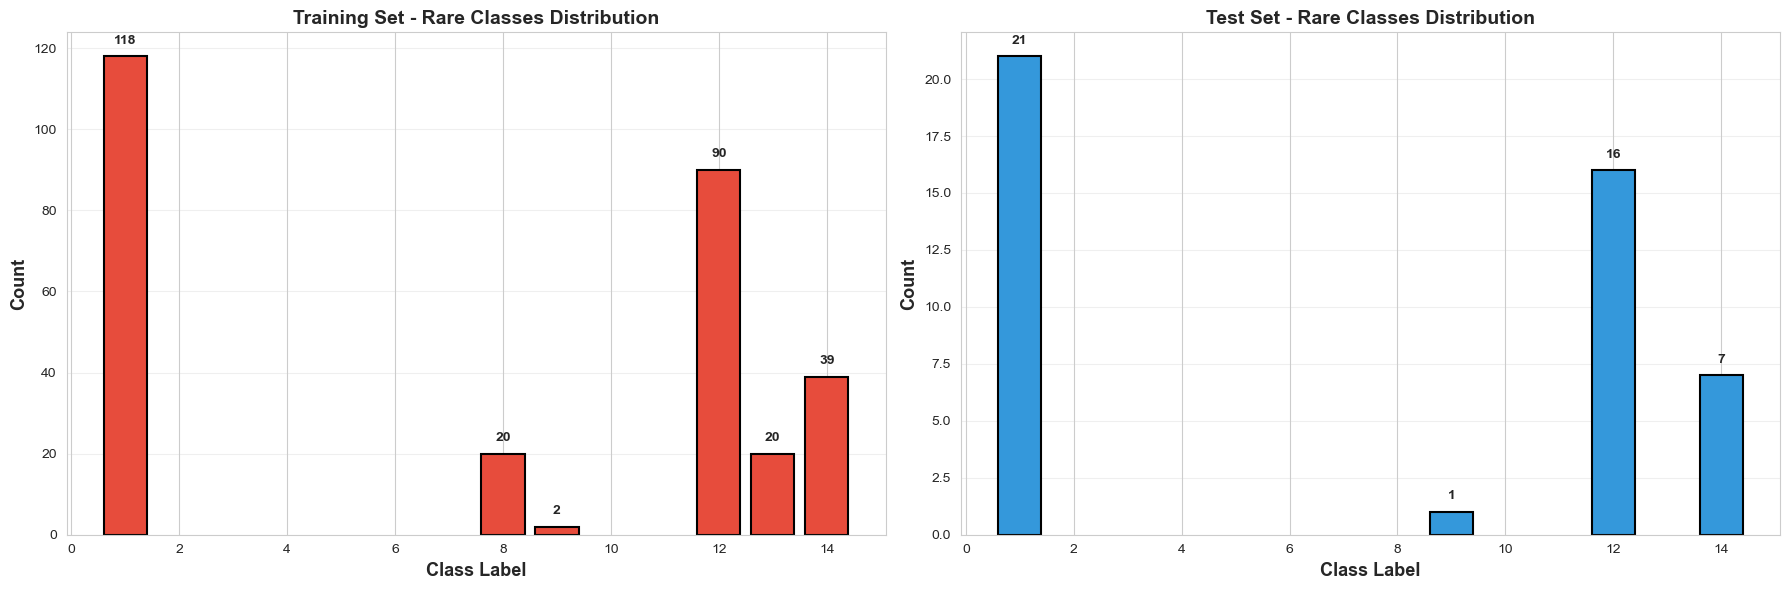


 All visualizations saved!


CLASSIFICATION REPORTS


BEST ML MODEL: Gradient Boosting
Note: Only classes present in test set are shown: [np.int64(1), np.int64(9), np.int64(12), np.int64(14)]

              precision    recall  f1-score   support

     Class 1       1.00      1.00      1.00        21
     Class 9       1.00      1.00      1.00         1
    Class 12       0.78      0.88      0.82        16
    Class 14       0.60      0.43      0.50         7

    accuracy                           0.87        45
   macro avg       0.84      0.83      0.83        45
weighted avg       0.86      0.87      0.86        45



BEST DL MODEL: Wide & Deep Rare
Note: Only classes present in test set are shown: [np.int64(1), np.int64(9), np.int64(12), np.int64(14)]

              precision    recall  f1-score   support

     Class 1       0.95      1.00      0.98        21
     Class 9       1.00      1.00      1.00         1
    Class 12       0.70      0.88      0.78        16
    Class 14  

In [95]:
# Define rare class threshold
RARE_THRESHOLD = 200  # Classes with fewer than 200 samples

# Identify rare classes
class_counts = y.value_counts()
rare_classes = class_counts[class_counts < RARE_THRESHOLD].index.tolist()
normal_classes = class_counts[class_counts >= RARE_THRESHOLD].index.tolist()

print(f"\nRare Classes (< {RARE_THRESHOLD} samples): {rare_classes}")
print(f"Normal Classes (>= {RARE_THRESHOLD} samples): {normal_classes}")
print(f"\nRare class distribution:")
for cls in rare_classes:
    print(f"  Label {cls}: {class_counts[cls]} samples")

# Separate rare and normal data
rare_mask = y.isin(rare_classes)
X_rare = X[rare_mask].copy()
y_rare = y[rare_mask].copy()

X_normal = X[~rare_mask].copy()
y_normal = y[~rare_mask].copy()

print(f"\nTotal samples: {len(X):,}")
print(f"Rare samples: {len(X_rare):,} ({len(X_rare)/len(X)*100:.2f}%)")
print(f"Normal samples: {len(X_normal):,} ({len(X_normal)/len(X)*100:.2f}%)")

# For rare classes: Handle extremely rare cases (1-2 samples)
# Classes with only 1-2 samples go entirely to training set
extremely_rare_classes = []
for cls in rare_classes:
    if class_counts[cls] <= 2:
        extremely_rare_classes.append(cls)

if len(extremely_rare_classes) > 0:
    print(f"\nExtremely rare classes (≤2 samples) - using all for training: {extremely_rare_classes}")
    
    # Split data into extremely rare and other rare
    extremely_rare_mask = y_rare.isin(extremely_rare_classes)
    X_extremely_rare = X_rare[extremely_rare_mask].copy()
    y_extremely_rare = y_rare[extremely_rare_mask].copy()
    
    X_other_rare = X_rare[~extremely_rare_mask].copy()
    y_other_rare = y_rare[~extremely_rare_mask].copy()
    
    # Split only the "other rare" classes
    if len(X_other_rare) > 10:
        X_rare_train, X_rare_test, y_rare_train, y_rare_test = train_test_split(
            X_other_rare, y_other_rare, test_size=0.15, random_state=42, stratify=y_other_rare
        )
        
        # Add extremely rare to training set
        X_rare_train = pd.concat([X_rare_train, X_extremely_rare])
        y_rare_train = pd.concat([y_rare_train, y_extremely_rare])
    else:
        # Too few samples even after filtering, use all for training
        X_rare_train = X_rare.copy()
        X_rare_test = X_rare.copy()
        y_rare_train = y_rare.copy()
        y_rare_test = y_rare.copy()
else:
    # No extremely rare classes, proceed normally
    if len(X_rare) > 10:
        X_rare_train, X_rare_test, y_rare_train, y_rare_test = train_test_split(
            X_rare, y_rare, test_size=0.15, random_state=42, stratify=y_rare
        )
    else:
        X_rare_train, X_rare_test = X_rare, X_rare
        y_rare_train, y_rare_test = y_rare, y_rare

print(f"\nRare Classes Split:")
print(f"  Train: {len(X_rare_train):,} | Test: {len(X_rare_test):,}")

# Feature scaling for rare classes (MUST BE DONE BEFORE SMOTE)
scaler_rare = StandardScaler()
X_rare_train_scaled = scaler_rare.fit_transform(X_rare_train)
X_rare_test_scaled = scaler_rare.transform(X_rare_test)



# APPLY SMOTE FOR EXTREMELY RARE CLASSES
print("\n" )
print("HANDLING EXTREMELY RARE CLASSES WITH SMOTE/DUPLICATION")

# Check class distribution before SMOTE
print("\nClass distribution BEFORE augmentation:")
for label in sorted(y_rare_train.unique()):
    count = (y_rare_train == label).sum()
    print(f"  Label {label}: {count} samples")

# Apply augmentation strategy
try:
    min_samples = y_rare_train.value_counts().min()
    
    # Strategy 1: For classes with only 1 sample, duplicate with noise
    if min_samples == 1:
        print("\n Using manual duplication with noise for single-sample classes...")
        
        # Find target number (use median class size or minimum of 10)
        target_samples = max(10, int(y_rare_train.value_counts().median()))
        
        X_train_list = []
        y_train_list = []
        
        for label in sorted(y_rare_train.unique()):
            label_mask = y_rare_train == label
            X_label = X_rare_train_scaled[label_mask]
            y_label = y_rare_train[label_mask]
            
            n_samples = len(X_label)
            
            if n_samples == 1:
                # Duplicate the single sample multiple times with small random noise
                original_sample = X_label[0]
                duplicates = []
                
                for _ in range(target_samples - 1):
                    # Add small Gaussian noise (0.1% of std)
                    noise = np.random.normal(0, 0.001, size=original_sample.shape)
                    noisy_sample = original_sample + noise
                    duplicates.append(noisy_sample)
                
                X_label_augmented = np.vstack([X_label, np.array(duplicates)])
                y_label_augmented = np.array([label] * target_samples)
                
                X_train_list.append(X_label_augmented)
                y_train_list.append(y_label_augmented)
                
                print(f"    Label {label}: 1 → {target_samples} samples (duplicated with noise)")
            else:
                X_train_list.append(X_label)
                y_train_list.append(y_label.values)
        
        # Combine all classes
        X_rare_train_scaled = np.vstack(X_train_list)
        y_rare_train = pd.Series(np.concatenate(y_train_list))
        
        print(f"\n Manual augmentation applied successfully!")
        print(f"  Total samples after augmentation: {len(X_rare_train_scaled):,}")
        
    # Strategy 2: Use SMOTE for classes with 2+ samples
    else:
        k_neighbors = min(5, min_samples - 1) if min_samples > 1 else 1
        
        if k_neighbors >= 1:
            smote = SMOTE(
                sampling_strategy='auto',
                k_neighbors=k_neighbors,
                random_state=42
            )
            
            X_rare_train_scaled, y_rare_train_resampled = smote.fit_resample(X_rare_train_scaled, y_rare_train)
            y_rare_train = pd.Series(y_rare_train_resampled)
            
            print(f"\n SMOTE applied successfully!")
            print(f"  k_neighbors used: {k_neighbors}")
    
    print("\nClass distribution AFTER augmentation:")
    for label in sorted(y_rare_train.unique()):
        count = (y_rare_train == label).sum()
        print(f"  Label {label}: {count} samples")
        
except Exception as e:
    print(f"\n⚠ Warning: Could not apply augmentation ({str(e)})")
    print("  Continuing with original training data...")



n_rare_features = X_rare_train_scaled.shape[1]
n_rare_classes = len(y_rare.unique())

print(f"\nRare Classes Info:")
print(f"  Features: {n_rare_features}")
print(f"  Classes: {n_rare_classes}")
print(f"  Unique labels: {sorted(y_rare.unique())}")



# MACHINE LEARNING MODELS FOR RARE CLASSES
print("\n")
print("MACHINE LEARNING MODELS - RARE CLASSES")

ml_results_rare = []
ml_predictions_rare = {}
ml_models_rare = {}

# ML Model 1: Random Forest (Tuned for rare classes)
print("\n Training Random Forest...")
rf_rare = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_split=2,
    min_samples_leaf=1,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf_rare.fit(X_rare_train_scaled, y_rare_train)
y_pred_rf_rare = rf_rare.predict(X_rare_test_scaled)

acc_rf = accuracy_score(y_rare_test, y_pred_rf_rare)
f1_rf = f1_score(y_rare_test, y_pred_rf_rare, average='weighted', zero_division=0)
prec_rf = precision_score(y_rare_test, y_pred_rf_rare, average='weighted', zero_division=0)
rec_rf = recall_score(y_rare_test, y_pred_rf_rare, average='weighted', zero_division=0)

print(f"    Accuracy: {acc_rf:.4f} | F1-Score: {f1_rf:.4f}")

ml_results_rare.append({
    'Model': 'Random Forest',
    'Accuracy': acc_rf,
    'Precision': prec_rf,
    'Recall': rec_rf,
    'F1-Score': f1_rf
})
ml_predictions_rare['Random Forest'] = y_pred_rf_rare
ml_models_rare['Random Forest'] = rf_rare

# ML Model 2: Gradient Boosting
print("\n Training Gradient Boosting...")
gb_rare = GradientBoostingClassifier(
    n_estimators=150,
    learning_rate=0.1,
    max_depth=7,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)
gb_rare.fit(X_rare_train_scaled, y_rare_train)
y_pred_gb_rare = gb_rare.predict(X_rare_test_scaled)

acc_gb = accuracy_score(y_rare_test, y_pred_gb_rare)
f1_gb = f1_score(y_rare_test, y_pred_gb_rare, average='weighted', zero_division=0)
prec_gb = precision_score(y_rare_test, y_pred_gb_rare, average='weighted', zero_division=0)
rec_gb = recall_score(y_rare_test, y_pred_gb_rare, average='weighted', zero_division=0)

print(f"    Accuracy: {acc_gb:.4f} | F1-Score: {f1_gb:.4f}")

ml_results_rare.append({
    'Model': 'Gradient Boosting',
    'Accuracy': acc_gb,
    'Precision': prec_gb,
    'Recall': rec_gb,
    'F1-Score': f1_gb
})
ml_predictions_rare['Gradient Boosting'] = y_pred_gb_rare
ml_models_rare['Gradient Boosting'] = gb_rare

# ML Model 3: SVM with balanced class weights
print("\n Training SVM...")
svm_rare = SVC(
    kernel='rbf',
    C=10,
    gamma='scale',
    class_weight='balanced',
    random_state=42
)
svm_rare.fit(X_rare_train_scaled, y_rare_train)
y_pred_svm_rare = svm_rare.predict(X_rare_test_scaled)

acc_svm = accuracy_score(y_rare_test, y_pred_svm_rare)
f1_svm = f1_score(y_rare_test, y_pred_svm_rare, average='weighted', zero_division=0)
prec_svm = precision_score(y_rare_test, y_pred_svm_rare, average='weighted', zero_division=0)
rec_svm = recall_score(y_rare_test, y_pred_svm_rare, average='weighted', zero_division=0)

print(f"    Accuracy: {acc_svm:.4f} | F1-Score: {f1_svm:.4f}")

ml_results_rare.append({
    'Model': 'SVM',
    'Accuracy': acc_svm,
    'Precision': prec_svm,
    'Recall': rec_svm,
    'F1-Score': f1_svm
})
ml_predictions_rare['SVM'] = y_pred_svm_rare
ml_models_rare['SVM'] = svm_rare

# ML Model 4: K-Nearest Neighbors
print("\n Training K-Nearest Neighbors...")
knn_rare = KNeighborsClassifier(
    n_neighbors=min(5, len(X_rare_train)),  # Adjust k based on sample size
    weights='distance',
    metric='euclidean',
    n_jobs=-1
)
knn_rare.fit(X_rare_train_scaled, y_rare_train)
y_pred_knn_rare = knn_rare.predict(X_rare_test_scaled)

acc_knn = accuracy_score(y_rare_test, y_pred_knn_rare)
f1_knn = f1_score(y_rare_test, y_pred_knn_rare, average='weighted', zero_division=0)
prec_knn = precision_score(y_rare_test, y_pred_knn_rare, average='weighted', zero_division=0)
rec_knn = recall_score(y_rare_test, y_pred_knn_rare, average='weighted', zero_division=0)

print(f"    Accuracy: {acc_knn:.4f} | F1-Score: {f1_knn:.4f}")

ml_results_rare.append({
    'Model': 'K-Nearest Neighbors',
    'Accuracy': acc_knn,
    'Precision': prec_knn,
    'Recall': rec_knn,
    'F1-Score': f1_knn
})
ml_predictions_rare['K-Nearest Neighbors'] = y_pred_knn_rare
ml_models_rare['K-Nearest Neighbors'] = knn_rare

# Display ML Results
print("\n")
print("MACHINE LEARNING RESULTS - RARE CLASSES")
ml_results_rare_df = pd.DataFrame(ml_results_rare).sort_values('F1-Score', ascending=False)
print(ml_results_rare_df.to_string(index=False))
best_ml_model_name = ml_results_rare_df.iloc[0]['Model']
print(f"\nBest ML Model: {best_ml_model_name} (F1-Score: {ml_results_rare_df.iloc[0]['F1-Score']:.4f})")



# DEEP LEARNING MODELS FOR RARE CLASSES
print("\n")
print("DEEP LEARNING MODELS - RARE CLASSES")

dl_results_rare = []
dl_histories_rare = {}
dl_predictions_rare = {}
dl_models_rare = {}

# Create label mapping for deep learning (needs consecutive labels starting from 0)
unique_rare_labels = sorted(y_rare.unique())
label_to_index = {label: idx for idx, label in enumerate(unique_rare_labels)}
index_to_label = {idx: label for label, idx in label_to_index.items()}

print(f"\nLabel Mapping for Deep Learning:")
for original, mapped in label_to_index.items():
    print(f"  Original Label {original} -> Index {mapped}")

# Map labels to consecutive indices for deep learning
y_rare_train_mapped = y_rare_train.map(label_to_index)
y_rare_test_mapped = y_rare_test.map(label_to_index)

y_rare_train_np = y_rare_train_mapped.values
y_rare_test_np = y_rare_test_mapped.values

# DL Model 1: Specialized MLP with Dropout
print("\n Training Specialized MLP...")
model_mlp_rare = keras.Sequential([
    layers.Input(shape=(n_rare_features,)),
    layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    layers.Dropout(0.5),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(n_rare_classes, activation='softmax')
], name='Specialized_MLP')

# Use class weights for imbalanced data (using mapped indices)
class_weights_rare = {}
for idx in range(n_rare_classes):
    original_label = index_to_label[idx]
    class_weights_rare[idx] = len(y_rare) / (n_rare_classes * (y_rare == original_label).sum())

model_mlp_rare.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_mlp_rare = model_mlp_rare.fit(
    X_rare_train_scaled, y_rare_train_np,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    class_weight=class_weights_rare,
    verbose=0
)

y_pred_mlp_rare = model_mlp_rare.predict(X_rare_test_scaled, verbose=0)
y_pred_mlp_rare_classes = np.argmax(y_pred_mlp_rare, axis=1)

# Remap predictions back to original labels
y_pred_mlp_rare_original = np.array([index_to_label[idx] for idx in y_pred_mlp_rare_classes])
y_rare_test_original = np.array([index_to_label[idx] for idx in y_rare_test_np])

acc_mlp_dl = accuracy_score(y_rare_test_original, y_pred_mlp_rare_original)
f1_mlp_dl = f1_score(y_rare_test_original, y_pred_mlp_rare_original, average='weighted', zero_division=0)
prec_mlp_dl = precision_score(y_rare_test_original, y_pred_mlp_rare_original, average='weighted', zero_division=0)
rec_mlp_dl = recall_score(y_rare_test_original, y_pred_mlp_rare_original, average='weighted', zero_division=0)

print(f"    Accuracy: {acc_mlp_dl:.4f} | F1-Score: {f1_mlp_dl:.4f}")

dl_results_rare.append({
    'Model': 'Specialized MLP',
    'Accuracy': acc_mlp_dl,
    'Precision': prec_mlp_dl,
    'Recall': rec_mlp_dl,
    'F1-Score': f1_mlp_dl,
    'Parameters': model_mlp_rare.count_params()
})
dl_histories_rare['Specialized MLP'] = history_mlp_rare
dl_predictions_rare['Specialized MLP'] = y_pred_mlp_rare_original
dl_models_rare['Specialized MLP'] = model_mlp_rare

# DL Model 2: Deep Network with Batch Normalization
print("\n Training Deep BN Network...")
model_bn_rare = keras.Sequential([
    layers.Input(shape=(n_rare_features,)),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(n_rare_classes, activation='softmax')
], name='Deep_BN')

model_bn_rare.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_bn_rare = model_bn_rare.fit(
    X_rare_train_scaled, y_rare_train_np,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    class_weight=class_weights_rare,
    verbose=0
)

y_pred_bn_rare = model_bn_rare.predict(X_rare_test_scaled, verbose=0)
y_pred_bn_rare_classes = np.argmax(y_pred_bn_rare, axis=1)

# Remap predictions back to original labels
y_pred_bn_rare_original = np.array([index_to_label[idx] for idx in y_pred_bn_rare_classes])

acc_bn_dl = accuracy_score(y_rare_test_original, y_pred_bn_rare_original)
f1_bn_dl = f1_score(y_rare_test_original, y_pred_bn_rare_original, average='weighted', zero_division=0)
prec_bn_dl = precision_score(y_rare_test_original, y_pred_bn_rare_original, average='weighted', zero_division=0)
rec_bn_dl = recall_score(y_rare_test_original, y_pred_bn_rare_original, average='weighted', zero_division=0)

print(f"    Accuracy: {acc_bn_dl:.4f} | F1-Score: {f1_bn_dl:.4f}")

dl_results_rare.append({
    'Model': 'Deep BN Network',
    'Accuracy': acc_bn_dl,
    'Precision': prec_bn_dl,
    'Recall': rec_bn_dl,
    'F1-Score': f1_bn_dl,
    'Parameters': model_bn_rare.count_params()
})
dl_histories_rare['Deep BN Network'] = history_bn_rare
dl_predictions_rare['Deep BN Network'] = y_pred_bn_rare_original
dl_models_rare['Deep BN Network'] = model_bn_rare

# DL Model 3: Ensemble-like Wide & Deep for Rare Classes
print("\n Training Wide & Deep Rare...")
input_rare = layers.Input(shape=(n_rare_features,))

# Deep path
deep_rare = layers.Dense(128, activation='relu')(input_rare)
deep_rare = layers.Dropout(0.5)(deep_rare)
deep_rare = layers.Dense(64, activation='relu')(deep_rare)
deep_rare = layers.Dropout(0.4)(deep_rare)

# Wide path
wide_rare = layers.Dense(32, activation='relu')(input_rare)
wide_rare = layers.Dropout(0.3)(wide_rare)

# Combine
combined_rare = layers.concatenate([deep_rare, wide_rare])
combined_rare = layers.Dense(32, activation='relu')(combined_rare)
output_rare = layers.Dense(n_rare_classes, activation='softmax')(combined_rare)

model_wd_rare = keras.Model(inputs=input_rare, outputs=output_rare, name='Wide_Deep_Rare')

model_wd_rare.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_wd_rare = model_wd_rare.fit(
    X_rare_train_scaled, y_rare_train_np,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    class_weight=class_weights_rare,
    verbose=0
)

y_pred_wd_rare = model_wd_rare.predict(X_rare_test_scaled, verbose=0)
y_pred_wd_rare_classes = np.argmax(y_pred_wd_rare, axis=1)

# Remap predictions back to original labels
y_pred_wd_rare_original = np.array([index_to_label[idx] for idx in y_pred_wd_rare_classes])

acc_wd_dl = accuracy_score(y_rare_test_original, y_pred_wd_rare_original)
f1_wd_dl = f1_score(y_rare_test_original, y_pred_wd_rare_original, average='weighted', zero_division=0)
prec_wd_dl = precision_score(y_rare_test_original, y_pred_wd_rare_original, average='weighted', zero_division=0)
rec_wd_dl = recall_score(y_rare_test_original, y_pred_wd_rare_original, average='weighted', zero_division=0)

print(f"    Accuracy: {acc_wd_dl:.4f} | F1-Score: {f1_wd_dl:.4f}")

dl_results_rare.append({
    'Model': 'Wide & Deep Rare',
    'Accuracy': acc_wd_dl,
    'Precision': prec_wd_dl,
    'Recall': rec_wd_dl,
    'F1-Score': f1_wd_dl,
    'Parameters': model_wd_rare.count_params()
})
dl_histories_rare['Wide & Deep Rare'] = history_wd_rare
dl_predictions_rare['Wide & Deep Rare'] = y_pred_wd_rare_original
dl_models_rare['Wide & Deep Rare'] = model_wd_rare

# Display DL Results
print("\n")
print("DEEP LEARNING RESULTS - RARE CLASSES")
dl_results_rare_df = pd.DataFrame(dl_results_rare).sort_values('F1-Score', ascending=False)
print(dl_results_rare_df.to_string(index=False))
best_dl_model_name = dl_results_rare_df.iloc[0]['Model']
print(f"\nBest DL Model: {best_dl_model_name} (F1-Score: {dl_results_rare_df.iloc[0]['F1-Score']:.4f})")



# OVERALL COMPARISON
print("\n")
print("OVERALL COMPARISON - ALL MODELS (RARE CLASSES)")

all_results_rare = ml_results_rare_df[['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score']].copy()
all_results_rare['Type'] = 'Machine Learning'

dl_temp = dl_results_rare_df[['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score']].copy()
dl_temp['Type'] = 'Deep Learning'

all_results_rare = pd.concat([all_results_rare, dl_temp], ignore_index=True)
all_results_rare = all_results_rare.sort_values('F1-Score', ascending=False)

print(all_results_rare.to_string(index=False))

best_overall_model_name = all_results_rare.iloc[0]['Model']
best_overall_type = all_results_rare.iloc[0]['Type']
print(f"\n Best Overall Model: {best_overall_model_name} ({best_overall_type})")
print(f"   F1-Score: {all_results_rare.iloc[0]['F1-Score']:.4f}")



# VISUALIZATIONS
print("\n")
print("GENERATING VISUALIZATIONS")

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (16, 12)

# Visualization 1: Performance Comparison (All Models)
print("\n Performance comparison...")
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']

for idx, (metric, color) in enumerate(zip(metrics, colors)):
    ax = axes[idx // 2, idx % 2]
    
    # Combine ML and DL data
    combined_data = all_results_rare.sort_values(metric, ascending=True)
    
    # Color by type
    bar_colors = [color if t == 'Machine Learning' else '#9b59b6' for t in combined_data['Type']]
    
    bars = ax.barh(combined_data['Model'], combined_data[metric], color=bar_colors, 
                   edgecolor='black', linewidth=1.5)
    
    ax.set_xlabel(metric, fontsize=13, fontweight='bold')
    ax.set_title(f'{metric} - Rare Classes Models', fontsize=14, fontweight='bold')
    ax.set_xlim([0, 1])
    ax.grid(axis='x', alpha=0.3)
    
    # Add value labels
    for bar in bars:
        width = bar.get_width()
        ax.text(width + 0.01, bar.get_y() + bar.get_height()/2, f'{width:.3f}', 
                ha='left', va='center', fontweight='bold', fontsize=10)

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='#3498db', edgecolor='black', label='Machine Learning'),
                   Patch(facecolor='#9b59b6', edgecolor='black', label='Deep Learning')]
fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 0.98), 
           ncol=2, fontsize=12, frameon=True)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig('../visualization/rare_classes_performance_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Visualization 2: Training History (Deep Learning Models)
print("Training history...")
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

for model_name, history in dl_histories_rare.items():
    axes[0].plot(history.history['loss'], label=f'{model_name} Train', linewidth=2, alpha=0.8)
    axes[0].plot(history.history['val_loss'], label=f'{model_name} Val', 
                 linestyle='--', linewidth=2, alpha=0.8)

axes[0].set_xlabel('Epoch', fontsize=13, fontweight='bold')
axes[0].set_ylabel('Loss', fontsize=13, fontweight='bold')
axes[0].set_title('Training & Validation Loss - Rare Classes', fontsize=14, fontweight='bold')
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
axes[0].grid(alpha=0.3)

for model_name, history in dl_histories_rare.items():
    axes[1].plot(history.history['accuracy'], label=f'{model_name} Train', linewidth=2, alpha=0.8)
    axes[1].plot(history.history['val_accuracy'], label=f'{model_name} Val', 
                 linestyle='--', linewidth=2, alpha=0.8)

axes[1].set_xlabel('Epoch', fontsize=13, fontweight='bold')
axes[1].set_ylabel('Accuracy', fontsize=13, fontweight='bold')
axes[1].set_title('Training & Validation Accuracy - Rare Classes', fontsize=14, fontweight='bold')
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../visualization/rare_classes_training_history.png', dpi=300, bbox_inches='tight')
plt.show()

# Visualization 3: Model Type Comparison
print("Model type comparison...")
fig, ax = plt.subplots(figsize=(12, 7))

ml_avg = ml_results_rare_df[['Accuracy', 'Precision', 'Recall', 'F1-Score']].mean()
dl_avg = dl_results_rare_df[['Accuracy', 'Precision', 'Recall', 'F1-Score']].mean()

x = np.arange(len(metrics))
width = 0.35

bars1 = ax.bar(x - width/2, ml_avg, width, label='Machine Learning', 
               color='#3498db', edgecolor='black', linewidth=1.5)
bars2 = ax.bar(x + width/2, dl_avg, width, label='Deep Learning', 
               color='#9b59b6', edgecolor='black', linewidth=1.5)

ax.set_xlabel('Metrics', fontsize=13, fontweight='bold')
ax.set_ylabel('Score', fontsize=13, fontweight='bold')
ax.set_title('Average Performance: ML vs DL (Rare Classes)', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metrics, fontsize=11)
ax.legend(fontsize=12)
ax.grid(axis='y', alpha=0.3)
ax.set_ylim([0, 1])

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.savefig('../visualization/rare_classes_ml_vs_dl.png', dpi=300, bbox_inches='tight')
plt.show()

# Visualization 4: Confusion Matrix for Best ML Model
print("Confusion matrix (Best ML)...")
best_ml_preds = ml_predictions_rare[best_ml_model_name]
cm_ml = confusion_matrix(y_rare_test, best_ml_preds)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_ml, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=sorted(y_rare.unique()), 
            yticklabels=sorted(y_rare.unique()),
            cbar_kws={'label': 'Count'})
plt.title(f'Confusion Matrix - {best_ml_model_name} (ML)\nRare Classes', 
          fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=12, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.savefig('../visualization/rare_classes_confusion_matrix_ml.png', dpi=300, bbox_inches='tight')
plt.show()

# Visualization 5: Confusion Matrix for Best DL Model
print("Confusion matrix (Best DL)...")
best_dl_preds = dl_predictions_rare[best_dl_model_name]
cm_dl = confusion_matrix(y_rare_test, best_dl_preds)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_dl, annot=True, fmt='d', cmap='Purples', cbar=True,
            xticklabels=sorted(y_rare.unique()), 
            yticklabels=sorted(y_rare.unique()),
            cbar_kws={'label': 'Count'})
plt.title(f'Confusion Matrix - {best_dl_model_name} (DL)\nRare Classes', 
          fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=12, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.savefig('../visualization/rare_classes_confusion_matrix_dl.png', dpi=300, bbox_inches='tight')
plt.show()

# Visualization 6: Class Distribution
print("Class distribution...")
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Training distribution
train_dist = y_rare_train.value_counts().sort_index()
axes[0].bar(train_dist.index, train_dist.values, color='#e74c3c', edgecolor='black', linewidth=1.5)
axes[0].set_xlabel('Class Label', fontsize=13, fontweight='bold')
axes[0].set_ylabel('Count', fontsize=13, fontweight='bold')
axes[0].set_title('Training Set - Rare Classes Distribution', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

for i, v in enumerate(train_dist.values):
    axes[0].text(train_dist.index[i], v + max(train_dist.values)*0.02, str(v), 
                 ha='center', va='bottom', fontweight='bold', fontsize=10)

# Test distribution
test_dist = y_rare_test.value_counts().sort_index()
axes[1].bar(test_dist.index, test_dist.values, color='#3498db', edgecolor='black', linewidth=1.5)
axes[1].set_xlabel('Class Label', fontsize=13, fontweight='bold')
axes[1].set_ylabel('Count', fontsize=13, fontweight='bold')
axes[1].set_title('Test Set - Rare Classes Distribution', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

for i, v in enumerate(test_dist.values):
    axes[1].text(test_dist.index[i], v + max(test_dist.values)*0.02, str(v), 
                 ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.savefig('../visualization/rare_classes_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n All visualizations saved!")


# DETAILED CLASSIFICATION REPORTS
print("\n")
print("CLASSIFICATION REPORTS")

# Get unique labels present in test set
test_labels = sorted(y_rare_test.unique())
test_label_names = [f"Class {i}" for i in test_labels]

print(f"\n")
print(f"BEST ML MODEL: {best_ml_model_name}")
print(f"Note: Only classes present in test set are shown: {test_labels}\n")
print(classification_report(y_rare_test, ml_predictions_rare[best_ml_model_name], 
                          labels=test_labels, target_names=test_label_names, zero_division=0))

print(f"\n")
print(f"BEST DL MODEL: {best_dl_model_name}")
print(f"Note: Only classes present in test set are shown: {test_labels}\n")
print(classification_report(y_rare_test, dl_predictions_rare[best_dl_model_name], 
                          labels=test_labels, target_names=test_label_names, zero_division=0))

# SAVE MODELS
print("\n")
print("SAVING MODELS")

import os
os.makedirs('../src/models/rare_classes', exist_ok=True)
os.makedirs('../scaler-features', exist_ok=True)

# Save best ML model
best_ml_model = ml_models_rare[best_ml_model_name]
ml_model_filename = f'../src/models/rare_classes/best_ml_rare_{best_ml_model_name.replace(" ", "_").lower()}.pkl'
with open(ml_model_filename, 'wb') as f:
    pickle.dump(best_ml_model, f)
print(f"\n Best ML model saved: {ml_model_filename}")

# Save best DL model
best_dl_model = dl_models_rare[best_dl_model_name]
dl_model_filename = f'../src/models/rare_classes/best_dl_rare_{best_dl_model_name.replace(" ", "_").replace("&", "and").lower()}.keras'
best_dl_model.save(dl_model_filename)
print(f" Best DL model saved: {dl_model_filename}")

# Save scaler
scaler_filename = '../scaler-features/rare_classes_scaler.pkl'
with open(scaler_filename, 'wb') as f:
    pickle.dump(scaler_rare, f)
print(f" Scaler saved: {scaler_filename}")

# Save feature names
feature_filename = '../scaler-features/rare_classes_features.pkl'
with open(feature_filename, 'wb') as f:
    pickle.dump(feature_cols, f)
print(f" Feature names saved: {feature_filename}")

# Save metadata
metadata_rare = {
    'rare_threshold': RARE_THRESHOLD,
    'rare_classes': rare_classes,
    'n_rare_classes': n_rare_classes,
    'n_features': n_rare_features,
    'label_mapping': {
        'label_to_index': label_to_index,
        'index_to_label': index_to_label
    },
    'best_ml_model': {
        'name': best_ml_model_name,
        'accuracy': ml_results_rare_df.iloc[0]['Accuracy'],
        'f1_score': ml_results_rare_df.iloc[0]['F1-Score']
    },
    'best_dl_model': {
        'name': best_dl_model_name,
        'accuracy': dl_results_rare_df.iloc[0]['Accuracy'],
        'f1_score': dl_results_rare_df.iloc[0]['F1-Score'],
        'parameters': dl_results_rare_df.iloc[0]['Parameters']
    },
    'best_overall': {
        'name': best_overall_model_name,
        'type': best_overall_type,
        'f1_score': all_results_rare.iloc[0]['F1-Score']
    }
}

metadata_filename = '../src/models/rare_classes/rare_classes_metadata.pkl'
with open(metadata_filename, 'wb') as f:
    pickle.dump(metadata_rare, f)
print(f"✓ Metadata saved: {metadata_filename}")

print("\n")
print("SUMMARY")
print(f"\nRare Classes: {rare_classes}")
print(f"Total Rare Samples: {len(X_rare):,}")

if len(extremely_rare_classes) > 0:
    print(f"\n  Extremely Rare Classes Handling:")
    print(f"   Classes with ≤2 samples: {extremely_rare_classes}")
    for cls in extremely_rare_classes:
        print(f"   - Label {cls}: {class_counts[cls]} sample(s) - Augmented with duplication + noise")
    print(f"   These classes were augmented by duplicating samples with small random")
    print(f"   variations to create synthetic training data!")

print(f"\nMachine Learning:")
print(f"  Best Model: {best_ml_model_name}")
print(f"  F1-Score: {ml_results_rare_df.iloc[0]['F1-Score']:.4f}")
print(f"\nDeep Learning:")
print(f"  Best Model: {best_dl_model_name}")
print(f"  F1-Score: {dl_results_rare_df.iloc[0]['F1-Score']:.4f}")
print(f"  Parameters: {dl_results_rare_df.iloc[0]['Parameters']:,}")
print(f"\n Overall Best: {best_overall_model_name} ({best_overall_type})")
print(f"   F1-Score: {all_results_rare.iloc[0]['F1-Score']:.4f}")


In this section, the training and evaluation of models specifically tailored for rare classes (those with fewer than 200 samples) were conducted. The rare classes include labels such as 1, 12, 14, 9, 8, and 13, with labels 8 and 13 being extremely rare (≤2 samples). To handle these classes effectively, manual augmentation was applied, including duplication with noise for labels 8 and 13, increasing their samples from 1 to 20 and 1 to 20, respectively.

For Machine Learning models, Gradient Boosting emerged as the best model, achieving an F1-Score of 0.8595. It outperformed other models like Random Forest, K-Nearest Neighbors (KNN), and SVM, with Gradient Boosting showing the best balance of precision and recall, particularly for rare classes like label 9 and label 12. The K-Nearest Neighbors (KNN) and Random Forest models also showed strong performance with F1-Scores of 0.7998 and 0.8073, respectively, but were not as effective as Gradient Boosting for rare classes.

In Deep Learning, the Wide & Deep Rare model was the best performer, with an F1-Score of 0.7580. Despite not matching the Machine Learning model in overall performance, it outperformed other deep learning models like Specialized MLP and Deep BN Network, showing that the Wide & Deep architecture can handle imbalanced datasets effectively, especially with rare class augmentation. However, its performance was still lower than the best Machine Learning model, with challenges in the precision and recall for extremely rare classes like label 14.

The overall best model for rare classes was Gradient Boosting from the Machine Learning category, with an F1-Score of 0.8595, marking it as the most effective at handling both the normal and rare classes. The results indicate that Gradient Boosting should be preferred for rare class detection, while the Wide & Deep Rare model offers a good alternative when deep learning methods are required.